In [167]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['lines.linewidth'] = 3  # 设置默认线条宽度为2
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'


In [481]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# def plot_multiple_models(data_dict,
#                         title="Overall Scores Comparison",
#                         ylabel="Accuracy",
#                         color_theme='Blues',
#                         figsize=(10, 8),
#                         show_labels=True,
#                         y_range=None,
#                         y_tick_interval=None,
#                         output_filename=None):
#     """
#     可视化整体得分的折线图生成函数，支持多组数据

#     Parameters:
#     -----------
#     data_dict : dict of list of dict
#         包含多个数据集的字典，每个键对应一个数据集的名称，值是对应的数据列表
#     title : str, optional
#         图表标题（默认："Overall Scores Comparison"）
#     color_theme : str, optional
#         颜色主题名称（默认："Blues"）
#     figsize : tuple, optional
#         图表尺寸（默认：(10,6)）
#     show_labels : bool, optional
#         是否显示数据标签（默认：True）
#     y_range : tuple, optional
#         y轴范围（默认：None，自动根据数据范围设置）
#     y_tick_interval : float, optional
#         y轴刻度间隔（默认：None，自动计算）
#     output_filename : str, optional
#         输出文件名（默认不保存，显示图表）

#     Returns:
#     --------
#     matplotlib.figure.Figure
#         生成的图表对象
#     """
#     # 初始化画布
#     # sns.set_style("whitegrid")
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # 创建渐变色方案
#     cmap = getattr(plt.cm, color_theme)
#     colors = cmap(np.linspace(0.4, 1,len(data_dict)))
    
#     # 绘制每条折线
#     for idx, (label, data_list) in enumerate(data_dict.items()):
#         overall_values = [item['overall'] for item in data_list]
#         x_values = range(1,len(overall_values)+1)
#         ax.plot(x_values, overall_values, marker='o', linestyle='-', color=colors[idx], linewidth=4, markersize=8, label=label)
        
#         # 添加数据标签
#         if show_labels:
#             for x, y in zip(x_values, overall_values):
#                 ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=12)
    
#     # 自动设置 y 轴范围
#     if y_range is None:
#         all_values = [item['overall'] for data_list in data_dict.values() for item in data_list]
#         y_min = min(all_values) - 0.05  # 留出一些边距
#         y_max = max(all_values) + 0.05
#         y_range = (y_min, y_max)
    
#     # 自动设置 y 轴刻度间隔
#     if y_tick_interval is None:
#         y_range_diff = y_range[1] - y_range[0]
#         y_tick_interval = y_range_diff / 5  # 默认分为 5 个间隔
    
#     # 坐标轴设置
#     ax.set_title(title, fontsize=30)
#     ax.set_xlabel('Group', fontsize=28)
#     ax.set_ylabel(ylabel, fontsize=28)
#     ax.set_xticks(range(1, max(len(data_list) for data_list in data_dict.values()) + 1))
#     ax.set_ylim(y_range)
#     ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))

#     # 添加图例
#     ax.legend(fontsize=22)
    
#     # 保存或显示图表
#     if output_filename:
#         plt.savefig(output_filename, bbox_inches='tight')
#     else:
#         plt.show()

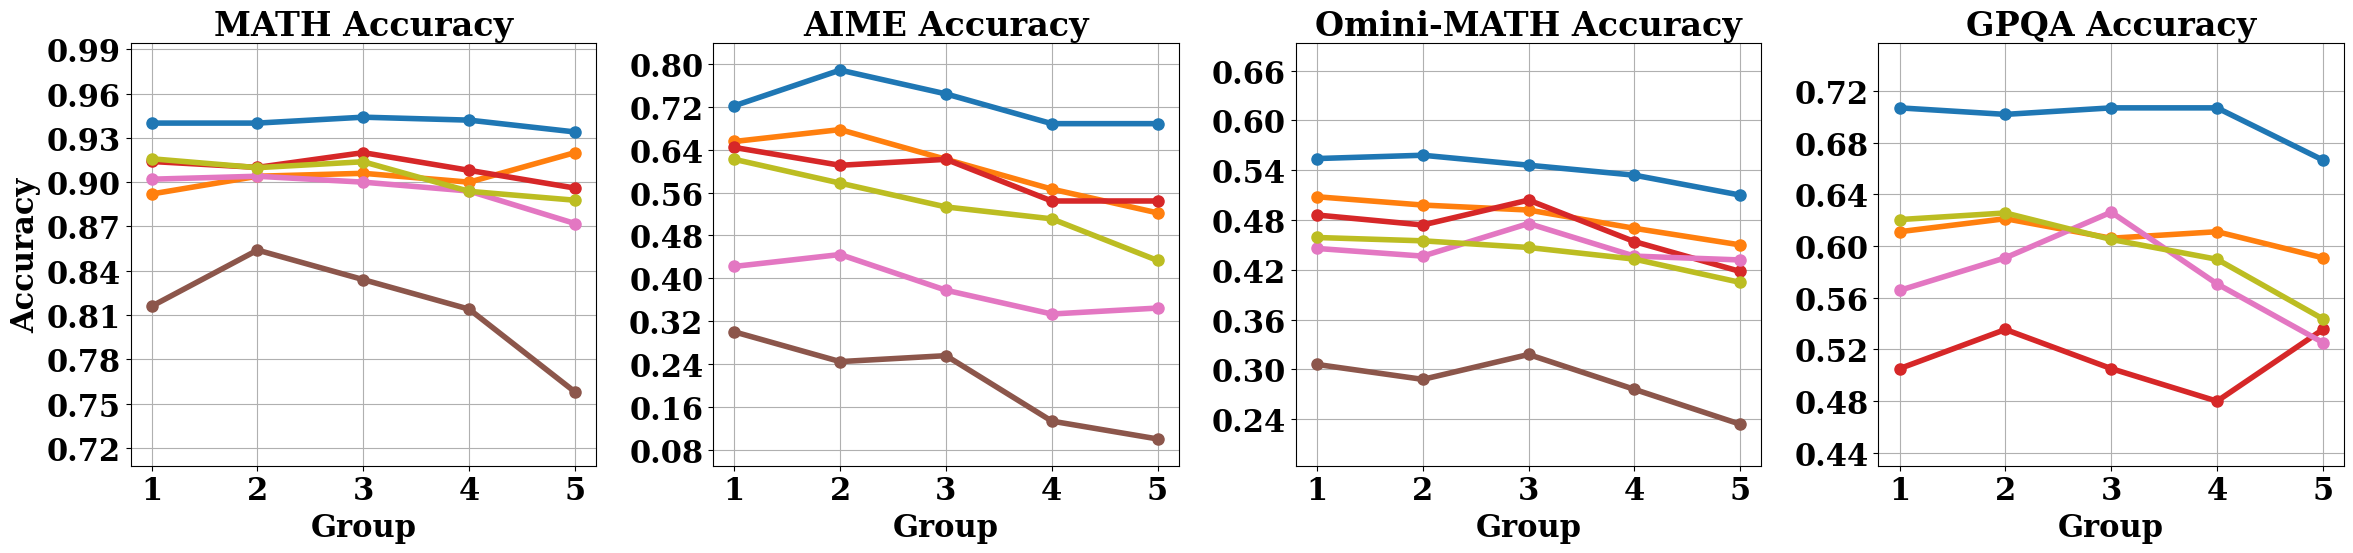

In [300]:
from matplotlib.ticker import MaxNLocator, FuncFormatter
def format_yticks(x, pos):
    return f'{x:.2f}'  # 保留2位小数

# 使用math_data_dict的键顺序作为基准
model_order = list(math_data_dict.keys())

# 创建统一的颜色映射
cmap = plt.cm.tab10
color_dict = {model: cmap(i/len(model_order)) for i, model in enumerate(model_order)}

def plot_multiple_models(ax, data_dict, title="Overall Scores Comparison", ylabel="Accuracy",
                         show_labels=True, y_range=None, y_tick_interval=None):
    """
    修改后的绘图函数，使用统一的颜色映射
    """
    # 按照model_order的顺序绘制折线
    for model in model_order:
        if model in data_dict:  # 只绘制数据字典中存在的模型
            data_list = data_dict[model]
            overall_values = [item['overall'] for item in data_list]
            x_values = range(1, len(overall_values) + 1)
            ax.plot(x_values, overall_values, marker='o', linestyle='-', 
                   color=color_dict[model], linewidth=4, markersize=8, label=model)
            
            # 添加数据标签
            if show_labels:
                for x, y in zip(x_values, overall_values):
                    ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=12)
    
    # 自动设置 y 轴范围
    if y_range is None:
        all_values = [item['overall'] for data_list in data_dict.values() for item in data_list]
        y_min = min(all_values) - 0.05
        y_max = max(all_values) + 0.05
        y_range = (y_min, y_max)
    
    # 自动设置 y 轴刻度间隔
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5
    
    # 坐标轴设置
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('Group', fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xticks(range(1, max(len(data_list) for data_list in data_dict.values()) + 1))
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    ax.yaxis.set_major_locator(MaxNLocator(integer=False))
    ax.yaxis.set_major_formatter(FuncFormatter(format_yticks))
    ax.grid()

# [Rest of your code remains the same]
    
# 创建包含四个子图的图形（横向排布）
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# 假设这是你的数据
math_data_dict = {
    "R1-671b": [{2: 0.9666666666666667, 5: 0.9029850746268657, 3: 0.9523809523809523, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.94}, {2: 0.9888888888888889, 5: 0.8955223880597015, 3: 0.9428571428571428, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.94}, {2: 0.9777777777777777, 5: 0.9104477611940298, 3: 0.9428571428571428, 4: 0.9453125, 1: 0.9767441860465116, 'overall': 0.944}, {2: 0.9666666666666667, 5: 0.8955223880597015, 3: 0.9714285714285714, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.942}, {2: 0.9666666666666667, 5: 0.8880597014925373, 3: 0.9619047619047619, 4: 0.9296875, 1: 0.9534883720930233, 'overall': 0.934}],
    "R1-Distill-32b": [{2: 0.9, 5: 0.8432835820895522, 3: 0.9333333333333333, 4: 0.8828125, 1: 0.9534883720930233, 'overall': 0.892}, {2: 0.9333333333333333, 5: 0.8731343283582089, 3: 0.9333333333333333, 4: 0.8828125, 1: 0.9302325581395349, 'overall': 0.904}, {2: 0.9333333333333333, 5: 0.8582089552238806, 3: 0.9428571428571428, 4: 0.890625, 1: 0.9534883720930233, 'overall': 0.906}, {2: 0.9333333333333333, 5: 0.8582089552238806, 3: 0.9333333333333333, 4: 0.8828125, 1: 0.9302325581395349, 'overall': 0.9}, {2: 0.9444444444444444, 5: 0.8731343283582089, 3: 0.9714285714285714, 4: 0.8984375, 1: 0.9534883720930233, 'overall': 0.92}],
    "R1-Distill-14b": [{5: 0.8582089552238806, 2: 0.9111111111111111, 4: 0.9375, 3: 0.9428571428571428, 1: 0.9534883720930233, 'overall': 0.914}, {5: 0.8582089552238806, 2: 0.9222222222222223, 4: 0.9140625, 3: 0.9619047619047619, 1: 0.9069767441860465, 'overall': 0.91}, {5: 0.8656716417910447, 2: 0.9666666666666667, 4: 0.9140625, 3: 0.9428571428571428, 1: 0.9534883720930233, 'overall': 0.92}, {5: 0.8432835820895522, 2: 0.9777777777777777, 4: 0.8984375, 3: 0.9333333333333333, 1: 0.9302325581395349, 'overall': 0.908}, {5: 0.7835820895522388, 2: 0.9777777777777777, 4: 0.8984375, 3: 0.9428571428571428, 1: 0.9534883720930233, 'overall': 0.896}],
    "R1-Distill-1.5b": [{2: 0.8555555555555555, 5: 0.6940298507462687, 3: 0.9142857142857143, 4: 0.78125, 1: 0.9767441860465116, 'overall': 0.816}, {2: 0.8888888888888888, 5: 0.7238805970149254, 3: 0.9428571428571428, 4: 0.8671875, 1: 0.9302325581395349, 'overall': 0.854}, {2: 0.9444444444444444, 5: 0.6791044776119403, 3: 0.9047619047619048, 4: 0.828125, 1: 0.9302325581395349, 'overall': 0.834}, {2: 0.9111111111111111, 5: 0.6343283582089553, 3: 0.9238095238095239, 4: 0.8046875, 1: 0.9302325581395349, 'overall': 0.814}, {2: 0.8555555555555555, 5: 0.5223880597014925, 3: 0.8952380952380953, 4: 0.7578125, 1: 0.9534883720930233, 'overall': 0.758}],
    "QwQ": [{2: 0.9666666666666667, 5: 0.7985074626865671, 3: 0.9714285714285714, 4: 0.8984375, 1: 0.9302325581395349, 'overall': 0.902}, {2: 0.9666666666666667, 5: 0.8134328358208955, 3: 0.9333333333333333, 4: 0.90625, 1: 0.9767441860465116, 'overall': 0.904}, {2: 0.9666666666666667, 5: 0.8059701492537313, 3: 0.9142857142857143, 4: 0.9140625, 1: 0.9767441860465116, 'overall': 0.9}, {2: 0.9666666666666667, 5: 0.8134328358208955, 3: 0.9333333333333333, 4: 0.875, 1: 0.9534883720930233, 'overall': 0.894}, {2: 0.9333333333333333, 5: 0.7835820895522388, 3: 0.9333333333333333, 4: 0.8359375, 1: 0.9767441860465116, 'overall': 0.872}],
    "LIMO": [{2: 0.9333333333333333, 5: 0.8270676691729323, 3: 0.9619047619047619, 4: 0.9375, 1: 0.9767441860465116, 'overall': 0.9158316633266533}, {2: 0.9, 5: 0.8345864661654135, 3: 0.9523809523809523, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.9098196392785571}, {2: 0.9777777777777777, 5: 0.8120300751879699, 3: 0.9523809523809523, 4: 0.9375, 1: 0.9302325581395349, 'overall': 0.9138276553106213}, {2: 0.9333333333333333, 5: 0.8045112781954887, 3: 0.9523809523809523, 4: 0.890625, 1: 0.9534883720930233, 'overall': 0.8937875751503006}, {2: 0.9222222222222223, 5: 0.8045112781954887, 3: 0.9333333333333333, 4: 0.890625, 1: 0.9534883720930233, 'overall': 0.8877755511022044}],
    # "S1":[{2: 0.9555555555555556, 5: 0.7894736842105263, 3: 0.9333333333333333, 4: 0.8984375, 1: 0.9767441860465116, 'overall': 0.8937875751503006}, {2: 0.9444444444444444, 5: 0.7593984962406015, 3: 0.9333333333333333, 4: 0.875, 1: 0.9767441860465116, 'overall': 0.8777555110220441}, {2: 0.9555555555555556, 5: 0.7443609022556391, 3: 0.8952380952380953, 4: 0.8984375, 1: 0.9767441860465116, 'overall': 0.87374749498998}, {2: 0.9444444444444444, 5: 0.7669172932330827, 3: 0.9238095238095239, 4: 0.875, 1: 0.9302325581395349, 'overall': 0.87374749498998}, {2: 0.9555555555555556, 5: 0.7518796992481203, 3: 0.9047619047619048, 4: 0.859375, 1: 0.9302325581395349, 'overall': 0.8637274549098196}]
}

aime_data_dict = {
    "R1-671b": [{None: 0.7222222222222222, 'overall': 0.7222222222222222}, {None: 0.7888888888888889, 'overall': 0.7888888888888889}, {None: 0.7444444444444445, 'overall': 0.7444444444444445}, {None: 0.6888888888888889, 'overall': 0.6888888888888889}, {None: 0.6888888888888889, 'overall': 0.6888888888888889}],
    "R1-Distill-32b": [{None: 0.6555555555555556, 'overall': 0.6555555555555556}, {None: 0.6777777777777778, 'overall': 0.6777777777777778}, {None: 0.6222222222222222, 'overall': 0.6222222222222222}, {None: 0.5666666666666667, 'overall': 0.5666666666666667}, {None: 0.5222222222222223, 'overall': 0.5222222222222223}],
    "R1-Distill-14b": [{None: 0.6444444444444445, 'overall': 0.6444444444444445}, {None: 0.6111111111111112, 'overall': 0.6111111111111112}, {None: 0.6222222222222222, 'overall': 0.6222222222222222}, {None: 0.5444444444444444, 'overall': 0.5444444444444444}, {None: 0.5444444444444444, 'overall': 0.5444444444444444}],
    "R1-Distill-1.5b": [{None: 0.3, 'overall': 0.3}, {None: 0.24444444444444444, 'overall': 0.24444444444444444}, {None: 0.25555555555555554, 'overall': 0.25555555555555554}, {None: 0.13333333333333333, 'overall': 0.13333333333333333}, {None: 0.1, 'overall': 0.1}],
    "QwQ": [{None: 0.4222222222222222, 'overall': 0.4222222222222222}, {None: 0.4444444444444444, 'overall': 0.4444444444444444}, {None: 0.37777777777777777, 'overall': 0.37777777777777777}, {None: 0.3333333333333333, 'overall': 0.3333333333333333}, {None: 0.34444444444444444, 'overall': 0.34444444444444444}],
    "LIMO":[{None: 0.6222222222222222, 'overall': 0.6222222222222222}, {None: 0.5777777777777777, 'overall': 0.5777777777777777}, {None: 0.5333333333333333, 'overall': 0.5333333333333333}, {None: 0.5111111111111111, 'overall': 0.5111111111111111}, {None: 0.43333333333333335, 'overall': 0.43333333333333335}],
    # "S1":[{None: 0.36666666666666664, 'overall': 0.36666666666666664}, {None: 0.35555555555555557, 'overall': 0.35555555555555557}, {None: 0.3111111111111111, 'overall': 0.3111111111111111}, {None: 0.28888888888888886, 'overall': 0.28888888888888886}, {None: 0.25555555555555554, 'overall': 0.25555555555555554}]
}

gpqa_data_dict = {
    "R1-671b": [{None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.702020202020202, 'overall': 0.702020202020202}, {None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.6666666666666666, 'overall': 0.6666666666666666}],
    "R1-Distill-32b": [{None: 0.6111111111111112, 'overall': 0.6111111111111112}, {None: 0.6212121212121212, 'overall': 0.6212121212121212}, {None: 0.6060606060606061, 'overall': 0.6060606060606061}, {None: 0.6111111111111112, 'overall': 0.6111111111111112}, {None: 0.5909090909090909, 'overall': 0.5909090909090909}],
    "R1-Distill-14b": [{None: 0.5050505050505051, 'overall': 0.5050505050505051}, {None: 0.5353535353535354, 'overall': 0.5353535353535354}, {None: 0.5050505050505051, 'overall': 0.5050505050505051}, {None: 0.4797979797979798, 'overall': 0.4797979797979798}, {None: 0.5353535353535354, 'overall': 0.5353535353535354}],
    "QwQ": [{None: 0.5656565656565656, 'overall': 0.5656565656565656}, {None: 0.5909090909090909, 'overall': 0.5909090909090909}, {None: 0.6262626262626263, 'overall': 0.6262626262626263}, {None: 0.5707070707070707, 'overall': 0.5707070707070707}, {None: 0.5252525252525253, 'overall': 0.5252525252525253}],
    "LIMO": [{None: 0.6205128205128205, 'overall': 0.6205128205128205}, {None: 0.6256410256410256, 'overall': 0.6256410256410256}, {None: 0.6051282051282051, 'overall': 0.6051282051282051}, {None: 0.5897435897435898, 'overall': 0.5897435897435898}, {None: 0.5435897435897435, 'overall': 0.5435897435897435}],
    # "S1":[{None: 0.4307692307692308, 'overall': 0.4307692307692308}, {None: 0.48717948717948717, 'overall': 0.48717948717948717}, {None: 0.517948717948718, 'overall': 0.517948717948718}, {None: 0.5025641025641026, 'overall': 0.5025641025641026}, {None: 0.4461538461538462, 'overall': 0.4461538461538462}]
}

omini_data_dict = {
    'R1-671b': [{None: 0.554, 'overall': 0.554}, {None: 0.558, 'overall': 0.558}, {None: 0.546, 'overall': 0.546}, {None: 0.534, 'overall': 0.534}, {None: 0.51, 'overall': 0.51}],
    "R1-Distill-32b": [{None: 0.508, 'overall': 0.508}, {None: 0.498, 'overall': 0.498}, {None: 0.492, 'overall': 0.492}, {None: 0.47, 'overall': 0.47}, {None: 0.45, 'overall': 0.45}],
    "R1-Distill-14b": [{None: 0.486, 'overall': 0.486}, {None: 0.474, 'overall': 0.474}, {None: 0.504, 'overall': 0.504}, {None: 0.454, 'overall': 0.454}, {None: 0.418, 'overall': 0.418}],
    "R1-Distill-1.5b": [{None: 0.306, 'overall': 0.306}, {None: 0.288, 'overall': 0.288}, {None: 0.318, 'overall': 0.318}, {None: 0.276, 'overall': 0.276}, {None: 0.234, 'overall': 0.234}],
    "QwQ": [{None: 0.4457274826789838, 'overall': 0.4457274826789838}, {None: 0.43648960739030024, 'overall': 0.43648960739030024}, {None: 0.47575057736720555, 'overall': 0.47575057736720555}, {None: 0.43648960739030024, 'overall': 0.43648960739030024}, {None: 0.43187066974595845, 'overall': 0.43187066974595845}],
    "LIMO": [{None: 0.4589178356713427, 'overall': 0.4589178356713427}, {None: 0.45490981963927857, 'overall': 0.45490981963927857}, {None: 0.4468937875751503, 'overall': 0.4468937875751503}, {None: 0.43286573146292584, 'overall': 0.43286573146292584}, {None: 0.40480961923847697, 'overall': 0.40480961923847697}],
    # "S1":[{None: 0.374749498997996, 'overall': 0.374749498997996}, {None: 0.3627254509018036, 'overall': 0.3627254509018036}, {None: 0.3466933867735471, 'overall': 0.3466933867735471}, {None: 0.3406813627254509, 'overall': 0.3406813627254509}, {None: 0.3366733466933868, 'overall': 0.3366733466933868}]
}


# 绘制四个子图
plot_multiple_models(axs[0], math_data_dict, title="MATH Accuracy", ylabel="Accuracy", show_labels=False)
plot_multiple_models(axs[1], aime_data_dict, title="AIME Accuracy", ylabel="", show_labels=False)
plot_multiple_models(axs[2], omini_data_dict, title="Omini-MATH Accuracy", ylabel="", show_labels=False)
plot_multiple_models(axs[3], gpqa_data_dict, title="GPQA Accuracy", ylabel="",  show_labels=False)

# 获取所有子图的图例
handles, labels = axs[0].get_legend_handles_labels()

# 在顶部添加共享的图例
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=20)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_acc.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

In [502]:
# math_data_dict = {
#     "R1-671b": [{2: 0.9666666666666667, 5: 0.9029850746268657, 3: 0.9523809523809523, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.94}, {2: 0.9888888888888889, 5: 0.8955223880597015, 3: 0.9428571428571428, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.94}, {2: 0.9777777777777777, 5: 0.9104477611940298, 3: 0.9428571428571428, 4: 0.9453125, 1: 0.9767441860465116, 'overall': 0.944}, {2: 0.9666666666666667, 5: 0.8955223880597015, 3: 0.9714285714285714, 4: 0.9453125, 1: 0.9534883720930233, 'overall': 0.942}, {2: 0.9666666666666667, 5: 0.8880597014925373, 3: 0.9619047619047619, 4: 0.9296875, 1: 0.9534883720930233, 'overall': 0.934}],
#     "R1-Distill-32b": [{2: 0.9111111111111111, 5: 0.8507462686567164, 3: 0.9523809523809523, 4: 0.889763779527559, 1: 0.9534883720930233, 'overall': 0.9018036072144289}, {2: 0.9333333333333333, 5: 0.8805970149253731, 3: 0.9619047619047619, 4: 0.889763779527559, 1: 0.9302325581395349, 'overall': 0.9138276553106213}, {2: 0.9444444444444444, 5: 0.8656716417910447, 3: 0.9619047619047619, 4: 0.905511811023622, 1: 0.9534883720930233, 'overall': 0.9178356713426854}, {2: 0.9444444444444444, 5: 0.8656716417910447, 3: 0.9523809523809523, 4: 0.889763779527559, 1: 0.9534883720930233, 'overall': 0.9118236472945892}, {2: 0.9444444444444444, 5: 0.8805970149253731, 3: 0.9904761904761905, 4: 0.905511811023622, 1: 0.9534883720930233, 'overall': 0.9278557114228457}],
#     "R1-Distill-14b": [{5: 0.8646616541353384, 2: 0.9111111111111111, 4: 0.9365079365079365, 3: 0.9619047619047619, 1: 0.9534883720930233, 'overall': 0.9195171026156942}, {5: 0.8646616541353384, 2: 0.9333333333333333, 4: 0.9206349206349206, 3: 0.9809523809523809, 1: 0.9069767441860465, 'overall': 0.9195171026156942}, {5: 0.8721804511278195, 2: 0.9666666666666667, 4: 0.9126984126984127, 3: 0.9619047619047619, 1: 0.9534883720930233, 'overall': 0.9255533199195171}, {5: 0.8571428571428571, 2: 0.9777777777777777, 4: 0.9047619047619048, 3: 0.9523809523809523, 1: 0.9302325581395349, 'overall': 0.9175050301810865}, {5: 0.7969924812030075, 2: 0.9777777777777777, 4: 0.9126984126984127, 3: 0.9619047619047619, 1: 0.9534883720930233, 'overall': 0.9074446680080482}],
#     "R1-Distill-1.5b": [{2: 0.8620689655172413, 5: 0.725, 3: 0.9207920792079208, 4: 0.784, 1: 0.9534883720930233, 'overall': 0.8277310924369747}, {2: 0.896551724137931, 5: 0.75, 3: 0.9306930693069307, 4: 0.864, 1: 0.9302325581395349, 'overall': 0.8613445378151261}, {2: 0.9540229885057471, 5: 0.7083333333333334, 3: 0.9108910891089109, 4: 0.84, 1: 0.9302325581395349, 'overall': 0.8508403361344538}, {2: 0.9195402298850575, 5: 0.6833333333333333, 3: 0.9405940594059405, 4: 0.824, 1: 0.9302325581395349, 'overall': 0.8403361344537815}, {2: 0.8735632183908046, 5: 0.5583333333333333, 3: 0.9306930693069307, 4: 0.776, 1: 0.9534883720930233, 'overall': 0.7878151260504201}],
#     "QwQ": [{2: 0.9662921348314607, 5: 0.824, 3: 0.9714285714285714, 4: 0.896, 1: 0.9534883720930233, 'overall': 0.9117043121149897}, {2: 0.9662921348314607, 5: 0.84, 3: 0.9333333333333333, 4: 0.904, 1: 0.9767441860465116, 'overall': 0.9117043121149897}, {2: 0.9662921348314607, 5: 0.832, 3: 0.9142857142857143, 4: 0.912, 1: 0.9767441860465116, 'overall': 0.9075975359342916}, {2: 0.9662921348314607, 5: 0.832, 3: 0.9333333333333333, 4: 0.888, 1: 0.9534883720930233, 'overall': 0.9034907597535934}, {2: 0.9438202247191011, 5: 0.84, 3: 0.9333333333333333, 4: 0.856, 1: 0.9767441860465116, 'overall': 0.8952772073921971}]
# }

# aime_data_dict = {
#     "R1-671b": [{None: 0.7222222222222222, 'overall': 0.7222222222222222}, {None: 0.7888888888888889, 'overall': 0.7888888888888889}, {None: 0.7444444444444445, 'overall': 0.7444444444444445}, {None: 0.6888888888888889, 'overall': 0.6888888888888889}, {None: 0.6888888888888889, 'overall': 0.6888888888888889}],
#     "R1-Distill-32b": [{None: 0.6590909090909091, 'overall': 0.6590909090909091}, {None: 0.6590909090909091, 'overall': 0.6590909090909091}, {None: 0.6363636363636364, 'overall': 0.6363636363636364}, {None: 0.6363636363636364, 'overall': 0.6363636363636364}, {None: 0.5795454545454546, 'overall': 0.5795454545454546}],
#     "R1-Distill-14b": [{None: 0.6785714285714286, 'overall': 0.6785714285714286}, {None: 0.6547619047619048, 'overall': 0.6547619047619048}, {None: 0.6666666666666666, 'overall': 0.6666666666666666}, {None: 0.5833333333333334, 'overall': 0.5833333333333334}, {None: 0.5833333333333334, 'overall': 0.5833333333333334}],
#     "R1-Distill-1.5b": [{None: 0.3287671232876712, 'overall': 0.3287671232876712}, {None: 0.273972602739726, 'overall': 0.273972602739726}, {None: 0.273972602739726, 'overall': 0.273972602739726}, {None: 0.1506849315068493, 'overall': 0.1506849315068493}, {None: 0.1232876712328767, 'overall': 0.1232876712328767}],
#     "QwQ": [{None: 0.5, 'overall': 0.5}, {None: 0.4594594594594595, 'overall': 0.4594594594594595}, {None: 0.43243243243243246, 'overall': 0.43243243243243246}, {None: 0.5, 'overall': 0.5}, {None: 0.44594594594594594, 'overall': 0.44594594594594594}]
# }

# gpqa_data_dict = {
#     "R1-671b": [{None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.702020202020202, 'overall': 0.702020202020202}, {None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.7070707070707071, 'overall': 0.7070707070707071}, {None: 0.6666666666666666, 'overall': 0.6666666666666666}],
#     "R1-Distill-32b": [{None: 0.6173469387755102, 'overall': 0.6173469387755102}, {None: 0.6224489795918368, 'overall': 0.6224489795918368}, {None: 0.6122448979591837, 'overall': 0.6122448979591837}, {None: 0.6173469387755102, 'overall': 0.6173469387755102}, {None: 0.5969387755102041, 'overall': 0.5969387755102041}],
#     "R1-Distill-14b": [{None: 0.5769230769230769, 'overall': 0.5769230769230769}, {None: 0.6230769230769231, 'overall': 0.6230769230769231}, {None: 0.5769230769230769, 'overall': 0.5769230769230769}, {None: 0.5923076923076923, 'overall': 0.5923076923076923}, {None: 0.6461538461538462, 'overall': 0.6461538461538462}],
#     "QwQ": [{None: 0.5604395604395604, 'overall': 0.5604395604395604}, {None: 0.5824175824175825, 'overall': 0.5824175824175825}, {None: 0.6318681318681318, 'overall': 0.6318681318681318}, {None: 0.5714285714285714, 'overall': 0.5714285714285714}, {None: 0.5714285714285714, 'overall': 0.5714285714285714}]
# }

# omini_data_dict = {
#     'R1-671b': [{None: 0.554, 'overall': 0.554}, {None: 0.558, 'overall': 0.558}, {None: 0.546, 'overall': 0.546}, {None: 0.534, 'overall': 0.534}, {None: 0.51, 'overall': 0.51}],
#     "R1-Distill-32b": [{None: 0.5136268343815513, 'overall': 0.5136268343815513}, {None: 0.5094339622641509, 'overall': 0.5094339622641509}, {None: 0.5031446540880503, 'overall': 0.5031446540880503}, {None: 0.48427672955974843, 'overall': 0.48427672955974843}, {None: 0.469601677148847, 'overall': 0.469601677148847}],
#     "R1-Distill-14b": [{None: 0.483739837398374, 'overall': 0.483739837398374}, {None: 0.4695121951219512, 'overall': 0.4695121951219512}, {None: 0.5, 'overall': 0.5}, {None: 0.4532520325203252, 'overall': 0.4532520325203252}, {None: 0.4247967479674797, 'overall': 0.4247967479674797}],
#     "R1-Distill-1.5b": [{None: 0.32805429864253394, 'overall': 0.32805429864253394}, {None: 0.30995475113122173, 'overall': 0.30995475113122173}, {None: 0.34615384615384615, 'overall': 0.34615384615384615}, {None: 0.3076923076923077, 'overall': 0.3076923076923077}, {None: 0.2647058823529412, 'overall': 0.2647058823529412}],
#     "QwQ": [{None: 0.4457274826789838, 'overall': 0.4457274826789838}, {None: 0.43648960739030024, 'overall': 0.43648960739030024}, {None: 0.47575057736720555, 'overall': 0.47575057736720555}, {None: 0.43648960739030024, 'overall': 0.43648960739030024}, {None: 0.43187066974595845, 'overall': 0.43187066974595845}]
# }


# plot_multiple_models(math_data_dict, title="Math Accuracy", show_labels=False, color_theme='viridis', output_filename='imgs/math_acc.pdf')
# plot_multiple_models(aime_data_dict, title="AIME Accuracy", show_labels=False, color_theme='viridis', output_filename='imgs/aime_acc.pdf')
# plot_multiple_models(omini_data_dict, title="Omini-Math Accuracy", show_labels=False, color_theme='viridis', output_filename='imgs/omini_acc.pdf')
# plot_multiple_models(gpqa_data_dict, title="GPQA Accuracy", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_acc.pdf')


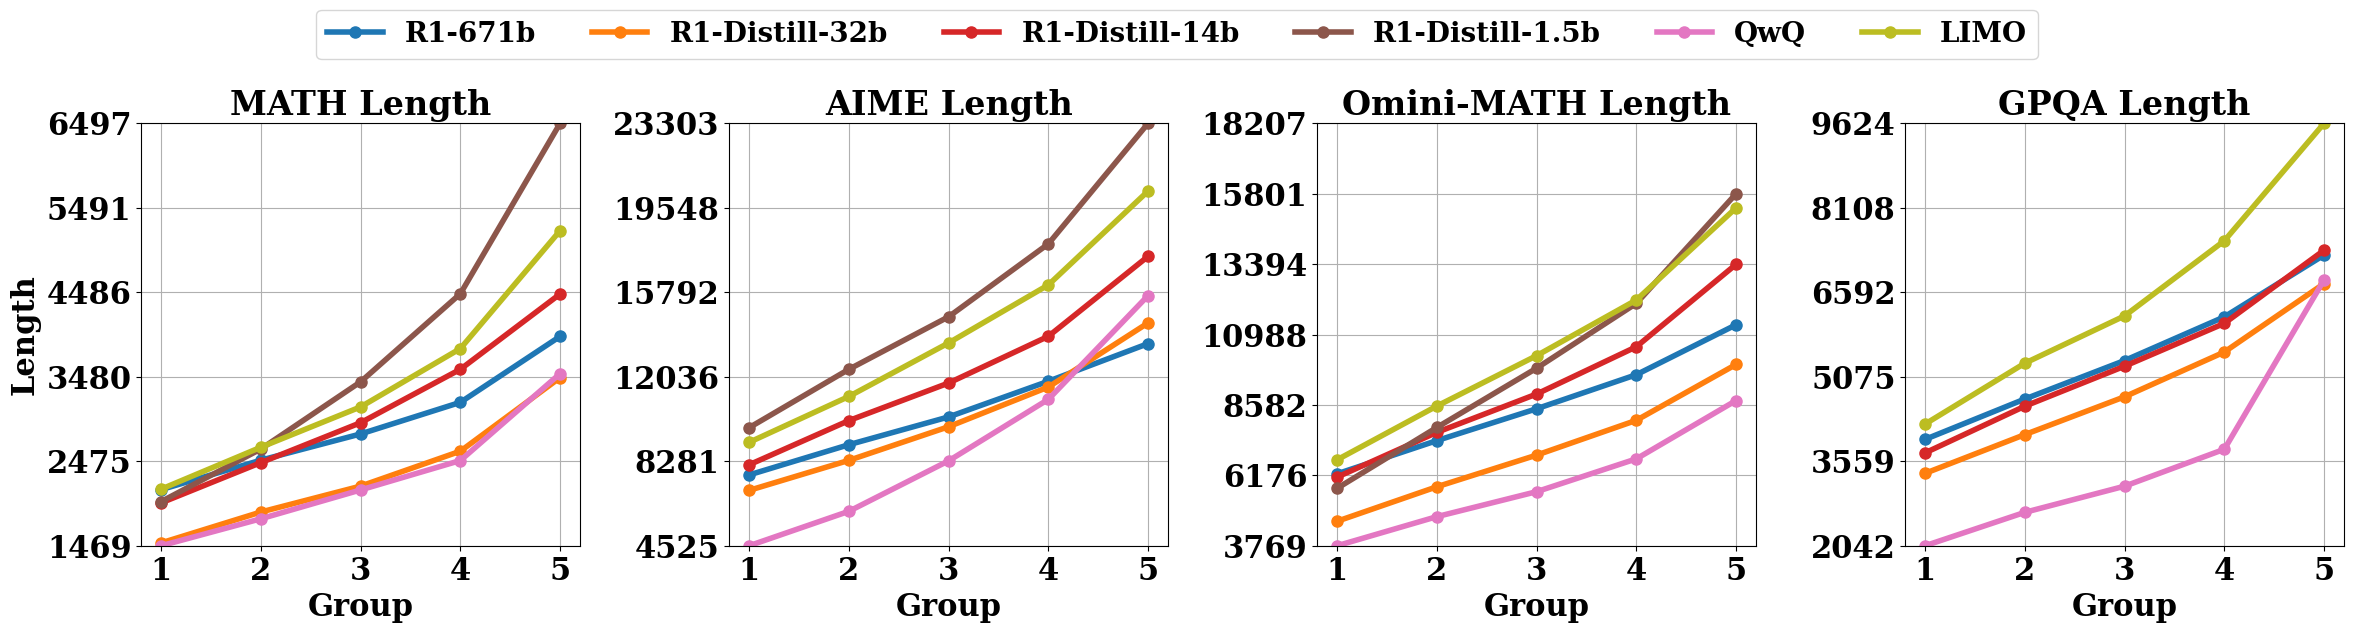

In [299]:
from matplotlib.ticker import MaxNLocator, FuncFormatter
def format_yticks(x, pos):
    return f'{x:.2f}'  # 保留2位小数

# 获取数据字典中的顺序
model_order = list(math_data_dict.keys())  # Use math_data_dict as reference for order

# 创建统一的颜色映射，使用原始顺序
cmap = plt.cm.tab10
color_dict = {model: cmap(i/len(model_order)) for i, model in enumerate(model_order)}

def plot_multiple_models(ax, data_dict, title="Overall Scores Comparison", ylabel="Accuracy",
                         show_labels=True, y_range=None, y_tick_interval=None):
    """
    修改后的绘图函数，使用统一的颜色映射
    """
    # 按照 model_order 的顺序绘制折线
    for model in model_order:
        if model in data_dict:  # 只绘制数据字典中存在的模型
            data_list = data_dict[model]
            overall_values = [item['overall'] for item in data_list]
            x_values = range(1, len(overall_values) + 1)
            ax.plot(x_values, overall_values, marker='o', linestyle='-', 
                   color=color_dict[model], linewidth=4, markersize=8, label=model)
            
            # 添加数据标签
            if show_labels:
                for x, y in zip(x_values, overall_values):
                    ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=12)
    
    # 自动设置 y 轴范围
    if y_range is None:
        all_values = [item['overall'] for data_list in data_dict.values() for item in data_list]
        y_min = min(all_values) - 0.05
        y_max = max(all_values) + 0.05
        y_range = (y_min, y_max)
    
    # 自动设置 y 轴刻度间隔
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5
    
    # 坐标轴设置
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('Group', fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xticks(range(1, max(len(data_list) for data_list in data_dict.values()) + 1))
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    ax.grid()
# 创建包含四个子图的图形（横向排布）
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# 假设这是你的数据
math_data_dict = {
    'R1-671b': [{2: 1217.9555555555555, 5: 3580.1119402985073, 3: 1577.352380952381, 4: 2095.6953125, 1: 1057.860465116279, 'overall': 2137.42}, {2: 1395.0111111111112, 5: 4108.104477611941, 3: 1850.2380952380952, 4: 2516.75, 1: 1198.0232558139535, 'overall': 2487.942}, {2: 1543.9666666666667, 5: 4527.313432835821, 3: 2159.5142857142855, 4: 2894.984375, 1: 1327.3720930232557, 'overall': 2800.002}, {2: 1766.1777777777777, 5: 5111.171641791045, 3: 2476.6190476190477, 4: 3276.4296875, 1: 1505.9767441860465, 'overall': 3176.076}, {2: 2149.288888888889, 5: 6555.865671641791, 3: 2890.114285714286, 4: 4142.6640625, 1: 1741.9767441860465, 'overall': 3961.1}],
    "R1-Distill-32b": [{2: 725.8666666666667, 5: 2791.291044776119, 3: 1067.904761904762, 4: 1403.0629921259842, 1: 475.27906976744185, 'overall': 1503.2404809619238}, {2: 878.1444444444444, 5: 3511.2462686567164, 3: 1251.942857142857, 4: 1806.8661417322835, 1: 536.7441860465116, 'overall': 1870.8336673346694}, {2: 968.3444444444444, 5: 4054.5373134328356, 3: 1436.5523809523809, 4: 2148.212598425197, 1: 772.9767441860465, 'overall': 2179.074148296593}, {2: 1189.4666666666667, 5: 4708.5, 3: 1705.8095238095239, 4: 2646.031496062992, 1: 967.8139534883721, 'overall': 2594.7154308617232}, {2: 1478.0444444444445, 5: 6252.373134328358, 3: 2478.809523809524, 4: 3521.0078740157483, 1: 1246.953488372093, 'overall': 3470.749498997996}],
    "R1-Distill-14b": [{5: 3408.6466165413535, 2: 995.2888888888889, 4: 2025.5079365079366, 3: 1511.2571428571428, 1: 634.6279069767442, 'overall': 1980.102615694165}, {5: 4242.315789473684, 2: 1244.2, 4: 2440.0238095238096, 3: 1923.2285714285715, 1: 850.1860465116279, 'overall': 2459.046277665996}, {5: 4988.2180451127815, 2: 1506.7888888888888, 4: 2975.9603174603176, 3: 2209.1714285714284, 1: 1213.3255813953488, 'overall': 2933.9054325955735}, {5: 6134.8421052631575, 2: 1741.088888888889, 4: 3608.1825396825398, 3: 2662.5904761904762, 1: 1561.8139534883721, 'overall': 3569.4024144869213}, {5: 7670.18045112782, 2: 2180.4777777777776, 4: 4446.166666666667, 3: 3423.790476190476, 1: 1941.4883720930231, 'overall': 4465.9476861167}],
    "R1-Distill-1.5b": [{2: 993.5632183908046, 5: 3688.85, 3: 1310.5742574257426, 4: 2028.216, 1: 808.7209302325581, 'overall': 1995.3193277310925}, {2: 1248.6206896551723, 5: 4943.416666666667, 3: 1738.5346534653465, 4: 2573.568, 1: 1131.4883720930231, 'overall': 2621.390756302521}, {2: 1575.8620689655172, 5: 6553.925, 3: 2120.4257425742576, 4: 3432.976, 1: 1426.6976744186047, 'overall': 3420.5966386554624}, {2: 1997.5977011494253, 5: 8272.766666666666, 3: 2715.1782178217823, 4: 4921.856, 1: 1654.4883720930231, 'overall': 4468.762605042017}, {2: 2880.1494252873563, 5: 11566.966666666667, 3: 4446.168316831683, 4: 7253.04, 1: 2281.7441860465115, 'overall': 6496.674369747899}],
    "QwQ": [{2: 916.2808988764045, 5: 2492.72, 3: 1041.3238095238096, 4: 1425.488, 1: 813.4651162790698, 'overall': 1469.4928131416839}, {2: 1110.4719101123596, 5: 2980.984, 3: 1298.3428571428572, 4: 1770.552, 1: 997.3023255813954, 'overall': 1790.5215605749486}, {2: 1270.0112359550562, 5: 3621.632, 3: 1519.5523809523809, 4: 2120.56, 1: 1133.3255813953488, 'overall': 2133.6570841889115}, {2: 1503.8539325842696, 5: 4193.976, 3: 1774.8095238095239, 4: 2478.808, 1: 1284.139534883721, 'overall': 2483.6016427104723}, {2: 2415.1685393258426, 5: 5753.456, 3: 2673.1714285714284, 4: 3455.472, 1: 1548.906976744186, 'overall': 3518.17659137577}],
    "LIMO": [{2: 1138.7444444444445, 5: 3729.6466165413535, 3: 1488.2380952380952, 4: 2118.3359375, 1: 1012.6046511627907, 'overall': 2143.254509018036}, {2: 1362.2444444444445, 5: 4634.849624060151, 3: 1811.9333333333334, 4: 2640.234375, 1: 1188.9767441860465, 'overall': 2642.0160320641285}, {2: 1529.7333333333333, 5: 5449.496240601504, 3: 2121.7428571428572, 4: 3230.921875, 1: 1374.2790697674418, 'overall': 3122.0320641282565}, {2: 1779.0333333333333, 5: 6606.496240601504, 3: 2593.8285714285716, 4: 4116.2734375, 1: 1540.046511627907, 'overall': 3816.1002004008014}, {2: 2307.133333333333, 5: 9367.977443609023, 3: 3389.9714285714285, 4: 5583.1328125, 1: 1868.1627906976744, 'overall': 5219.442885771543}],
    # "s1": [{2: 1531.6777777777777, 5: 3569.8270676691727, 3: 1992.3238095238096, 4: 2578.71875, 1: 1273.9767441860465, 'overall': 2418.2144288577156}, {2: 1916.3222222222223, 5: 4028.5112781954886, 3: 2377.847619047619, 4: 3115.390625, 1: 1572.7441860465117, 'overall': 2854.374749498998}, {2: 2199.9333333333334, 5: 4352.1353383458645, 3: 2639.733333333333, 4: 3485.3515625, 1: 1818.1627906976744, 'overall': 3162.937875751503}, {2: 2553.6, 5: 4727.345864661655, 3: 3036.8, 4: 4078.8984375, 1: 2120.4418604651164, 'overall': 3588.5831663326653}, {2: 3027.9, 5: 5598.2180451127815, 3: 3488.8952380952383, 4: 4871.109375, 1: 2547.3953488372094, 'overall': 4241.37875751503}]
}

aime_data_dict = {
    "R1-671b": [{None: 7673.888888888889, 'overall': 7673.888888888889}, {None: 9017.155555555555, 'overall': 9017.155555555555}, {None: 10252.288888888888, 'overall': 10252.288888888888}, {None: 11837.033333333333, 'overall': 11837.033333333333}, {None: 13510.277777777777, 'overall': 13510.277777777777}],
    "R1-Distill-32b": [{None: 6987.7, 'overall': 6987.7}, {None: 8320.966666666667, 'overall': 8320.966666666667}, {None: 9816.388888888889, 'overall': 9816.388888888889}, {None: 11580.344444444445, 'overall': 11580.344444444445}, {None: 14431.222222222223, 'overall': 14431.222222222223}],
    "R1-Distill-14b": [{None: 8124.988888888889, 'overall': 8124.988888888889}, {None: 10089.877777777778, 'overall': 10089.877777777778}, {None: 11759.022222222222, 'overall': 11759.022222222222}, {None: 13835.777777777777, 'overall': 13835.777777777777}, {None: 17390.644444444446, 'overall': 17390.644444444446}],
    "R1-Distill-1.5b": [{None: 9775.4, 'overall': 9775.4}, {None: 12370.144444444444, 'overall': 12370.144444444444}, {None: 14704.377777777778, 'overall': 14704.377777777778}, {None: 17944.744444444445, 'overall': 17944.744444444445}, {None: 23303.2, 'overall': 23303.2}],
    "QwQ": [{None: 4525.3, 'overall': 4525.3}, {None: 6056.111111111111, 'overall': 6056.111111111111}, {None: 8300.766666666666, 'overall': 8300.766666666666}, {None: 11032.888888888889, 'overall': 11032.888888888889}, {None: 15646.922222222222, 'overall': 15646.922222222222}],
    "LIMO": [{None: 9123.222222222223, 'overall': 9123.222222222223}, {None: 11162.577777777778, 'overall': 11162.577777777778}, {None: 13541.522222222222, 'overall': 13541.522222222222}, {None: 16119.522222222222, 'overall': 16119.522222222222}, {None: 20293.5, 'overall': 20293.5}],
    # "s1": [{None: 5410.655555555555, 'overall': 5410.655555555555}, {None: 5959.311111111111, 'overall': 5959.311111111111}, {None: 6662.788888888889, 'overall': 6662.788888888889}, {None: 7938.366666666667, 'overall': 7938.366666666667}, {None: 9127.144444444444, 'overall': 9127.144444444444}],
}

gpqa_data_dict = {
    "R1-671b": [{None: 3951.959595959596, 'overall': 3951.959595959596}, {None: 4676.353535353535, 'overall': 4676.353535353535}, {None: 5366.909090909091, 'overall': 5366.909090909091}, {None: 6150.449494949495, 'overall': 6150.449494949495}, {None: 7259.727272727273, 'overall': 7259.727272727273}],
    "R1-Distill-32b": [{None: 3342.686868686869, 'overall': 3342.686868686869}, {None: 4037.752525252525, 'overall': 4037.752525252525}, {None: 4716.464646464647, 'overall': 4716.464646464647}, {None: 5519.207070707071, 'overall': 5519.207070707071}, {None: 6747.404040404041, 'overall': 6747.404040404041}],
    "R1-Distill-14b": [{None: 3710.0555555555557, 'overall': 3710.0555555555557}, {None: 4547.535353535353, 'overall': 4547.535353535353}, {None: 5264.979797979798, 'overall': 5264.979797979798}, {None: 6033.732323232323, 'overall': 6033.732323232323}, {None: 7346.772727272727, 'overall': 7346.772727272727}],
    "QwQ": [{None: 2042.520202020202, 'overall': 2042.520202020202}, {None: 2642.010101010101, 'overall': 2642.010101010101}, {None: 3111.080808080808, 'overall': 3111.080808080808}, {None: 3774.0252525252527, 'overall': 3774.0252525252527}, {None: 6813.580808080808, 'overall': 6813.580808080808}],
    "LIMO": [{None: 4227.6461538461535, 'overall': 4227.6461538461535}, {None: 5319.661538461539, 'overall': 5319.661538461539}, {None: 6167.8564102564105, 'overall': 6167.8564102564105}, {None: 7515.8564102564105, 'overall': 7515.8564102564105}, {None: 9624.184615384615, 'overall': 9624.184615384615}],
    # "s1": [{None: 2403.2923076923075, 'overall': 2403.2923076923075}, {None: 2944.3025641025642, 'overall': 2944.3025641025642}, {None: 3361.3333333333335, 'overall': 3361.3333333333335}, {None: 3970.9282051282053, 'overall': 3970.9282051282053}, {None: 5707.3128205128205, 'overall': 5707.3128205128205}]
}

omini_data_dict = {
    "R1-671b": [{None: 6227.674, 'overall': 6227.674}, {None: 7362.898, 'overall': 7362.898}, {None: 8450.7, 'overall': 8450.7}, {None: 9615.268, 'overall': 9615.268}, {None: 11320.88, 'overall': 11320.88}],
    "R1-Distill-32b": [{None: 4606.597484276729, 'overall': 4606.597484276729}, {None: 5785.106918238994, 'overall': 5785.106918238994}, {None: 6866.526205450734, 'overall': 6866.526205450734}, {None: 8055.62893081761, 'overall': 8055.62893081761}, {None: 9964.95178197065, 'overall': 9964.95178197065}],
    "R1-Distill-14b": [{None: 6115.880081300813, 'overall': 6115.880081300813}, {None: 7645.817073170731, 'overall': 7645.817073170731}, {None: 8954.014227642276, 'overall': 8954.014227642276}, {None: 10570.479674796748, 'overall': 10570.479674796748}, {None: 13387.189024390244, 'overall': 13387.189024390244}],
    "R1-Distill-1.5b": [{None: 5733.149321266968, 'overall': 5733.149321266968}, {None: 7813.5723981900455, 'overall': 7813.5723981900455}, {None: 9837.635746606335, 'overall': 9837.635746606335}, {None: 12052.87556561086, 'overall': 12052.87556561086}, {None: 15800.481900452489, 'overall': 15800.481900452489}],
    "QwQ": [{None: 3769.364896073903, 'overall': 3769.364896073903}, {None: 4763.706697459585, 'overall': 4763.706697459585}, {None: 5616.847575057736, 'overall': 5616.847575057736}, {None: 6739.140877598153, 'overall': 6739.140877598153}, {None: 8732.431870669747, 'overall': 8732.431870669747}],
    "LIMO":[{None: 6708.300601202405, 'overall': 6708.300601202405}, {None: 8544.529058116232, 'overall': 8544.529058116232}, {None: 10265.909819639279, 'overall': 10265.909819639279}, {None: 12168.60120240481, 'overall': 12168.60120240481}, {None: 15317.43486973948, 'overall': 15317.43486973948}],
    # "s1":[{None: 4321.799599198397, 'overall': 4321.799599198397}, {None: 4970.803607214429, 'overall': 4970.803607214429}, {None: 5454.294589178357, 'overall': 5454.294589178357}, {None: 6056.2545090180365, 'overall': 6056.2545090180365}, {None: 7664.468937875751, 'overall': 7664.468937875751}]
}


# 绘制四个子图
plot_multiple_models(axs[0], math_data_dict, title="MATH Length", ylabel="Length", show_labels=False)
plot_multiple_models(axs[1], aime_data_dict, title="AIME Length", ylabel="", show_labels=False)
plot_multiple_models(axs[2], omini_data_dict, title="Omini-MATH Length", ylabel="", show_labels=False)
plot_multiple_models(axs[3], gpqa_data_dict, title="GPQA Length", ylabel="", show_labels=False)

# 获取所有子图的图例
handles, labels = axs[0].get_legend_handles_labels()

# 在顶部添加共享的图例
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=7, fontsize=20)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_len.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

In [503]:
# math_data_dict = {
#     'R1-671b': [{2: 1217.9555555555555, 5: 3580.1119402985073, 3: 1577.352380952381, 4: 2095.6953125, 1: 1057.860465116279, 'overall': 2137.42}, {2: 1395.0111111111112, 5: 4108.104477611941, 3: 1850.2380952380952, 4: 2516.75, 1: 1198.0232558139535, 'overall': 2487.942}, {2: 1543.9666666666667, 5: 4527.313432835821, 3: 2159.5142857142855, 4: 2894.984375, 1: 1327.3720930232557, 'overall': 2800.002}, {2: 1766.1777777777777, 5: 5111.171641791045, 3: 2476.6190476190477, 4: 3276.4296875, 1: 1505.9767441860465, 'overall': 3176.076}, {2: 2149.288888888889, 5: 6555.865671641791, 3: 2890.114285714286, 4: 4142.6640625, 1: 1741.9767441860465, 'overall': 3961.1}],
#     "R1-Distill-32b": [{2: 725.8666666666667, 5: 2791.291044776119, 3: 1067.904761904762, 4: 1403.0629921259842, 1: 475.27906976744185, 'overall': 1503.2404809619238}, {2: 878.1444444444444, 5: 3511.2462686567164, 3: 1251.942857142857, 4: 1806.8661417322835, 1: 536.7441860465116, 'overall': 1870.8336673346694}, {2: 968.3444444444444, 5: 4054.5373134328356, 3: 1436.5523809523809, 4: 2148.212598425197, 1: 772.9767441860465, 'overall': 2179.074148296593}, {2: 1189.4666666666667, 5: 4708.5, 3: 1705.8095238095239, 4: 2646.031496062992, 1: 967.8139534883721, 'overall': 2594.7154308617232}, {2: 1478.0444444444445, 5: 6252.373134328358, 3: 2478.809523809524, 4: 3521.0078740157483, 1: 1246.953488372093, 'overall': 3470.749498997996}],
#     "R1-Distill-14b": [{5: 3408.6466165413535, 2: 995.2888888888889, 4: 2025.5079365079366, 3: 1511.2571428571428, 1: 634.6279069767442, 'overall': 1980.102615694165}, {5: 4242.315789473684, 2: 1244.2, 4: 2440.0238095238096, 3: 1923.2285714285715, 1: 850.1860465116279, 'overall': 2459.046277665996}, {5: 4988.2180451127815, 2: 1506.7888888888888, 4: 2975.9603174603176, 3: 2209.1714285714284, 1: 1213.3255813953488, 'overall': 2933.9054325955735}, {5: 6134.8421052631575, 2: 1741.088888888889, 4: 3608.1825396825398, 3: 2662.5904761904762, 1: 1561.8139534883721, 'overall': 3569.4024144869213}, {5: 7670.18045112782, 2: 2180.4777777777776, 4: 4446.166666666667, 3: 3423.790476190476, 1: 1941.4883720930231, 'overall': 4465.9476861167}],
#     "R1-Distill-1.5b": [{2: 993.5632183908046, 5: 3688.85, 3: 1310.5742574257426, 4: 2028.216, 1: 808.7209302325581, 'overall': 1995.3193277310925}, {2: 1248.6206896551723, 5: 4943.416666666667, 3: 1738.5346534653465, 4: 2573.568, 1: 1131.4883720930231, 'overall': 2621.390756302521}, {2: 1575.8620689655172, 5: 6553.925, 3: 2120.4257425742576, 4: 3432.976, 1: 1426.6976744186047, 'overall': 3420.5966386554624}, {2: 1997.5977011494253, 5: 8272.766666666666, 3: 2715.1782178217823, 4: 4921.856, 1: 1654.4883720930231, 'overall': 4468.762605042017}, {2: 2880.1494252873563, 5: 11566.966666666667, 3: 4446.168316831683, 4: 7253.04, 1: 2281.7441860465115, 'overall': 6496.674369747899}],
#     "QwQ": [{2: 916.2808988764045, 5: 2492.72, 3: 1041.3238095238096, 4: 1425.488, 1: 813.4651162790698, 'overall': 1469.4928131416839}, {2: 1110.4719101123596, 5: 2980.984, 3: 1298.3428571428572, 4: 1770.552, 1: 997.3023255813954, 'overall': 1790.5215605749486}, {2: 1270.0112359550562, 5: 3621.632, 3: 1519.5523809523809, 4: 2120.56, 1: 1133.3255813953488, 'overall': 2133.6570841889115}, {2: 1503.8539325842696, 5: 4193.976, 3: 1774.8095238095239, 4: 2478.808, 1: 1284.139534883721, 'overall': 2483.6016427104723}, {2: 2415.1685393258426, 5: 5753.456, 3: 2673.1714285714284, 4: 3455.472, 1: 1548.906976744186, 'overall': 3518.17659137577}]
# }

# aime_data_dict = {
#     "R1-671b": [{None: 7673.888888888889, 'overall': 7673.888888888889}, {None: 9017.155555555555, 'overall': 9017.155555555555}, {None: 10252.288888888888, 'overall': 10252.288888888888}, {None: 11837.033333333333, 'overall': 11837.033333333333}, {None: 13510.277777777777, 'overall': 13510.277777777777}],
#     "R1-Distill-32b": [{None: 6918.431818181818, 'overall': 6918.431818181818}, {None: 8643.46590909091, 'overall': 8643.46590909091}, {None: 10281.90909090909, 'overall': 10281.90909090909}, {None: 11803.21590909091, 'overall': 11803.21590909091}, {None: 14652.897727272728, 'overall': 14652.897727272728}],
#     "R1-Distill-14b": [{None: 7392.285714285715, 'overall': 7392.285714285715}, {None: 9183.785714285714, 'overall': 9183.785714285714}, {None: 10849.595238095239, 'overall': 10849.595238095239}, {None: 12951.654761904761, 'overall': 12951.654761904761}, {None: 16292.190476190477, 'overall': 16292.190476190477}],
#     "R1-Distill-1.5b": [{None: 8898.82191780822, 'overall': 8898.82191780822}, {None: 11323.876712328767, 'overall': 11323.876712328767}, {None: 13553.082191780823, 'overall': 13553.082191780823}, {None: 16120.369863013699, 'overall': 16120.369863013699}, {None: 21098.84931506849, 'overall': 21098.84931506849}],
#     "QwQ": [{None: 4952.581081081081, 'overall': 4952.581081081081}, {None: 6218.540540540541, 'overall': 6218.540540540541}, {None: 7507.959459459459, 'overall': 7507.959459459459}, {None: 8509.716216216217, 'overall': 8509.716216216217}, {None: 11460.783783783783, 'overall': 11460.783783783783}]
# }

# gpqa_data_dict = {
#     "R1-671b": [{None: 3951.959595959596, 'overall': 3951.959595959596}, {None: 4676.353535353535, 'overall': 4676.353535353535}, {None: 5366.909090909091, 'overall': 5366.909090909091}, {None: 6150.449494949495, 'overall': 6150.449494949495}, {None: 7259.727272727273, 'overall': 7259.727272727273}],
#     "R1-Distill-32b": [{None: 3340.0714285714284, 'overall': 3340.0714285714284}, {None: 4019.484693877551, 'overall': 4019.484693877551}, {None: 4683.836734693878, 'overall': 4683.836734693878}, {None: 5456.744897959184, 'overall': 5456.744897959184}, {None: 6481.877551020408, 'overall': 6481.877551020408}],
#     "R1-Distill-14b": [{None: 3460.9692307692308, 'overall': 3460.9692307692308}, {None: 4274.069230769231, 'overall': 4274.069230769231}, {None: 5010.046153846154, 'overall': 5010.046153846154}, {None: 5743.053846153846, 'overall': 5743.053846153846}, {None: 7060.976923076923, 'overall': 7060.976923076923}],
#     "QwQ": [{None: 1998.1153846153845, 'overall': 1998.1153846153845}, {None: 2568.9505494505493, 'overall': 2568.9505494505493}, {None: 3010.6263736263736, 'overall': 3010.6263736263736}, {None: 3611.5494505494507, 'overall': 3611.5494505494507}, {None: 4719.428571428572, 'overall': 4719.428571428572}]
# }

# omini_data_dict = {
#     "R1-671b": [{None: 6227.674, 'overall': 6227.674}, {None: 7362.898, 'overall': 7362.898}, {None: 8450.7, 'overall': 8450.7}, {None: 9615.268, 'overall': 9615.268}, {None: 11320.88, 'overall': 11320.88}],
#     "R1-Distill-32b": [{None: 4606.597484276729, 'overall': 4606.597484276729}, {None: 5785.106918238994, 'overall': 5785.106918238994}, {None: 6866.526205450734, 'overall': 6866.526205450734}, {None: 8055.62893081761, 'overall': 8055.62893081761}, {None: 9964.95178197065, 'overall': 9964.95178197065}],
#     "R1-Distill-14b": [{None: 6115.880081300813, 'overall': 6115.880081300813}, {None: 7645.817073170731, 'overall': 7645.817073170731}, {None: 8954.014227642276, 'overall': 8954.014227642276}, {None: 10570.479674796748, 'overall': 10570.479674796748}, {None: 13387.189024390244, 'overall': 13387.189024390244}],
#     "R1-Distill-1.5b": [{None: 5733.149321266968, 'overall': 5733.149321266968}, {None: 7813.5723981900455, 'overall': 7813.5723981900455}, {None: 9837.635746606335, 'overall': 9837.635746606335}, {None: 12052.87556561086, 'overall': 12052.87556561086}, {None: 15800.481900452489, 'overall': 15800.481900452489}],
#     "QwQ": [{None: 3769.364896073903, 'overall': 3769.364896073903}, {None: 4763.706697459585, 'overall': 4763.706697459585}, {None: 5616.847575057736, 'overall': 5616.847575057736}, {None: 6739.140877598153, 'overall': 6739.140877598153}, {None: 8732.431870669747, 'overall': 8732.431870669747}]
# }


# plot_multiple_models(math_data_dict, title="Math Length", show_labels=False, color_theme='viridis', output_filename='imgs/math_len.pdf', ylabel='Length')
# plot_multiple_models(aime_data_dict, title="AIME Length", show_labels=False, color_theme='viridis', output_filename='imgs/aime_len.pdf', ylabel='Length')
# plot_multiple_models(omini_data_dict, title="Omini-Math Length", show_labels=False, color_theme='viridis', output_filename='imgs/omini_len.pdf', ylabel='Length')
# plot_multiple_models(gpqa_data_dict, title="GPQA Length", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_len.pdf', ylabel='Length')


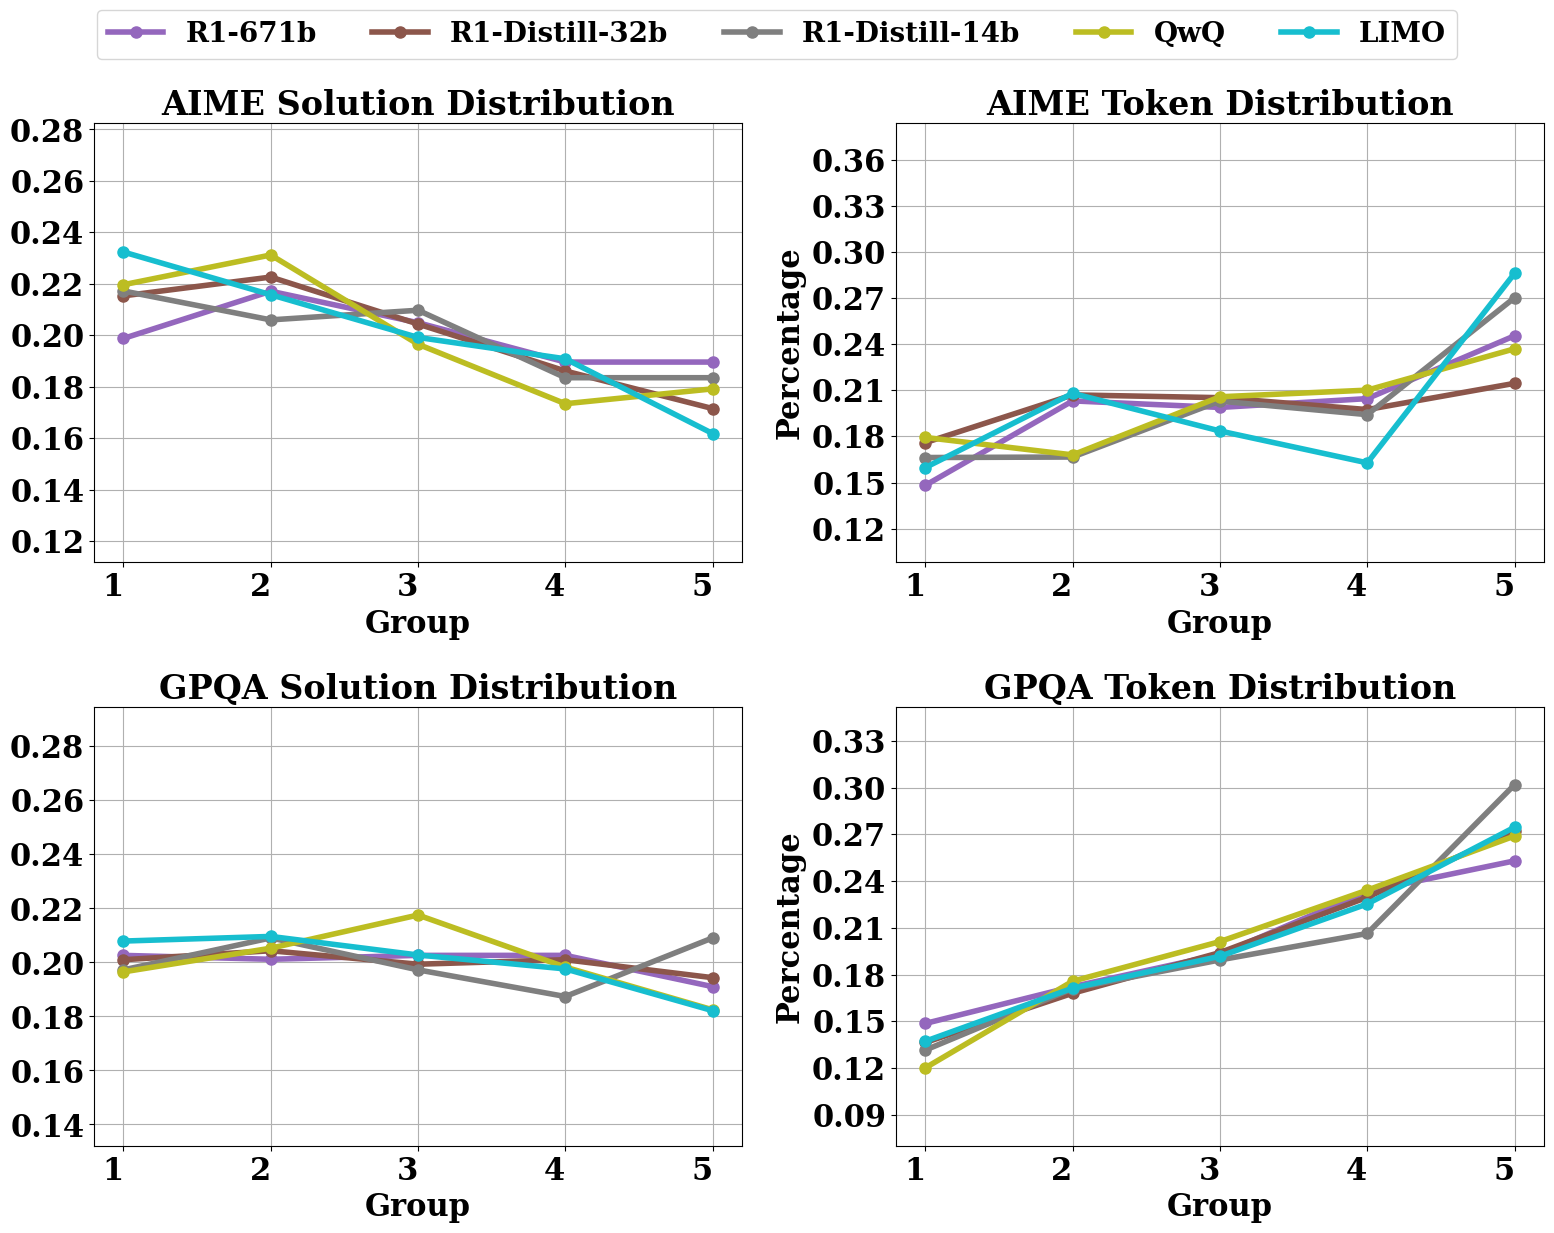

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

def plot_multiple_models_v2_overall(ax, data_dict, title="Overall Scores Comparison", xlabel='Group', ylabel="Accuracy",
                           xtick=None, rotation=0, color_theme='Blues', show_labels=True, y_range=None,
                           y_tick_interval=None):
    """
    可视化整体得分的折线图生成函数，支持多组数据

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        用于绘图的坐标轴对象。
    data_dict : dict of list of dict
        包含多个数据集的字典，每个键对应一个数据集的名称，值是对应的数据列表
    title : str, optional
        图表标题（默认："Overall Scores Comparison"）
    xlabel : str, optional
        x 轴标签（默认："Group"）
    ylabel : str, optional
        y 轴标签（默认："Accuracy"）
    xtick : list, optional
        x 轴刻度标签（默认：None，使用自动生成）
    rotation : int, optional
        x 轴刻度旋转角度（默认：45）
    color_theme : str, optional
        颜色主题名称（默认："Blues"）
    show_labels : bool, optional
        是否显示数据标签（默认：True）
    y_range : tuple, optional
        y 轴范围（默认：None，自动计算）
    y_tick_interval : float, optional
        y 轴刻度间隔（默认：None，自动计算）
    """
    # 颜色设置
    cmap = getattr(plt.cm, color_theme)
    colors = cmap(np.linspace(0.4, 1, len(data_dict)))
    
    # 计算最大 x 轴长度
    max_len = max(len(data_list) for data_list in data_dict.values())

    # 绘制每条折线
    for idx, (label, data_list) in enumerate(data_dict.items()):
        x_values = list(range(1, len(data_list) + 1))
        ax.plot(x_values, data_list, marker='o', linestyle='-', color=colors[idx], linewidth=4, markersize=8, label=label)
        
        # 添加数据标签
        if show_labels:
            for x, y in zip(x_values, data_list):
                ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom')

    # 自动设置 y 轴范围
    if y_range is None:
        all_values = [item for data_list in data_dict.values() for item in data_list]
        y_min, y_max = min(all_values) - 0.05, max(all_values) + 0.05
        y_range = (y_min, y_max)

    # 计算 y 轴刻度
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5

    # x 轴刻度和标签处理
    if xtick is None:
        xticks = list(range(1, max_len + 1))
        xticklabels = [str(i) for i in xticks]  # 转换为字符串
    else:
        xticks = list(range(1, len(xtick) + 1))  # 保持一致
        xticklabels = xtick

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=rotation, ha='right')  # 旋转并对齐

    # 设置 y 轴范围和刻度
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    ax.yaxis.set_major_locator(MaxNLocator(integer=False))  # 不强制整数
    ax.yaxis.set_major_formatter(FuncFormatter(format_yticks))  # 设置自定义格式

    # 标题和轴标签
    ax.set_title(title, fontsize=24)
    ax.set_xlabel(xlabel, fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    ax.grid()

# 创建包含四个子图的图形（2行2列）
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

aime_token_distribution = { 
    "R1-671b": [0.1481598113877942, 0.20307491663825325, 0.19882253302658173, 0.204545240007446, 0.2453974989399248],
    "R1-Distill-32b": [0.17593977077090173, 0.2069759328137363, 0.20516969972607974, 0.1974271432339204, 0.2144874534553618],
    "R1-Distill-14b": [0.16623580894476267, 0.16657062241732568, 0.20292685843322933, 0.19412558724581425, 0.27014112295886805],
    "LIMO": [0.17929040439450564, 0.16796018444567734, 0.20574197927526425, 0.21006657602897155, 0.23694085585558122],
    # "S1": [0.2033258632567537, 0.21181615442636076, 0.20055930269603506, 0.19565246989050847, 0.18864620973034205],
    # "R1-Distill-1.5b": [0.23391239202916558, 0.21636632014627288, 0.27520926592813194, 0.1421469182184673, 0.13236510367796225],
    "QwQ": [0.1597174101983204, 0.20798593625293707, 0.18350717979532882, 0.16278760928133673, 0.286001864472077]
}

gpqa_token_distribution = { 
    "R1-671b": [0.14859218615278985, 0.17219664452428993, 0.19291441783996638, 0.23332574048866597, 0.25297101099428787],
    "R1-Distill-32b": [0.13637064576420008, 0.16798599161721656, 0.19409244656270488, 0.22961015169568508, 0.27194076436019343],
    "R1-Distill-14b": [0.13149384468227887, 0.17092830187341151, 0.18936943342000215, 0.20635539768219288, 0.3018530223421146],
    # "R1-Distill-1.5b": [0.17928642091013225, 0.1884306987399771, 0.23443845673227118, 0.23020149953139643, 0.16764292408622306],
    "QwQ": [0.12009348221834172, 0.1757004458900876, 0.2011511739222515, 0.23415537479941798, 0.2688995231699012],
    "LIMO":  [0.13717363786569714, 0.171247205145293, 0.1917000866224222, 0.22532739726567583, 0.27455167310091183],
    # "S1": [0.13195968473525263, 0.1692620764749321, 0.22150424319978404, 0.24012072257039663, 0.23715327301963463]
}

aime_solution_distribution = {  
    "R1-671b": [0.19877675840978593, 0.21712538226299694, 0.20489296636085627, 0.18960244648318042, 0.18960244648318042],
    "R1-Distill-32b": [0.21532846715328466, 0.22262773722627738, 0.20437956204379562, 0.18613138686131386, 0.17153284671532848],
    "R1-Distill-14b": [0.21722846441947566, 0.20599250936329588, 0.20973782771535582, 0.18352059925093633, 0.18352059925093633],
    # "R1-Distill-1.5b": [0.2903225806451613, 0.23655913978494625, 0.24731182795698925, 0.12903225806451613, 0.0967741935483871],
    "QwQ": [0.21965317919075145, 0.23121387283236994, 0.19653179190751446, 0.17341040462427745, 0.1791907514450867],
    "LIMO": [0.23236514522821577, 0.2157676348547718, 0.1991701244813278, 0.1908713692946058, 0.16182572614107885],
    # "S1": [0.2323943661971831, 0.22535211267605634, 0.19718309859154928, 0.18309859154929578, 0.1619718309859155]
}

gpqa_solution_distribution = {  
    "R1-671b": [0.20260492040520983, 0.2011577424023155, 0.20260492040520983, 0.20260492040520983, 0.191027496382055],
    "R1-Distill-32b": [0.2009966777408638, 0.20431893687707642, 0.19933554817275748, 0.2009966777408638, 0.19435215946843853],
    "R1-Distill-14b": [0.19723865877712032, 0.20907297830374755, 0.19723865877712032, 0.1873767258382643, 0.20907297830374755],
    # "R1-Distill-1.5b": [0.2903225806451613, 0.23655913978494625, 0.24731182795698925, 0.12903225806451613, 0.0967741935483871],
    "QwQ": [0.19649122807017544, 0.20526315789473684, 0.21754385964912282, 0.19824561403508772, 0.1824561403508772],
    "LIMO": [0.20790378006872853, 0.20962199312714777, 0.2027491408934708, 0.19759450171821305, 0.18213058419243985],
    # "S1": [0.18064516129032257, 0.20430107526881722, 0.2172043010752688, 0.210752688172043, 0.1870967741935484]
}


# 绘制四个子图
plot_multiple_models_v2_overall(axs[0, 0], aime_solution_distribution, title="AIME Solution Distribution", ylabel='', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[0, 1], aime_token_distribution, title="AIME Token Distribution", ylabel='Percentage', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[1, 0], gpqa_solution_distribution, title="GPQA Solution Distribution", ylabel='', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[1, 1], gpqa_token_distribution, title="GPQA Token Distribution", ylabel='Percentage', color_theme='tab10', show_labels=False)

# 获取所有子图的图例
handles, labels = axs[0, 0].get_legend_handles_labels()

# 在顶部添加共享的图例
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fontsize=20)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_distribution.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

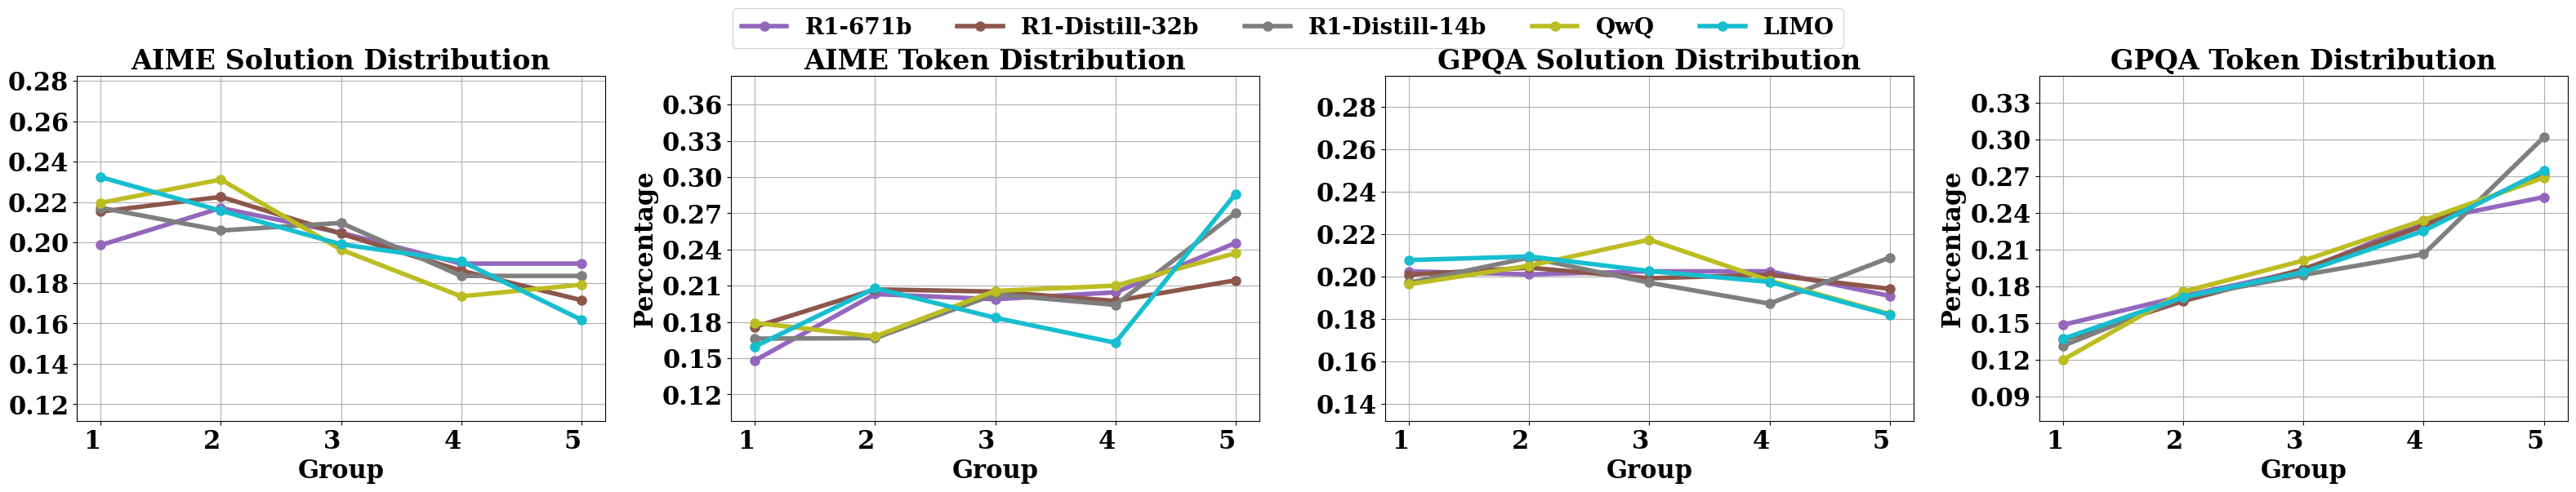

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

def plot_multiple_models_v2_overall(ax, data_dict, title="Overall Scores Comparison", xlabel='Group', ylabel="Accuracy",
                           xtick=None, rotation=0, color_theme='Blues', show_labels=True, y_range=None,
                           y_tick_interval=None):
    """
    可视化整体得分的折线图生成函数，支持多组数据

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        用于绘图的坐标轴对象。
    data_dict : dict of list of dict
        包含多个数据集的字典，每个键对应一个数据集的名称，值是对应的数据列表
    title : str, optional
        图表标题（默认："Overall Scores Comparison"）
    xlabel : str, optional
        x 轴标签（默认："Group"）
    ylabel : str, optional
        y 轴标签（默认："Accuracy"）
    xtick : list, optional
        x 轴刻度标签（默认：None，使用自动生成）
    rotation : int, optional
        x 轴刻度旋转角度（默认：45）
    color_theme : str, optional
        颜色主题名称（默认："Blues"）
    show_labels : bool, optional
        是否显示数据标签（默认：True）
    y_range : tuple, optional
        y 轴范围（默认：None，自动计算）
    y_tick_interval : float, optional
        y 轴刻度间隔（默认：None，自动计算）
    """
    # 颜色设置
    cmap = getattr(plt.cm, color_theme)
    colors = cmap(np.linspace(0.4, 1, len(data_dict)))
    
    # 计算最大 x 轴长度
    max_len = max(len(data_list) for data_list in data_dict.values())

    # 绘制每条折线
    for idx, (label, data_list) in enumerate(data_dict.items()):
        x_values = list(range(1, len(data_list) + 1))
        ax.plot(x_values, data_list, marker='o', linestyle='-', color=colors[idx], linewidth=4, markersize=8, label=label)
        
        # 添加数据标签
        if show_labels:
            for x, y in zip(x_values, data_list):
                ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom')

    # 自动设置 y 轴范围
    if y_range is None:
        all_values = [item for data_list in data_dict.values() for item in data_list]
        y_min, y_max = min(all_values) - 0.05, max(all_values) + 0.05
        y_range = (y_min, y_max)

    # 计算 y 轴刻度
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5

    # x 轴刻度和标签处理
    if xtick is None:
        xticks = list(range(1, max_len + 1))
        xticklabels = [str(i) for i in xticks]  # 转换为字符串
    else:
        xticks = list(range(1, len(xtick) + 1))  # 保持一致
        xticklabels = xtick

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=rotation, ha='right')  # 旋转并对齐

    # 设置 y 轴范围和刻度
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    ax.yaxis.set_major_locator(MaxNLocator(integer=False))  # 不强制整数
    ax.yaxis.set_major_formatter(FuncFormatter(format_yticks))  # 设置自定义格式

    # 标题和轴标签
    ax.set_title(title, fontsize=24)
    ax.set_xlabel(xlabel, fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    ax.grid()

# 创建包含四个子图的图形（1行4列）
fig, axs = plt.subplots(1, 4, figsize=(32, 6))

aime_token_distribution = { 
    "R1-671b": [0.1481598113877942, 0.20307491663825325, 0.19882253302658173, 0.204545240007446, 0.2453974989399248],
    "R1-Distill-32b": [0.17593977077090173, 0.2069759328137363, 0.20516969972607974, 0.1974271432339204, 0.2144874534553618],
    "R1-Distill-14b": [0.16623580894476267, 0.16657062241732568, 0.20292685843322933, 0.19412558724581425, 0.27014112295886805],
    "LIMO": [0.17929040439450564, 0.16796018444567734, 0.20574197927526425, 0.21006657602897155, 0.23694085585558122],
    "QwQ": [0.1597174101983204, 0.20798593625293707, 0.18350717979532882, 0.16278760928133673, 0.286001864472077]
}

gpqa_token_distribution = { 
    "R1-671b": [0.14859218615278985, 0.17219664452428993, 0.19291441783996638, 0.23332574048866597, 0.25297101099428787],
    "R1-Distill-32b": [0.13637064576420008, 0.16798599161721656, 0.19409244656270488, 0.22961015169568508, 0.27194076436019343],
    "R1-Distill-14b": [0.13149384468227887, 0.17092830187341151, 0.18936943342000215, 0.20635539768219288, 0.3018530223421146],
    "QwQ": [0.12009348221834172, 0.1757004458900876, 0.2011511739222515, 0.23415537479941798, 0.2688995231699012],
    "LIMO":  [0.13717363786569714, 0.171247205145293, 0.1917000866224222, 0.22532739726567583, 0.27455167310091183],
}

aime_solution_distribution = {  
    "R1-671b": [0.19877675840978593, 0.21712538226299694, 0.20489296636085627, 0.18960244648318042, 0.18960244648318042],
    "R1-Distill-32b": [0.21532846715328466, 0.22262773722627738, 0.20437956204379562, 0.18613138686131386, 0.17153284671532848],
    "R1-Distill-14b": [0.21722846441947566, 0.20599250936329588, 0.20973782771535582, 0.18352059925093633, 0.18352059925093633],
    "QwQ": [0.21965317919075145, 0.23121387283236994, 0.19653179190751446, 0.17341040462427745, 0.1791907514450867],
    "LIMO": [0.23236514522821577, 0.2157676348547718, 0.1991701244813278, 0.1908713692946058, 0.16182572614107885],
}

gpqa_solution_distribution = {  
    "R1-671b": [0.20260492040520983, 0.2011577424023155, 0.20260492040520983, 0.20260492040520983, 0.191027496382055],
    "R1-Distill-32b": [0.2009966777408638, 0.20431893687707642, 0.19933554817275748, 0.2009966777408638, 0.19435215946843853],
    "R1-Distill-14b": [0.19723865877712032, 0.20907297830374755, 0.19723865877712032, 0.1873767258382643, 0.20907297830374755],
    "QwQ": [0.19649122807017544, 0.20526315789473684, 0.21754385964912282, 0.19824561403508772, 0.1824561403508772],
    "LIMO": [0.20790378006872853, 0.20962199312714777, 0.2027491408934708, 0.19759450171821305, 0.18213058419243985],
}

# 绘制四个子图
plot_multiple_models_v2_overall(axs[0], aime_solution_distribution, title="AIME Solution Distribution", ylabel='', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[1], aime_token_distribution, title="AIME Token Distribution", ylabel='Percentage', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[2], gpqa_solution_distribution, title="GPQA Solution Distribution", ylabel='', color_theme='tab10', show_labels=False)
plot_multiple_models_v2_overall(axs[3], gpqa_token_distribution, title="GPQA Token Distribution", ylabel='Percentage', color_theme='tab10', show_labels=False)

# 获取所有子图的图例
handles, labels = axs[0].get_legend_handles_labels()

# 在顶部添加共享的图例
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fontsize=20)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_distribution.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_models_v2(data_dict,
                        title="Overall Scores Comparison",
                        xlabel='Group',
                        ylabel="Accuracy",
                        xtick=None,
                        rotation=0,
                        color_theme='Blues',
                        figsize=(10, 8),
                        show_labels=True,
                        y_range=None,
                        y_tick_interval=None,
                        x_tick_interval=1,  # New parameter
                        output_filename=None,
                        color_range=(0,1)):
    """
    Visualization function for generating line plots of overall scores, supporting multiple datasets
    Parameters:
    -----------
    data_dict : dict of list of dict
        Dictionary containing multiple datasets, each key corresponds to a dataset name
    title : str, optional
        Chart title (default: "Overall Scores Comparison")
    xlabel : str, optional
        x-axis label (default: "Group")
    ylabel : str, optional
        y-axis label (default: "Accuracy")
    xtick : list, optional
        x-axis tick labels (default: None, auto-generated)
    rotation : int, optional
        x-axis tick rotation angle (default: 0)
    color_theme : str, optional
        Color theme name (default: "Blues")
    figsize : tuple, optional
        Figure size (default: (10,8))
    show_labels : bool, optional
        Whether to show data labels (default: True)
    y_range : tuple, optional
        y-axis range (default: None, auto-calculated)
    y_tick_interval : float, optional
        y-axis tick interval (default: None, auto-calculated)
    x_tick_interval : int, optional
        x-axis tick interval (default: 1)
    output_filename : str, optional
        Output filename (default: None, displays chart)
    Returns:
    --------
    matplotlib.figure.Figure
        Generated chart object
    """
    # Initialize canvas
    fig, ax = plt.subplots(figsize=figsize)
    
    # Color settings
    cmap = getattr(plt.cm, color_theme)
    colors = cmap(np.linspace(color_range[0], color_range[1], len(data_dict)))
    
    # Calculate maximum x-axis length
    max_len = max(len(data_list) for data_list in data_dict.values())
    
    # Plot each line
    for idx, (label, data_list) in enumerate(data_dict.items()):
        x_values = list(range(1, len(data_list) + 1))
        ax.plot(x_values, data_list, marker='o', linestyle='-', color=colors[idx], 
                linewidth=4, markersize=8, label=label)
        
        # Add data labels
        if show_labels:
            for x, y in zip(x_values, data_list):
                ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom')
    
    # Auto-set y-axis range
    if y_range is None:
        all_values = [item for data_list in data_dict.values() for item in data_list]
        y_min, y_max = min(all_values) - 0.05, max(all_values) + 0.05
        y_range = (y_min, y_max)
    
    # Calculate y-axis ticks
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5
    
    # x-axis ticks and labels processing
    if xtick is None:
        xticks = list(range(1, max_len + 1, x_tick_interval))
        xticklabels = [str(i) for i in xticks]
    else:
        xticks = list(range(1, len(xtick) + 1, x_tick_interval))
        xticklabels = xtick[::x_tick_interval]
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=rotation, ha='right')
    
    # Set y-axis range and ticks
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    
    # Title and axis labels
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=28)
    ax.set_ylabel(ylabel, fontsize=28)
    
    # Add legend
    ax.legend(fontsize=22)
    ax.grid()
    # Save or display chart
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()

In [588]:
# # aime_token_distribution = {
# #     "R1-full": [0.14815981, 0.20307492, 0.19882253, 0.20454524, 0.2453975],
# #     "R1-Distill-32b": [0.17517189, 0.19537615, 0.20132594, 0.20519714, 0.22292888],
# #     "R1-Distill-14b": [0.15895968, 0.16802426, 0.20469777, 0.19581969, 0.2724986],
# #     "R1-Distill-1.5b": [0.23114288, 0.22450913, 0.24912399, 0.14427821, 0.15094579],
# #     "QwQ": [0.13739577, 0.16886667, 0.20133876, 0.17860585, 0.31379295]
# # }

# # aime_solution_distribution = {
# #     "R1-full": [0.19877676, 0.21712538, 0.20489297, 0.18960245, 0.18960245],
# #     "R1-Distill-32b": [0.21481481, 0.21851852, 0.2037037, 0.18888889, 0.17407407],
# #     "R1-Distill-14b": [0.21428571, 0.20676692, 0.21052632, 0.18421053, 0.18421053],
# #     "R1-Distill-1.5b": [0.28571429, 0.23809524, 0.23809524, 0.13095238, 0.10714286],
# #     "QwQ": [0.20245399, 0.21472393, 0.20858896, 0.18404908, 0.19018405],
# # }

# # gpqa_token_distribution = {
# #     "R1-full": [0.12271329481043007, 0.1694332886845111, 0.18403165522214288, 0.21745794086747885, 0.3063638204154371],
# #     "R1-Distill-32b": [0.17517189, 0.19537615, 0.20132594, 0.20519714, 0.22292888],
# #     "R1-Distill-14b": [0.15895968, 0.16802426, 0.20469777, 0.19581969, 0.2724986],
# #     "R1-Distill-1.5b": [0.23114288, 0.22450913, 0.24912399, 0.14427821, 0.15094579],
# #     "QwQ": [0.13739577, 0.16886667, 0.20133876, 0.17860585, 0.31379295]
# # }

# # gpqa_token_distribution = {
# #     "R1-full": [0.14859218615278985, 0.17219664452428993, 0.19291441783996638, 0.23332574048866597, 0.25297101099428787],
# #     "R1-Distill-32b": [0.13679461387611577, 0.16539931025155533, 0.19469586827157154, 0.23032399580741142, 0.27278621179334595],
# #     "R1-Distill-14b": [0.12271329481043007, 0.1694332886845111, 0.18403165522214288, 0.21745794086747885, 0.3063638204154371],
# #     "R1-Distill-1.5b": [0.14815981, 0.20307492, 0.19882253, 0.20454524, 0.2453975],
# #     "QwQ": [0.11534700517832652, 0.16829312043688782, 0.1988075025318616, 0.22416037490236917, 0.2933919969505549]
# # }

# # gpqa_solution_distribution = { 
# #     "R1-full": [0.20260492040520983, 0.2011577424023155, 0.20260492040520983, 0.20260492040520983, 0.191027496382055],
# #     "R1-Distill-32b": [0.20133111480865223, 0.20299500831946754, 0.19966722129783693, 0.20133111480865223, 0.194675540765391],
# #     "R1-Distill-14b": [0.1913265306122449, 0.2066326530612245, 0.1913265306122449, 0.19642857142857142, 0.21428571428571427],
# #     "R1-Distill-1.5b": [0.23114288, 0.22450913, 0.24912399, 0.14427821, 0.15094579],
# #     "QwQ": [0.192090395480226, 0.19962335216572505, 0.21657250470809794, 0.1958568738229755, 0.1958568738229755]
# # }
# aime_token_distribution = { 
#     "R1-671b": [0.1481598113877942, 0.20307491663825325, 0.19882253302658173, 0.204545240007446, 0.2453974989399248],
#     "R1-Distill-32b": [0.17593977077090173, 0.2069759328137363, 0.20516969972607974, 0.1974271432339204, 0.2144874534553618],
#     "R1-Distill-14b": [0.16623580894476267, 0.16657062241732568, 0.20292685843322933, 0.19412558724581425, 0.27014112295886805],
#     "R1-Distill-1.5b": [0.23391239202916558, 0.21636632014627288, 0.27520926592813194, 0.1421469182184673, 0.13236510367796225],
#     "QwQ": [0.1597174101983204, 0.20798593625293707, 0.18350717979532882, 0.16278760928133673, 0.286001864472077]
# }

# gpqa_token_distribution = { 
#     "R1-671b": [0.14859218615278985, 0.17219664452428993, 0.19291441783996638, 0.23332574048866597, 0.25297101099428787],
#     "R1-Distill-32b": [0.13637064576420008, 0.16798599161721656, 0.19409244656270488, 0.22961015169568508, 0.27194076436019343],
#     "R1-Distill-14b": [0.13149384468227887, 0.17092830187341151, 0.18936943342000215, 0.20635539768219288, 0.3018530223421146],
#     # "R1-Distill-1.5b": [0.17928642091013225, 0.1884306987399771, 0.23443845673227118, 0.23020149953139643, 0.16764292408622306],
#     "QwQ": [0.12009348221834172, 0.1757004458900876, 0.2011511739222515, 0.23415537479941798, 0.2688995231699012]
# }

# aime_solution_distribution = {  
#     "R1-671b": [0.19877675840978593, 0.21712538226299694, 0.20489296636085627, 0.18960244648318042, 0.18960244648318042],
#     "R1-Distill-32b": [0.21532846715328466, 0.22262773722627738, 0.20437956204379562, 0.18613138686131386, 0.17153284671532848],
#     "R1-Distill-14b": [0.21722846441947566, 0.20599250936329588, 0.20973782771535582, 0.18352059925093633, 0.18352059925093633],
#     "R1-Distill-1.5b": [0.2903225806451613, 0.23655913978494625, 0.24731182795698925, 0.12903225806451613, 0.0967741935483871],
#     "QwQ": [0.21965317919075145, 0.23121387283236994, 0.19653179190751446, 0.17341040462427745, 0.1791907514450867]
# }

# gpqa_solution_distribution = {  
#     "R1-671b": [0.20260492040520983, 0.2011577424023155, 0.20260492040520983, 0.20260492040520983, 0.191027496382055],
#     "R1-Distill-32b": [0.2009966777408638, 0.20431893687707642, 0.19933554817275748, 0.2009966777408638, 0.19435215946843853],
#     "R1-Distill-14b": [0.19723865877712032, 0.20907297830374755, 0.19723865877712032, 0.1873767258382643, 0.20907297830374755],
#     # "R1-Distill-1.5b": [0.2903225806451613, 0.23655913978494625, 0.24731182795698925, 0.12903225806451613, 0.0967741935483871],
#     "QwQ": [0.19649122807017544, 0.20526315789473684, 0.21754385964912282, 0.19824561403508772, 0.1824561403508772]
# }

# # gpqa_data_dict = {
# #     "R1-Distill-32b": [0.17517189 0.19537615 0.20132594 0.20519714 0.22292888],
# #     "R1-Distill-14b": [211536, 292073, 317238, 374859, 528117],
# #     "QwQ": [185194, 270201, 319193, 359898, 471052]
# # }

# plot_multiple_models_v2(aime_token_distribution, title="AIME Token Distribution", show_labels=False, color_theme='viridis', output_filename='imgs/aime_correct_token_distribution.pdf', ylabel='Percentage')
# plot_multiple_models_v2(aime_solution_distribution, title="AIME Solution Distribution", show_labels=False, color_theme='viridis', output_filename='imgs/aime_correct_solution_distribution.pdf', ylabel='Percentage')
# plot_multiple_models_v2(gpqa_token_distribution, title="GPQA Token Distribution", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_correct_token_distribution.pdf', ylabel='Percentage')
# plot_multiple_models_v2(gpqa_solution_distribution, title="GPQA Solution Distribution", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_correct_solution_distribution.pdf', ylabel='Percentage')



In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_multiple_models_v3(data_dict,
                        title="Overall Scores Comparison",
                        xlabel='Percentage',
                        ylabel="Accuracy",
                        color_theme='Blues',
                        figsize=(10, 8),
                        show_labels=True,
                        y_range=None,
                        y_tick_interval=None,
                        output_filename=None):
    """
    可视化整体得分的折线图生成函数，支持多组数据，x轴显示百分比

    Parameters:
    -----------
    data_dict : dict of list of dict
        包含多个数据集的字典，每个键对应一个数据集的名称，值是对应的数据列表
    title : str, optional
        图表标题（默认："Overall Scores Comparison"）
    color_theme : str, optional
        颜色主题名称（默认："Blues"）
    figsize : tuple, optional
        图表尺寸（默认：(10,6)）
    show_labels : bool, optional
        是否显示数据标签（默认：True）
    y_range : tuple, optional
        y轴范围（默认：None，自动根据数据范围设置）
    y_tick_interval : float, optional
        y轴刻度间隔（默认：None，自动计算）
    output_filename : str, optional
        输出文件名（默认不保存，显示图表）

    Returns:
    --------
    matplotlib.figure.Figure
        生成的图表对象
    """
    # 初始化画布
    fig, ax = plt.subplots(figsize=figsize)
    
    # 创建渐变色方案
    cmap = getattr(plt.cm, color_theme)
    colors = cmap(np.linspace(0.4, 1, len(data_dict)))
    
    # 获取最长数据列表的长度
    max_length = max(len(data_list) for data_list in data_dict.values())
    
    # 计算百分比刻度
    percentage_step = 100 / max_length
    x_percentages = [i * percentage_step for i in range(1, max_length + 1)]
    
    # 绘制每条折线
    for idx, (label, data_list) in enumerate(data_dict.items()):
        overall_values = [item for item in data_list]
        x_values = range(1, len(overall_values) + 1)
        ax.plot(x_values, overall_values, marker='o', linestyle='-', color=colors[idx], linewidth=6, markersize=8, label=label)
        
        # 添加数据标签
        if show_labels:
            for x, y in zip(x_values, overall_values):
                ax.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=12)
    
    # 自动设置 y 轴范围
    if y_range is None:
        all_values = [item for data_list in data_dict.values() for item in data_list]
        y_min = min(all_values) - 0.05  # 留出一些边距
        y_max = max(all_values) + 0.05
        y_range = (y_min, y_max)
    
    # 自动设置 y 轴刻度间隔
    if y_tick_interval is None:
        y_range_diff = y_range[1] - y_range[0]
        y_tick_interval = y_range_diff / 5  # 默认分为 5 个间隔
    
    # 坐标轴设置
    ax.set_title(title, fontsize=34)
    ax.set_xlabel(xlabel, fontsize=32)
    ax.set_ylabel(ylabel, fontsize=32)
    
    # 设置x轴刻度和标签，并旋转45度
    ax.set_xticks(range(1, max_length + 1))
    ax.set_xticklabels([f'{p:.0f}%' for p in x_percentages], rotation=45, ha='right')
    
    ax.set_ylim(y_range)
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval))
    
    # 添加图例
    ax.legend(fontsize=28)
    
    # 调整布局以防止标签被切掉
    plt.tight_layout()
    
    # 保存或显示图表
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()

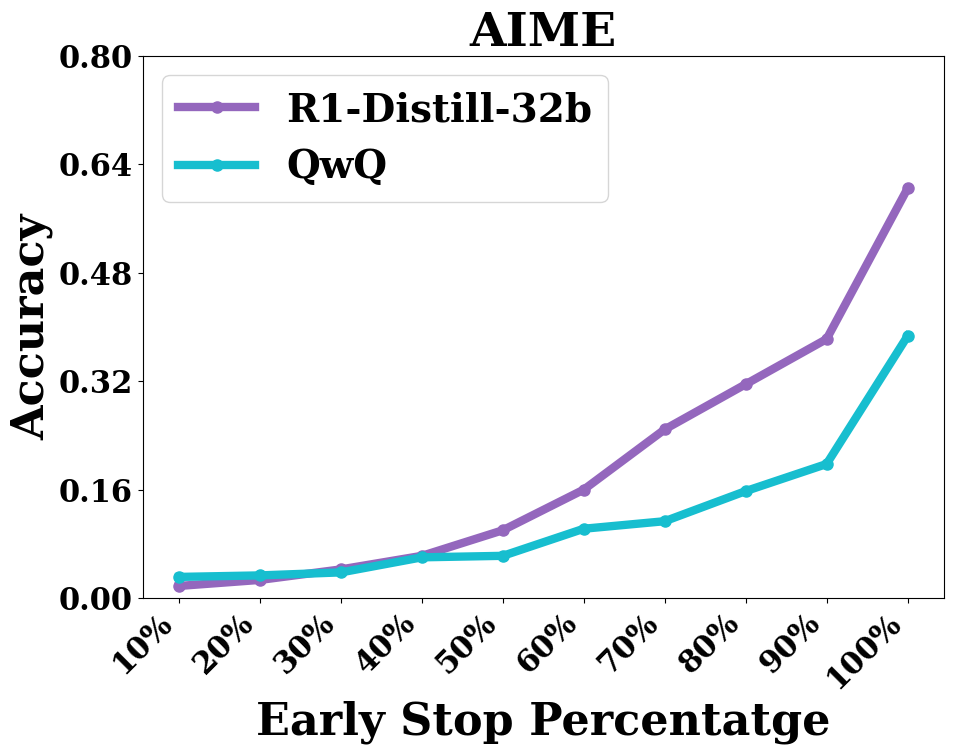

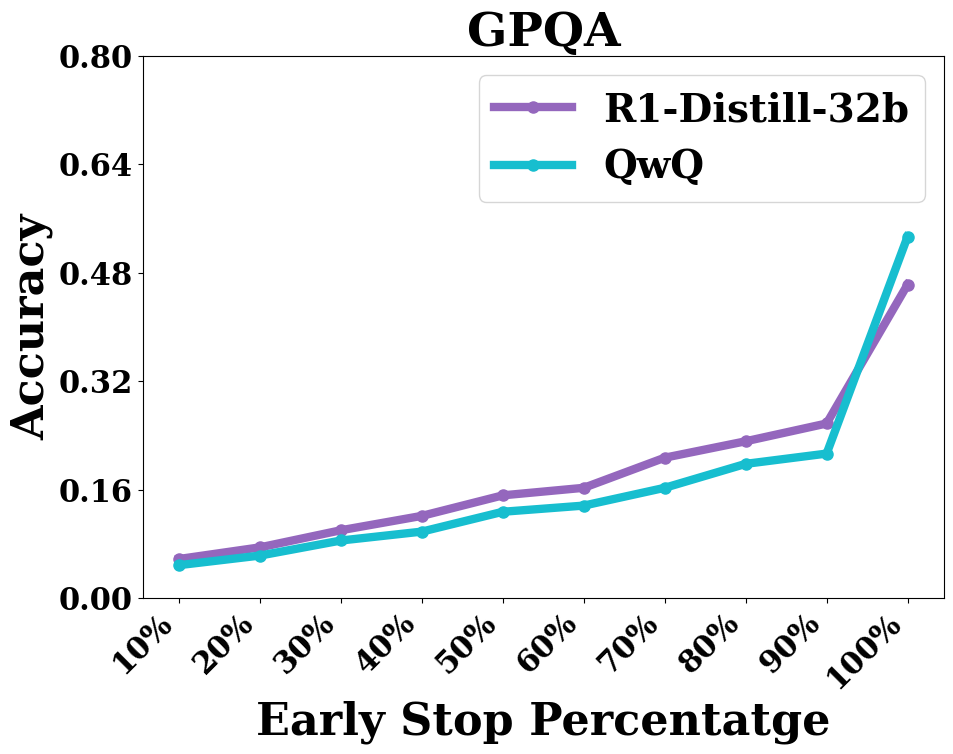

In [216]:
aime_data_dict = {
    "R1-Distill-32b": [0.017777777777777778, 0.02666666666666667, 0.042222222222222223, 0.06222222222222222, 0.1, 0.16, 0.24888888888888888, 0.31555555555555553, 0.38222222222222224, 0.6044444444444445],
    # "R1-Distill-14b": [342643, 362182, 441233, 422096, 587380],
    # "R1-Distill-1.5b": [109304, 106167, 117807, 68227, 71380],
    "QwQ": [0.03111111111111111, 0.03333333333333333, 0.03777777777777778, 0.06, 0.06222222222222222, 0.10222222222222223, 0.11333333333333333, 0.15777777777777777, 0.19777777777777777, 0.38666666666666666]
}

gpqa_data_dict = {
    "R1-Distill-32b": [0.05757575757575758, 0.07474747474747474, 0.1, 0.12121212121212122, 0.15151515151515152, 0.16262626262626262, 0.20707070707070707, 0.2313131313131313, 0.25757575757575757, 0.4626262626262626],
    # "R1-Distill-14b": [211536, 292073, 317238, 374859, 528117],
    "QwQ": [0.048484848484848485, 0.06262626262626263, 0.08484848484848485, 0.09797979797979799, 0.12727272727272726, 0.13636363636363635, 0.16262626262626262, 0.19797979797979798, 0.21313131313131314, 0.5333333333333333]
}

plot_multiple_models_v3(aime_data_dict, title="AIME", show_labels=False, color_theme='tab10', output_filename='imgs/aime_early_stop.pdf', xlabel='Early Stop Percentatge', ylabel='Accuracy', y_range=(0,0.8))
plot_multiple_models_v3(gpqa_data_dict, title="GPQA", show_labels=False, color_theme='tab10', output_filename='imgs/gpqa_early_stop.pdf', xlabel='Early Stop Percentatge', ylabel='Accuracy', y_range=(0,0.8))

# plot_multiple_models_v2(gpqa_data_dict, title="GPQA", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_num_tokens.pdf', ylabel='Number of Tokens')


In [309]:
qwq_aime_len = {"correct": 6645.10632183908, "incorrect": 11206.709770114943}
R1_full_aime_len = {"correct": 14049.01811594203, "incorrect": 15939.630434782608}
R1_Distill_1_5b_aime_len = {"correct": 7501.725806451613, "incorrect": 15702.327956989247}
R1_Distill_14b_aime_len = {"correct": 12301.550438596492, "incorrect": 15555.296052631578}
R1_Distill_32b_aime_len = {"correct": 10165.452083333334, "incorrect": 13778.814583333335}
limo_32b_aime_len = {"correct": 12325.783333333333, "incorrect": 18942.43571428571}

qwq_math_len = {"correct": 4541.3447916666655, "incorrect": 8573.734375}
R1_full_math_len = {"correct": 6713.263333333333, "incorrect": 7282.083333333334}
R1_Distill_1_5b_math_len = {"correct": 4913.576530612244, "incorrect": 8922.891156462585}
R1_Distill_14b_math_len = {"correct": 4932.654761904761, "incorrect": 6769.496031746032}
R1_Distill_32b_math_len = {"correct": 3211.834444444444, "incorrect": 3599.324444444445}
limo_32b_math_len = {"correct": 5894.941441441441, "incorrect": 8840.593468468467}

qwq_gpqa_len = {"correct": 3552.2403846153848, "incorrect": 6304.822916666666}
R1_full_gpqa_len = {"correct": 7539.373106060607, "incorrect": 8792.810606060606}
R1_Distill_1_5b_gpqa_len = {"correct": 1692.0861111111112, "incorrect": 3708.4819444444443}
R1_Distill_14b_gpqa_len = {"correct": 5782.7032967032965, "incorrect": 6101.158424908424}
R1_Distill_32b_gpqa_len = {"correct": 6416.828638497654, "incorrect": 6836.004694835679}
limo_32b_gpqa_len = {"correct": 7514.929324894514, "incorrect": 9032.762658227848}
s1_gpqa_len = {"correct": 3546.51, "incorrect": 3678.99, "random len": 6041.666666666667}

qwq_omini_len = {"correct": 6887.075483091788, "incorrect": 10333.207125603865}
R1_full_omini_len = {"correct": 11178.349794238684, "incorrect": 13167.662551440328}
R1_Distill_1_5b_omini_len = {"correct": 8546.809360730595, "incorrect": 12441.92066210046}
R1_Distill_14b_omini_len = {"correct": 10446.762068965516, "incorrect": 13811.82183908046}
R1_Distill_32b_omini_len = {"correct": 8607.543827160493, "incorrect": 10667.624074074074}
limo_32b_omini_len = {"correct": 11171.080357142851, "incorrect": 14390.926190476186}

aime_data = {
    "R1-671b": R1_full_aime_len,
    "R1-Distill-32b": R1_Distill_32b_aime_len,
    "R1-Distill-14b": R1_Distill_14b_aime_len,
    "R1-Distill-1.5b": R1_Distill_1_5b_aime_len,
    "QwQ": qwq_aime_len,
    "LIMO": limo_32b_aime_len,
    # "S1": s1_aime_len 
}

math_data = {
    "R1-671b": R1_full_math_len,
    "R1-Distill-32b": R1_Distill_32b_math_len,
    "R1-Distill-14b": R1_Distill_14b_math_len,
    "R1-Distill-1.5b": R1_Distill_1_5b_math_len,
    "QwQ": qwq_math_len,
    "LIMO": limo_32b_math_len,
    # "s1": s1_math_len
}

gpqa_data = {
    "R1-671b": R1_full_gpqa_len,
    "R1-Distill-32b": R1_Distill_32b_gpqa_len,
    "R1-Distill-14b": R1_Distill_14b_gpqa_len,
    "R1-Distill-1.5b": R1_Distill_1_5b_gpqa_len,
    "QwQ": qwq_gpqa_len,
    "LIMO": limo_32b_gpqa_len,
    # "s1": s1_gpqa_len
}

omini_data = {
    "R1-671b": R1_full_omini_len,
    "R1-Distill-32b": R1_Distill_32b_omini_len,
    "R1-Distill-14b": R1_Distill_14b_omini_len,
    "R1-Distill-1.5b": R1_Distill_1_5b_omini_len,
    "QwQ": qwq_omini_len,
    "LIMO": limo_32b_omini_len,
    # "s1": s1_omini_len
}

# plot_multiple_dicts_as_bar_chart(math_data, title="MATH Comparision", ylabel="Length", filename="imgs/math_correct_vs_incorrect.pdf")
# plot_multiple_dicts_as_bar_chart(aime_data, title="AIME Comparision", ylabel="Length", filename="imgs/aime_correct_vs_incorrect.pdf")
# plot_multiple_dicts_as_bar_chart(gpqa_data, title="GPQA Comparision", ylabel="Length", filename="imgs/gpqa_correct_vs_incorrect.pdf")
# plot_multiple_dicts_as_bar_chart(omini_data, title="OMINI Comparision", ylabel="Length", filename="imgs/omini_correct_vs_incorrect.pdf")

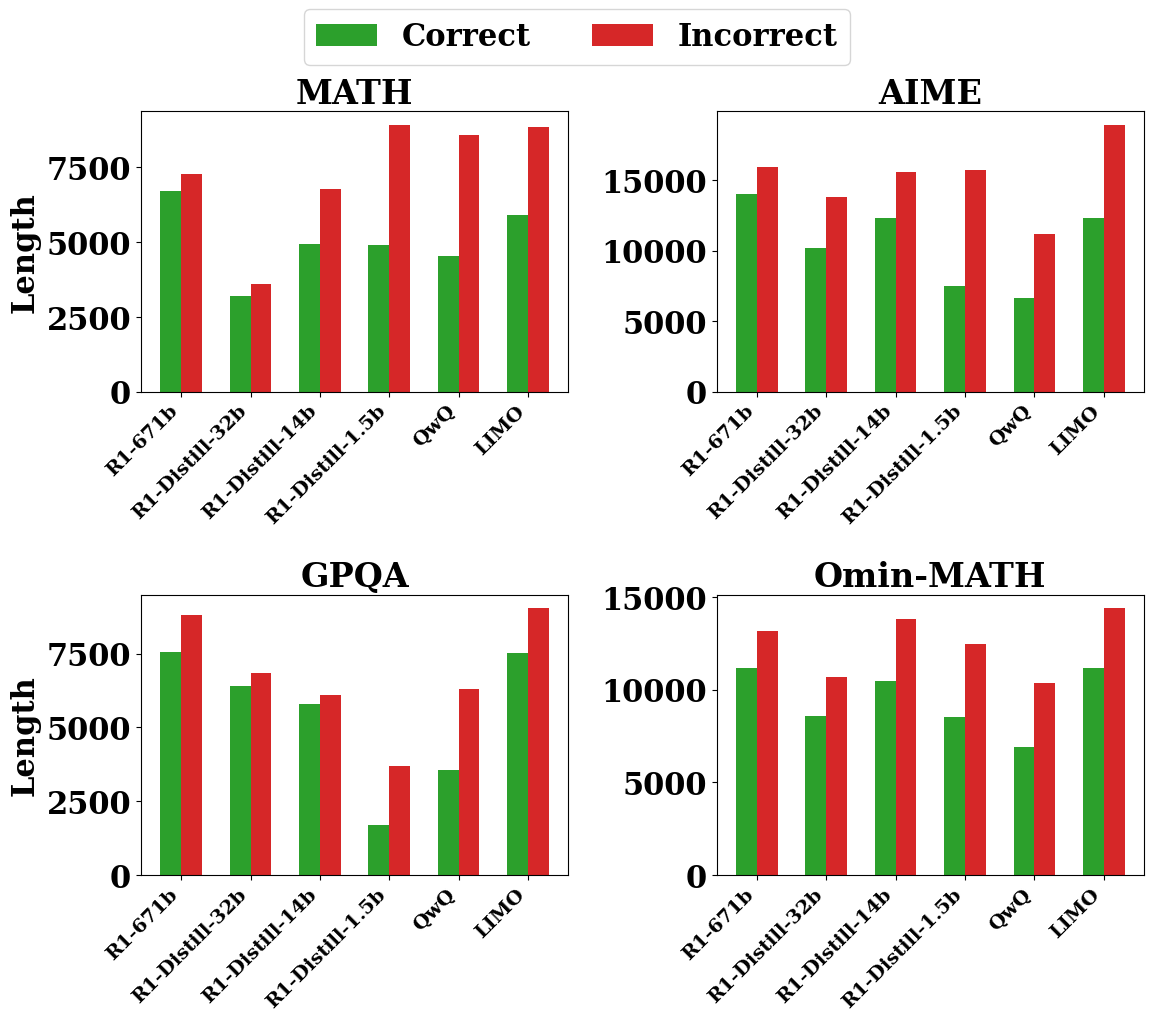

In [310]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # 导入 seaborn 库

def plot_multiple_dicts_as_bar_chart(ax, data, title="不同字典数据的对比", ylabel="数值"):
    """
    将多个字典的 "correct" 和 "incorrect" 数据绘制在同一个柱状图中，
    并进行对比和区分，使用 viridis 颜色风格。

    Args:
        ax (matplotlib.axes.Axes): 用于绘图的坐标轴对象。
        data (dict): 包含多个字典的字典，键为字典名称，值为字典数据。
        title (str): 图表标题。
        ylabel (str): y 轴标签。
    """
    # sns.set_style("whitegrid")
    
    # 创建渐变色方案
    labels = ["Correct", "Incorrect"]  # 类别标签
    num_dicts = len(data)
    x = np.arange(num_dicts)  # x 轴坐标，为每个模型预留位置
    width = 0.3  # 柱子的宽度，调整为更宽，因为每组只有两个柱子

    # 使用 viridis 颜色方案
    # colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    colors = [plt.cm.tab10(0.2), plt.cm.tab10(0.3)]
    # 绘制柱状图
    for i, label in enumerate(labels):
        values = [d["correct"] if label == "Correct" else d["incorrect"] for d in data.values()]
        ax.bar(x + i * width, values, width, label=label, color=colors[i])

    # 设置图表标题和标签
    ax.set_ylabel(ylabel)  # 设置 y 轴标签字体大小
    ax.set_title(title, fontsize=24)  # 设置标题字体大小
    ax.set_xticks(x + width / 2)  # 设置 x 轴刻度位置，在每组柱子中间
    ax.set_xticklabels(data.keys(), rotation=45, ha='right', fontsize=14)  # 设置 x 轴刻度标签字体大小

# 创建包含四个子图的图形（2x2 排列）
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 调整为 2x2 布局

# 绘制四个子图
plot_multiple_dicts_as_bar_chart(axs[0, 0], math_data, title="MATH", ylabel="Length")
plot_multiple_dicts_as_bar_chart(axs[0, 1], aime_data, title="AIME", ylabel="")
plot_multiple_dicts_as_bar_chart(axs[1, 0], gpqa_data, title="GPQA", ylabel="Length")
plot_multiple_dicts_as_bar_chart(axs[1, 1], omini_data, title="Omin-MATH", ylabel="")

# 获取所有子图的图例
handles, labels = axs[0, 0].get_legend_handles_labels()

# 在顶部添加共享的图例
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=22)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_correct_vs_incorrect.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

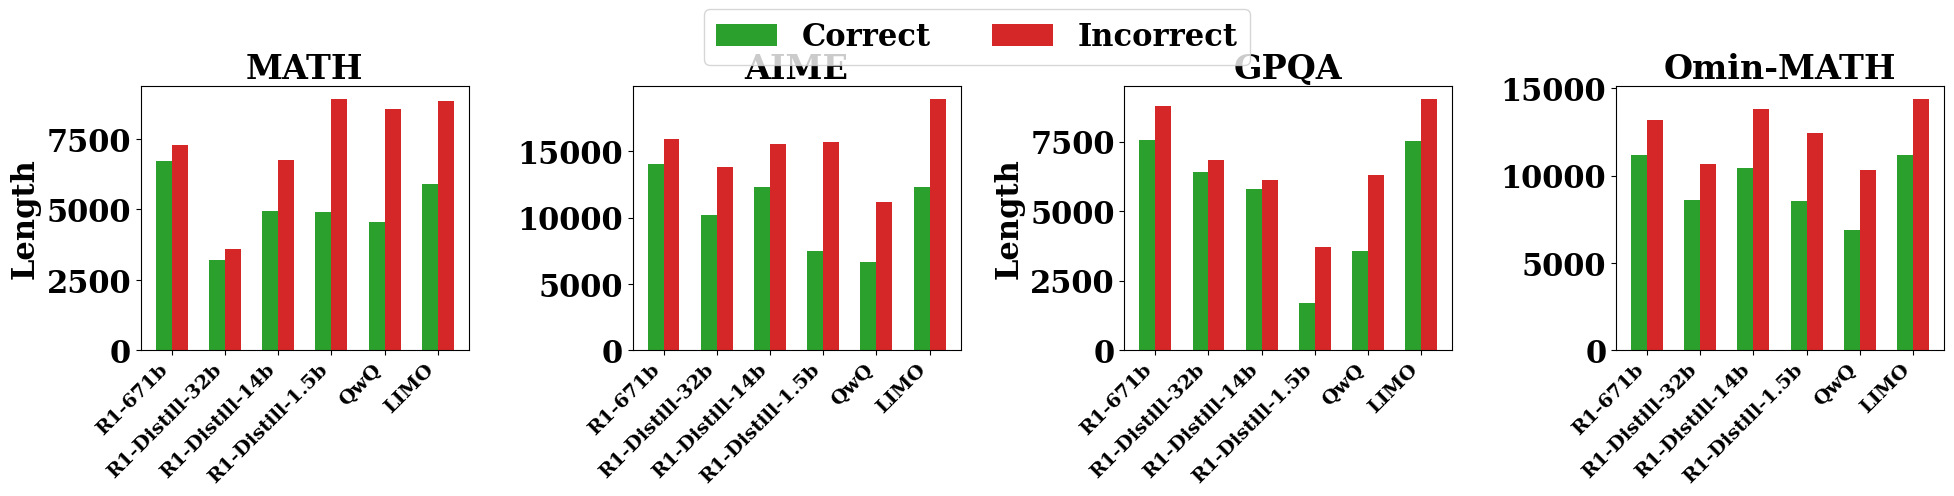

In [311]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_multiple_dicts_as_bar_chart(ax, data, title="不同字典数据的对比", ylabel="数值"):
    """
    将多个字典的 "correct" 和 "incorrect" 数据绘制在同一个柱状图中，
    并进行对比和区分，使用 viridis 颜色风格。

    Args:
        ax (matplotlib.axes.Axes): 用于绘图的坐标轴对象。
        data (dict): 包含多个字典的字典，键为字典名称，值为字典数据。
        title (str): 图表标题。
        ylabel (str): y 轴标签。
    """
    # sns.set_style("whitegrid")
    
    # 创建渐变色方案
    labels = ["Correct", "Incorrect"]  # 类别标签
    num_dicts = len(data)
    x = np.arange(num_dicts)  # x 轴坐标，为每个模型预留位置
    width = 0.3  # 柱子的宽度，调整为更宽，因为每组只有两个柱子

    # 使用 viridis 颜色方案
    colors = [plt.cm.tab10(0.2), plt.cm.tab10(0.3)]
    
    # 绘制柱状图
    for i, label in enumerate(labels):
        values = [d["correct"] if label == "Correct" else d["incorrect"] for d in data.values()]
        ax.bar(x + i * width, values, width, label=label, color=colors[i])

    # 设置图表标题和标签
    ax.set_ylabel(ylabel)  # 设置 y 轴标签字体大小
    ax.set_title(title, fontsize=24)  # 设置标题字体大小
    ax.set_xticks(x + width / 2)  # 设置 x 轴刻度位置，在每组柱子中间
    ax.set_xticklabels(data.keys(), rotation=45, ha='right', fontsize=14)  # 设置 x 轴刻度标签字体大小

# 创建包含四个子图的图形（1x4 排列）
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 调整为 1x4 布局

# 绘制四个子图
plot_multiple_dicts_as_bar_chart(axs[0], math_data, title="MATH", ylabel="Length")
plot_multiple_dicts_as_bar_chart(axs[1], aime_data, title="AIME", ylabel="")
plot_multiple_dicts_as_bar_chart(axs[2], gpqa_data, title="GPQA", ylabel="Length")
plot_multiple_dicts_as_bar_chart(axs[3], omini_data, title="Omin-MATH", ylabel="")

# 获取所有子图的图例
handles, labels = axs[0].get_legend_handles_labels()

# 在顶部添加共享的图例
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=22)

# 调整布局
plt.tight_layout()

# 保存为 PDF 文件
plt.savefig("imgs/overall_correct_vs_incorrect.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

In [ ]:
math_data_dict = {
    "R1-Distill-32b": [{5: 0.7272727272727273, 4: 0.8217821782178217, 3: 0.813953488372093, 1: 0.8787878787878788, 2: 0.8857142857142857, 'overall': 0.81}, {5: 0.7181818181818181, 4: 0.8415841584158416, 3: 0.872093023255814, 1: 0.8787878787878788, 2: 0.8714285714285714, 'overall': 0.8225}, {5: 0.7, 4: 0.8316831683168316, 3: 0.8953488372093024, 1: 0.9090909090909091, 2: 0.8714285714285714, 'overall': 0.8225}, {5: 0.6818181818181818, 4: 0.7920792079207921, 3: 0.9186046511627907, 1: 0.9393939393939394, 2: 0.9142857142857143, 'overall': 0.8225}, {5: 0.6454545454545455, 4: 0.7623762376237624, 3: 0.8255813953488372, 1: 0.9090909090909091, 2: 0.9, 'overall': 0.78}],
    "R1-Distill-14b": [{5: 0.7258064516129032, 2: 0.8846153846153846, 4: 0.7610619469026548, 3: 0.9325842696629213, 1: 0.9523809523809523, 'overall': 0.8251121076233184}, {5: 0.782258064516129, 2: 0.8974358974358975, 4: 0.8230088495575221, 3: 0.9213483146067416, 1: 0.9523809523809523, 'overall': 0.8565022421524664}, {5: 0.8064516129032258, 2: 0.9102564102564102, 4: 0.8230088495575221, 3: 0.9662921348314607, 1: 0.9285714285714286, 'overall': 0.8721973094170403}, {5: 0.8548387096774194, 2: 0.9358974358974359, 4: 0.8672566371681416, 3: 0.9662921348314607, 1: 0.9523809523809523, 'overall': 0.9035874439461884}, {5: 0.7983870967741935, 2: 0.9615384615384616, 4: 0.8849557522123894, 3: 0.9213483146067416, 1: 0.9523809523809523, 'overall': 0.8878923766816144}],
    "R1-Distill-1.5b": [{2: 0.9529411764705882, 5: 0.849624060150376, 3: 0.9705882352941176, 4: 0.9354838709677419, 1: 0.926829268292683, 'overall': 0.9216494845360824}, {2: 0.9764705882352941, 5: 0.8721804511278195, 3: 0.9803921568627451, 4: 0.9274193548387096, 1: 0.9512195121951219, 'overall': 0.934020618556701}, {2: 0.9647058823529412, 5: 0.8721804511278195, 3: 0.9803921568627451, 4: 0.9516129032258065, 1: 0.9512195121951219, 'overall': 0.9381443298969072}, {2: 0.9647058823529412, 5: 0.8721804511278195, 3: 0.9803921568627451, 4: 0.9354838709677419, 1: 0.975609756097561, 'overall': 0.9360824742268041}, {2: 0.9647058823529412, 5: 0.8571428571428571, 3: 0.9509803921568627, 4: 0.9193548387096774, 1: 0.9512195121951219, 'overall': 0.9195876288659793}],
    "QwQ": [{2: 0.9662921348314607, 5: 0.832, 3: 0.9714285714285714, 4: 0.896, 1: 0.9534883720930233, 'overall': 0.9137577002053389}, {2: 0.9775280898876404, 5: 0.84, 3: 0.9333333333333333, 4: 0.904, 1: 0.9767441860465116, 'overall': 0.9137577002053389}, {2: 0.9775280898876404, 5: 0.832, 3: 0.9142857142857143, 4: 0.912, 1: 0.9767441860465116, 'overall': 0.9096509240246407}, {2: 0.9662921348314607, 5: 0.832, 3: 0.9428571428571428, 4: 0.888, 1: 0.9534883720930233, 'overall': 0.9055441478439425}, {2: 0.9438202247191011, 5: 0.84, 3: 0.9428571428571428, 4: 0.856, 1: 0.9767441860465116, 'overall': 0.8973305954825462}]
}

plot_multiple_models(math_data_dict, title="Multiple Datasets Comparison", show_labels=False, color_theme='viridis')

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_comparison(data_list, 
                           group_order=None,
                           group_labels=None,
                           sample_names=None,
                           title="Multi-group Comparison Analysis",
                           color_theme="husl",
                           y_label="Accuracy",
                           figsize=(14, 8),
                           show_labels=True,
                           label_rotation=45,
                           y_range=None,
                           y_tick_interval=None,
                           reference_lines=None,
                           legend_anchor=(1.15, 1),
                           output_filename=None):
    """
    复杂分组对比可视化函数

    Parameters:
    -----------
    data_list : list of dict
        包含多个指标得分的字典列表，每个字典代表一个样本
    group_order : list, optional
        指标分类顺序（默认：['1','2','3','4','5','overall']）
    group_labels : list, optional
        指标分类的显示标签（默认与 group_order 一致）
    sample_names : list, optional
        样本名称列表（默认：['Group 1', 'Group 2', ...]）
    title : str, optional
        图表标题
    color_theme : str, optional
        颜色主题名称或颜色列表
    y_label : str, optional
        Y轴标签
    figsize : tuple, optional
        图表尺寸
    show_labels : bool, optional
        是否显示数据标签
    label_rotation : int, optional
        数据标签旋转角度
    y_range : tuple, optional
        Y轴范围
    y_tick_interval : float, optional
        Y轴刻度间隔
    reference_lines : list, optional
        需要绘制的参考线数值列表
    legend_anchor : tuple, optional
        图例位置锚点
    output_filename : str, optional
        输出文件路径

    Returns:
    --------
    matplotlib.figure.Figure
    """
    # 数据预处理
    group_order = group_order or ['1', '2', '3', '4', '5', 'overall']
    group_labels = group_labels or group_order  # 默认与 group_order 一致
    sample_names = sample_names or [f"Group {i+1}" for i in range(len(data_list))]
    
    # 构建数据矩阵
    matrix = np.zeros((len(group_order),(data_list)))
    for col_idx, sample_data in enumerate(data_list):
        for row_idx, group in enumerate(group_order):
            matrix[row_idx, col_idx] = sample_data.get(group, 0)  # 修改这里，直接使用 group 而不是 int(group)

    # 可视化设置
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    x = np.arange(len(group_order))
    width = 0.8 /(data_list)  # 动态计算柱宽
    
    # 处理颜色主题
    if isinstance(color_theme, list):
        colors = color_theme
    else:
        colors = sns.color_palette(color_theme, n_colors=len(data_list))

    # 绘制分组柱状图
    bars = []
    for sample_idx, (sample_name, color) in enumerate(zip(sample_names, colors)):
        offset = width * (sample_idx -(data_list)/2 + 0.5)
        rects = ax.bar(x + offset, matrix[:, sample_idx], width,
                      color=color, edgecolor='black',
                      label=sample_name, alpha=0.9)
        bars.append(rects)
        
        # 添加数据标签
        if show_labels:
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2, height,
                       f"{height:.3f}",
                       ha='center', va='bottom',
                       fontsize=9, rotation=label_rotation)

    # 添加参考线
    if reference_lines:
        for val in reference_lines:
            ax.axhline(y=val, color='gray', linestyle='--', alpha=0.6, linewidth=1)

    # 图表装饰
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel("Difficulty", fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, fontsize=11)  # 使用 group_labels 作为 X 轴标签
    if y_range is not None and y_tick_interval is not None:
        ax.set_yticks(np.arange(y_range[0], y_range[1]+y_tick_interval, y_tick_interval))
        ax.set_ylim(y_range)
    ax.tick_params(axis='y', labelsize=10)
    
    # 图例设置
    ax.legend(loc='upper right', bbox_to_anchor=legend_anchor)

    # 美化边框
    sns.despine(left=True)

    # 输出控制
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    else:
        plt.show()

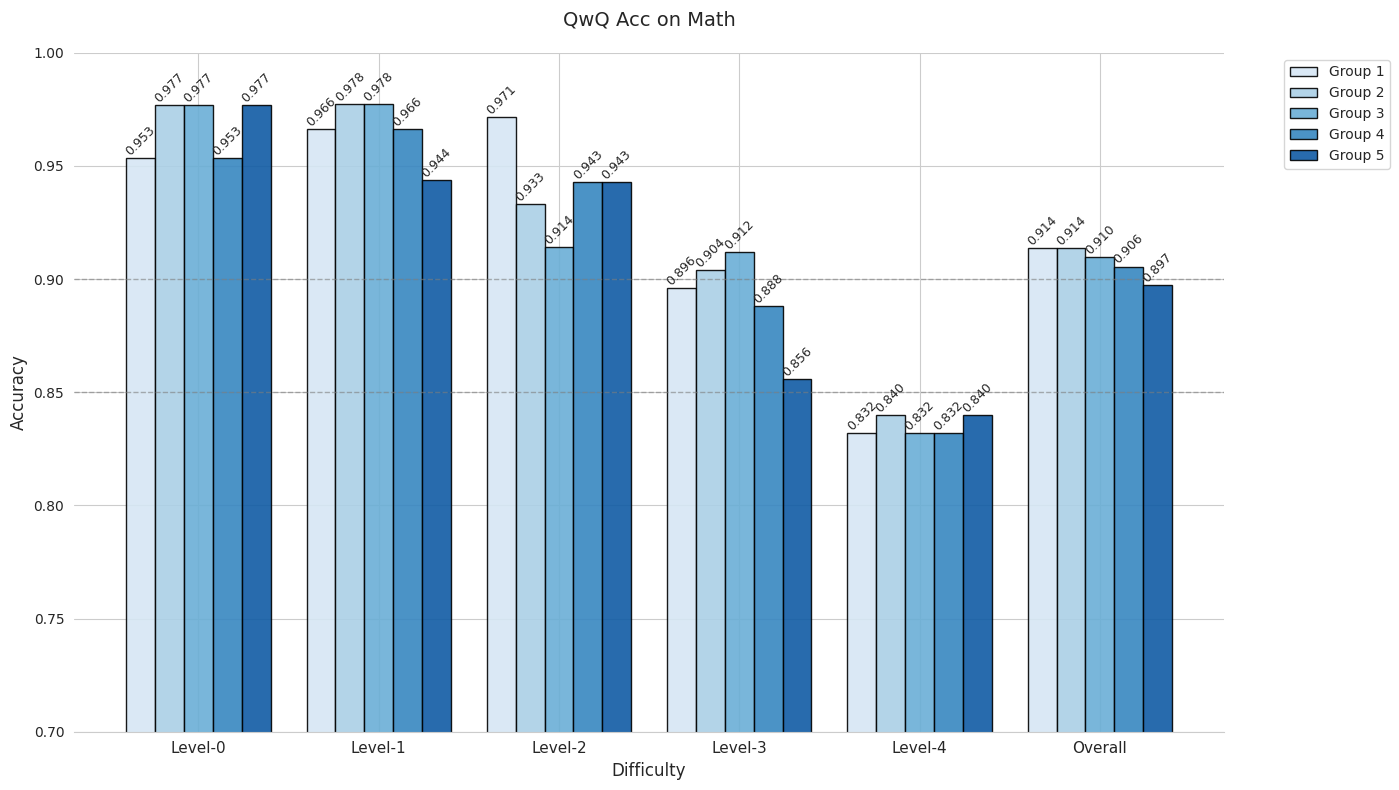

In [61]:
QwQ_math_acc = [{2: 0.9662921348314607, 5: 0.832, 3: 0.9714285714285714, 4: 0.896, 1: 0.9534883720930233, 'overall': 0.9137577002053389}, {2: 0.9775280898876404, 5: 0.84, 3: 0.9333333333333333, 4: 0.904, 1: 0.9767441860465116, 'overall': 0.9137577002053389}, {2: 0.9775280898876404, 5: 0.832, 3: 0.9142857142857143, 4: 0.912, 1: 0.9767441860465116, 'overall': 0.9096509240246407}, {2: 0.9662921348314607, 5: 0.832, 3: 0.9428571428571428, 4: 0.888, 1: 0.9534883720930233, 'overall': 0.9055441478439425}, {2: 0.9438202247191011, 5: 0.84, 3: 0.9428571428571428, 4: 0.856, 1: 0.9767441860465116, 'overall': 0.8973305954825462}]

plot_grouped_comparison(
    QwQ_math_acc,
    group_order=[1, 2, 3, 4, 5, 'overall'],
    group_labels=['Level-0', 'Level-1', 'Level-2', 'Level-3', 'Level-4', 'Overall'],
    color_theme="Blues",
    reference_lines=[0.85, 0.9],
    title="QwQ Acc on Math",
    y_range=[0.7, 1.0],
    y_tick_interval=0.05
)

In [10]:
r1_32b_data = """
Overall Statistics:
epoch: 0, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.011695906432748537,             search from correct to wrong ratio: 0.014336917562724014,             search from init wrong to correct ratio: 0.011695906432748537,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6244444444444445,             len after search: 11169.4
epoch: 1, acc after search: 0.6222222222222222,             search from wrong to correct ratio: 0.04046242774566474,             search from correct to wrong ratio: 0.01444043321299639,             search from init wrong to correct ratio: 0.029239766081871343,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6333333333333333,             len after search: 11588.81111111111
epoch: 2, acc after search: 0.6288888888888889,             search from wrong to correct ratio: 0.023529411764705882,             search from correct to wrong ratio: 0.0035714285714285713,             search from init wrong to correct ratio: 0.023391812865497075,             search from init correct to wrong ratio: 0.0,             coverage: 0.6333333333333333,             len after search: 11982.442222222222
epoch: 3, acc after search: 0.6244444444444445,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007067137809187279,             search from init wrong to correct ratio: 0.023391812865497075,             search from init correct to wrong ratio: 0.007168458781362007,             coverage: 0.6333333333333333,             len after search: 12308.58
epoch: 4, acc after search: 0.6244444444444445,             search from wrong to correct ratio: 0.023668639053254437,             search from correct to wrong ratio: 0.014234875444839857,             search from init wrong to correct ratio: 0.04093567251461988,             search from init correct to wrong ratio: 0.017921146953405017,             coverage: 0.6355555555555555,             len after search: 12662.691111111111
epoch: 5, acc after search: 0.6244444444444445,             search from wrong to correct ratio: 0.023668639053254437,             search from correct to wrong ratio: 0.014234875444839857,             search from init wrong to correct ratio: 0.03508771929824561,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6355555555555555,             len after search: 12977.042222222222
epoch: 6, acc after search: 0.6311111111111111,             search from wrong to correct ratio: 0.023668639053254437,             search from correct to wrong ratio: 0.0035587188612099642,             search from init wrong to correct ratio: 0.05263157894736842,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.64,             len after search: 13330.706666666667
epoch: 7, acc after search: 0.6266666666666667,             search from wrong to correct ratio: 0.006024096385542169,             search from correct to wrong ratio: 0.01056338028169014,             search from init wrong to correct ratio: 0.05263157894736842,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.64,             len after search: 13632.493333333334
epoch: 8, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.02976190476190476,             search from correct to wrong ratio: 0.0035460992907801418,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6444444444444445,             len after search: 13904.551111111112
epoch: 9, acc after search: 0.64,             search from wrong to correct ratio: 0.012195121951219513,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.010752688172043012,             coverage: 0.6466666666666666,             len after search: 14200.608888888888
epoch: 10, acc after search: 0.6377777777777778,             search from wrong to correct ratio: 0.006172839506172839,             search from correct to wrong ratio: 0.006944444444444444,             search from init wrong to correct ratio: 0.05847953216374269,             search from init correct to wrong ratio: 0.007168458781362007,             coverage: 0.6466666666666666,             len after search: 14482.88
epoch: 11, acc after search: 0.6422222222222222,             search from wrong to correct ratio: 0.012269938650306749,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.007168458781362007,             coverage: 0.6466666666666666,             len after search: 14756.275555555556
epoch: 12, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.010380622837370242,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6466666666666666,             len after search: 15055.564444444444
epoch: 13, acc after search: 0.64,             search from wrong to correct ratio: 0.018292682926829267,             search from correct to wrong ratio: 0.0034965034965034965,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.010752688172043012,             coverage: 0.6466666666666666,             len after search: 15396.568888888889
epoch: 14, acc after search: 0.64,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.010752688172043012,             coverage: 0.6466666666666666,             len after search: 15698.473333333333
epoch: 15, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.010416666666666666,             search from init wrong to correct ratio: 0.05847953216374269,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6466666666666666,             len after search: 16043.655555555555
epoch: 16, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.012121212121212121,             search from correct to wrong ratio: 0.007017543859649123,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.017921146953405017,             coverage: 0.6466666666666666,             len after search: 16386.12888888889
epoch: 17, acc after search: 0.6288888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007017543859649123,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6466666666666666,             len after search: 16746.19777777778
epoch: 18, acc after search: 0.6311111111111111,             search from wrong to correct ratio: 0.017964071856287425,             search from correct to wrong ratio: 0.007067137809187279,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6488888888888888,             len after search: 17123.173333333332
epoch: 19, acc after search: 0.6377777777777778,             search from wrong to correct ratio: 0.018072289156626505,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6488888888888888,             len after search: 17508.993333333332
epoch: 20, acc after search: 0.6288888888888889,             search from wrong to correct ratio: 0.006134969325153374,             search from correct to wrong ratio: 0.017421602787456445,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.03225806451612903,             coverage: 0.6511111111111111,             len after search: 17921.068888888887
epoch: 21, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.017964071856287425,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 18353.273333333334
epoch: 22, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.006097560975609756,             search from correct to wrong ratio: 0.006993006993006993,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 18746.784444444445
epoch: 23, acc after search: 0.6311111111111111,             search from wrong to correct ratio: 0.006060606060606061,             search from correct to wrong ratio: 0.007017543859649123,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 19190.748888888887
epoch: 24, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.012048192771084338,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.017921146953405017,             coverage: 0.6511111111111111,             len after search: 19670.933333333334
epoch: 25, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.006097560975609756,             search from correct to wrong ratio: 0.006993006993006993,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 20100.3
epoch: 26, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.006060606060606061,             search from correct to wrong ratio: 0.0035087719298245615,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 20580.137777777778
epoch: 27, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.01818181818181818,             search from correct to wrong ratio: 0.007017543859649123,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 21069.373333333333
epoch: 28, acc after search: 0.6266666666666667,             search from wrong to correct ratio: 0.006097560975609756,             search from correct to wrong ratio: 0.017482517482517484,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.03225806451612903,             coverage: 0.6511111111111111,             len after search: 21590.773333333334
epoch: 29, acc after search: 0.6288888888888889,             search from wrong to correct ratio: 0.023809523809523808,             search from correct to wrong ratio: 0.010638297872340425,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 22194.164444444443
epoch: 30, acc after search: 0.6311111111111111,             search from wrong to correct ratio: 0.011976047904191617,             search from correct to wrong ratio: 0.0035335689045936395,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 22743.30222222222
epoch: 31, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.018072289156626505,             search from correct to wrong ratio: 0.007042253521126761,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 23277.866666666665
epoch: 32, acc after search: 0.6311111111111111,             search from wrong to correct ratio: 0.01818181818181818,             search from correct to wrong ratio: 0.014035087719298246,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 23836.015555555554
epoch: 33, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.024096385542168676,             search from correct to wrong ratio: 0.01056338028169014,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 24394.393333333333
epoch: 34, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.012121212121212121,             search from correct to wrong ratio: 0.007017543859649123,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.025089605734767026,             coverage: 0.6511111111111111,             len after search: 24981.16
epoch: 35, acc after search: 0.6244444444444445,             search from wrong to correct ratio: 0.006060606060606061,             search from correct to wrong ratio: 0.017543859649122806,             search from init wrong to correct ratio: 0.06432748538011696,             search from init correct to wrong ratio: 0.03225806451612903,             coverage: 0.6511111111111111,             len after search: 25611.624444444446
epoch: 36, acc after search: 0.6333333333333333,             search from wrong to correct ratio: 0.023668639053254437,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.6511111111111111,             len after search: 26207.995555555557
epoch: 37, acc after search: 0.6377777777777778,             search from wrong to correct ratio: 0.012121212121212121,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07602339181286549,             search from init correct to wrong ratio: 0.017921146953405017,             coverage: 0.6533333333333333,             len after search: 26885.586666666666
epoch: 38, acc after search: 0.6355555555555555,             search from wrong to correct ratio: 0.012269938650306749,             search from correct to wrong ratio: 0.010452961672473868,             search from init wrong to correct ratio: 0.07017543859649122,             search from init correct to wrong ratio: 0.017921146953405017,             coverage: 0.6555555555555556,             len after search: 27540.004444444443
epoch: 39, acc after search: 0.6422222222222222,             search from wrong to correct ratio: 0.024390243902439025,             search from correct to wrong ratio: 0.0034965034965034965,             search from init wrong to correct ratio: 0.08187134502923976,             search from init correct to wrong ratio: 0.014336917562724014,             coverage: 0.6555555555555556,             len after search: 28138.413333333334
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 7536
epoch: 1, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 7940
epoch: 2, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6555555555555556,                 len after search: 8273
epoch: 3, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 8521
epoch: 4, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.06060606060606061,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6555555555555556,                 len after search: 8834
epoch: 5, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 9214
epoch: 6, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 9563
epoch: 7, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 9860
epoch: 8, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.09375,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 10228
epoch: 9, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6888888888888889,                 len after search: 10590
epoch: 10, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6888888888888889,                 len after search: 10912
epoch: 11, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6888888888888889,                 len after search: 11190
epoch: 12, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016129032258064516,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 11539
epoch: 13, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 12092
epoch: 14, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 12458
epoch: 15, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 12890
epoch: 16, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6888888888888889,                 len after search: 13320
epoch: 17, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016666666666666666,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.05172413793103448,                 coverage: 0.6888888888888889,                 len after search: 13728
epoch: 18, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6888888888888889,                 len after search: 14056
epoch: 19, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 14425
epoch: 20, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 14772
epoch: 21, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 15078
epoch: 22, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03278688524590164,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.05172413793103448,                 coverage: 0.7,                 len after search: 15390
epoch: 23, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 15728
epoch: 24, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 16074
epoch: 25, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 16392
epoch: 26, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 16767
epoch: 27, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 17184
epoch: 28, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.05172413793103448,                 coverage: 0.7,                 len after search: 17621
epoch: 29, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.05172413793103448,                 coverage: 0.7,                 len after search: 18113
epoch: 30, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 18572
epoch: 31, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.06666666666666667,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 19112
epoch: 32, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016129032258064516,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 19545
epoch: 33, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 19982
epoch: 34, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016129032258064516,                 search from init wrong to correct ratio: 0.15625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.7,                 len after search: 20480
epoch: 35, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 20939
epoch: 36, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.7,                 len after search: 21326
epoch: 37, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.7,                 len after search: 21748
epoch: 38, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016129032258064516,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.7,                 len after search: 22132
epoch: 39, acc after search: 0.6888888888888889,                 search from wrong to correct ratio: 0.034482758620689655,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.7,                 len after search: 22507
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 9298
epoch: 1, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0625,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 9725
epoch: 2, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 10120
epoch: 3, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 10406
epoch: 4, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.03389830508474576,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 10766
epoch: 5, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0625,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 11164
epoch: 6, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 11571
epoch: 7, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 11935
epoch: 8, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.016666666666666666,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 12221
epoch: 9, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 12544
epoch: 10, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 12799
epoch: 11, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 13039
epoch: 12, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 13254
epoch: 13, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 13461
epoch: 14, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 13702
epoch: 15, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 13938
epoch: 16, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 14187
epoch: 17, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 14407
epoch: 18, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.016666666666666666,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 14686
epoch: 19, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 15003
epoch: 20, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 15347
epoch: 21, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 15655
epoch: 22, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 15934
epoch: 23, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 16352
epoch: 24, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 16925
epoch: 25, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 17344
epoch: 26, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 17816
epoch: 27, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 18335
epoch: 28, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 18896
epoch: 29, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 19524
epoch: 30, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 20088
epoch: 31, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20640
epoch: 32, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 21270
epoch: 33, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 21865
epoch: 34, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 22418
epoch: 35, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 22937
epoch: 36, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 23507
epoch: 37, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 24117
epoch: 38, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 24708
epoch: 39, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 25186
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6222222222222222,                 len after search: 11009
epoch: 1, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 11495
epoch: 2, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6333333333333333,                 len after search: 11890
epoch: 3, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 12210
epoch: 4, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 12592
epoch: 5, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 12808
epoch: 6, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 13103
epoch: 7, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03508771929824561,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 13482
epoch: 8, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 13742
epoch: 9, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 13972
epoch: 10, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 14321
epoch: 11, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 14669
epoch: 12, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 14968
epoch: 13, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 15232
epoch: 14, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 15486
epoch: 15, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 15820
epoch: 16, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 16048
epoch: 17, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 16335
epoch: 18, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 16660
epoch: 19, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 16901
epoch: 20, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03508771929824561,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 17151
epoch: 21, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 17418
epoch: 22, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 17763
epoch: 23, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 18046
epoch: 24, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 18392
epoch: 25, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 18688
epoch: 26, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 19022
epoch: 27, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 19347
epoch: 28, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 19753
epoch: 29, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 20190
epoch: 30, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 20645
epoch: 31, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 21080
epoch: 32, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 21552
epoch: 33, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 21986
epoch: 34, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.07142857142857142,                 coverage: 0.6444444444444445,                 len after search: 22529
epoch: 35, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018518518518518517,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.08928571428571429,                 coverage: 0.6444444444444445,                 len after search: 23108
epoch: 36, acc after search: 0.6,                 search from wrong to correct ratio: 0.02702702702702703,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.07142857142857142,                 coverage: 0.6444444444444445,                 len after search: 23723
epoch: 37, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.027777777777777776,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08823529411764706,                 search from init correct to wrong ratio: 0.07142857142857142,                 coverage: 0.6555555555555556,                 len after search: 24293
epoch: 38, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6555555555555556,                 len after search: 24945
epoch: 39, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08823529411764706,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6555555555555556,                 len after search: 25440
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6222222222222222,                 len after search: 12529
epoch: 1, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 12886
epoch: 2, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6333333333333333,                 len after search: 13298
epoch: 3, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6333333333333333,                 len after search: 13677
epoch: 4, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03508771929824561,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6333333333333333,                 len after search: 14077
epoch: 5, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.03636363636363636,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 14412
epoch: 6, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 14774
epoch: 7, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 15040
epoch: 8, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 15240
epoch: 9, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 15540
epoch: 10, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 15889
epoch: 11, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 16206
epoch: 12, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6333333333333333,                 len after search: 16615
epoch: 13, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.05555555555555555,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 17041
epoch: 14, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 17497
epoch: 15, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 18033
epoch: 16, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 18561
epoch: 17, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6333333333333333,                 len after search: 19024
epoch: 18, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 19549
epoch: 19, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 20104
epoch: 20, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 20762
epoch: 21, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 21493
epoch: 22, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 21975
epoch: 23, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 22518
epoch: 24, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 23011
epoch: 25, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 23547
epoch: 26, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24076
epoch: 27, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24525
epoch: 28, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24926
epoch: 29, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 25575
epoch: 30, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 26176
epoch: 31, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 26700
epoch: 32, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 27137
epoch: 33, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 27678
epoch: 34, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 28122
epoch: 35, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 28749
epoch: 36, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 29293
epoch: 37, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 30033
epoch: 38, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 30692
epoch: 39, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 31381
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0196078431372549,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5666666666666667,                 len after search: 15473
epoch: 1, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.05,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 15895
epoch: 2, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 16328
epoch: 3, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 16727
epoch: 4, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 17042
epoch: 5, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 17285
epoch: 6, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 17640
epoch: 7, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 17843
epoch: 8, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 18090
epoch: 9, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 18355
epoch: 10, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 18490
epoch: 11, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 18675
epoch: 12, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 18899
epoch: 13, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 19155
epoch: 14, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 19346
epoch: 15, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 19536
epoch: 16, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 19811
epoch: 17, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 20235
epoch: 18, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 20662
epoch: 19, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 21110
epoch: 20, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 21571
epoch: 21, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 22119
epoch: 22, acc after search: 0.5777777777777777,                 search from wro|ng to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 22669
epoch: 23, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 23308
epoch: 24, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 23952
epoch: 25, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 24527
epoch: 26, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 25217
epoch: 27, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0196078431372549,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 25953
epoch: 28, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0196078431372549,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 26755
epoch: 29, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 27566
epoch: 30, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 28232
epoch: 31, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 28854
epoch: 32, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0392156862745098,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 29674
epoch: 33, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.05,                 search from correct to wrong ratio: 0.02,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 30458
epoch: 34, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 31354
epoch: 35, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.038461538461538464,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0392156862745098,                 coverage: 0.5888888888888889,                 len after search: 32323
epoch: 36, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.05,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 33189
epoch: 37, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05128205128205128,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.5888888888888889,                 len after search: 34235
epoch: 38, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07692307692307693,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.6,                 len after search: 35220
epoch: 39, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07692307692307693,                 search from init correct to wrong ratio: 0.0196078431372549,                 coverage: 0.6,                 len after search: 36175
--------------------------------------------------
"""

In [5]:
qwq_data = """
Overall Statistics:
epoch: 0, acc after search: 0.38666666666666666,             search from wrong to correct ratio: 0.007220216606498195,             search from correct to wrong ratio: 0.005780346820809248,             search from init wrong to correct ratio: 0.007220216606498195,             search from init correct to wrong ratio: 0.005780346820809248,             coverage: 0.3888888888888889,             len after search: 9490.84888888889
epoch: 1, acc after search: 0.38,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.017241379310344827,             search from init wrong to correct ratio: 0.007220216606498195,             search from init correct to wrong ratio: 0.023121387283236993,             coverage: 0.3888888888888889,             len after search: 9928.886666666667
epoch: 2, acc after search: 0.3711111111111111,             search from wrong to correct ratio: 0.0035842293906810036,             search from correct to wrong ratio: 0.029239766081871343,             search from init wrong to correct ratio: 0.010830324909747292,             search from init correct to wrong ratio: 0.05202312138728324,             coverage: 0.39111111111111113,             len after search: 10423.213333333333
epoch: 3, acc after search: 0.3622222222222222,             search from wrong to correct ratio: 0.014134275618374558,             search from correct to wrong ratio: 0.04790419161676647,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.09248554913294797,             coverage: 0.3977777777777778,             len after search: 10928.977777777778
epoch: 4, acc after search: 0.3622222222222222,             search from wrong to correct ratio: 0.013937282229965157,             search from correct to wrong ratio: 0.024539877300613498,             search from init wrong to correct ratio: 0.02527075812274368,             search from init correct to wrong ratio: 0.09826589595375723,             coverage: 0.4,             len after search: 11537.722222222223
epoch: 5, acc after search: 0.36444444444444446,             search from wrong to correct ratio: 0.010452961672473868,             search from correct to wrong ratio: 0.012269938650306749,             search from init wrong to correct ratio: 0.02527075812274368,             search from init correct to wrong ratio: 0.09248554913294797,             coverage: 0.4,             len after search: 12134.982222222223
epoch: 6, acc after search: 0.35333333333333333,             search from wrong to correct ratio: 0.006993006993006993,             search from correct to wrong ratio: 0.042682926829268296,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.11560693641618497,             coverage: 0.4022222222222222,             len after search: 12820.02
epoch: 7, acc after search: 0.3377777777777778,             search from wrong to correct ratio: 0.003436426116838488,             search from correct to wrong ratio: 0.050314465408805034,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.15606936416184972,             coverage: 0.4022222222222222,             len after search: 13571.975555555555
epoch: 8, acc after search: 0.32222222222222224,             search from wrong to correct ratio: 0.006711409395973154,             search from correct to wrong ratio: 0.05921052631578947,             search from init wrong to correct ratio: 0.018050541516245487,             search from init correct to wrong ratio: 0.1907514450867052,             coverage: 0.4022222222222222,             len after search: 14232.337777777779
epoch: 9, acc after search: 0.31555555555555553,             search from wrong to correct ratio: 0.006557377049180328,             search from correct to wrong ratio: 0.034482758620689655,             search from init wrong to correct ratio: 0.018050541516245487,             search from init correct to wrong ratio: 0.20809248554913296,             coverage: 0.40444444444444444,             len after search: 15129.83111111111
epoch: 10, acc after search: 0.30666666666666664,             search from wrong to correct ratio: 0.012987012987012988,             search from correct to wrong ratio: 0.056338028169014086,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.23699421965317918,             coverage: 0.4066666666666667,             len after search: 16095.597777777777
epoch: 11, acc after search: 0.2822222222222222,             search from wrong to correct ratio: 0.009615384615384616,             search from correct to wrong ratio: 0.10144927536231885,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.30057803468208094,             coverage: 0.4066666666666667,             len after search: 16993.83777777778
epoch: 12, acc after search: 0.2688888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.047244094488188976,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.3352601156069364,             coverage: 0.4066666666666667,             len after search: 17925.173333333332
epoch: 13, acc after search: 0.26,             search from wrong to correct ratio: 0.0060790273556231,             search from correct to wrong ratio: 0.049586776859504134,             search from init wrong to correct ratio: 0.02527075812274368,             search from init correct to wrong ratio: 0.36416184971098264,             coverage: 0.4066666666666667,             len after search: 18801.644444444446
epoch: 14, acc after search: 0.24666666666666667,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.05128205128205128,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.3930635838150289,             coverage: 0.4066666666666667,             len after search: 19784.85111111111
epoch: 15, acc after search: 0.23555555555555555,             search from wrong to correct ratio: 0.0058997050147492625,             search from correct to wrong ratio: 0.06306306306306306,             search from init wrong to correct ratio: 0.018050541516245487,             search from init correct to wrong ratio: 0.4161849710982659,             coverage: 0.4066666666666667,             len after search: 20588.562222222223
epoch: 16, acc after search: 0.22666666666666666,             search from wrong to correct ratio: 0.005813953488372093,             search from correct to wrong ratio: 0.05660377358490566,             search from init wrong to correct ratio: 0.018050541516245487,             search from init correct to wrong ratio: 0.4393063583815029,             coverage: 0.4066666666666667,             len after search: 21536.58
epoch: 17, acc after search: 0.2288888888888889,             search from wrong to correct ratio: 0.008620689655172414,             search from correct to wrong ratio: 0.0196078431372549,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.4393063583815029,             coverage: 0.4066666666666667,             len after search: 22342.88888888889
epoch: 18, acc after search: 0.21777777777777776,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.04854368932038835,             search from init wrong to correct ratio: 0.021660649819494584,             search from init correct to wrong ratio: 0.4682080924855491,             coverage: 0.4066666666666667,             len after search: 23168.393333333333
epoch: 19, acc after search: 0.21777777777777776,             search from wrong to correct ratio: 0.002840909090909091,             search from correct to wrong ratio: 0.01020408163265306,             search from init wrong to correct ratio: 0.018050541516245487,             search from init correct to wrong ratio: 0.4624277456647399,             coverage: 0.4066666666666667,             len after search: 23905.773333333334
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.43333333333333335,                 search from wrong to correct ratio: 0.019230769230769232,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.43333333333333335,                 len after search: 4963
epoch: 1, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05128205128205128,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.05263157894736842,                 coverage: 0.43333333333333335,                 len after search: 5503
epoch: 2, acc after search: 0.4,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02702702702702703,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.07894736842105263,                 coverage: 0.43333333333333335,                 len after search: 6071
epoch: 3, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.037037037037037035,                 search from correct to wrong ratio: 0.027777777777777776,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.07894736842105263,                 coverage: 0.4444444444444444,                 len after search: 6580
epoch: 4, acc after search: 0.4,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02702702702702703,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.10526315789473684,                 coverage: 0.4444444444444444,                 len after search: 7214
epoch: 5, acc after search: 0.3888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.027777777777777776,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.13157894736842105,                 coverage: 0.4444444444444444,                 len after search: 7815
epoch: 6, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02857142857142857,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.15789473684210525,                 coverage: 0.4444444444444444,                 len after search: 8392
epoch: 7, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08823529411764706,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.23684210526315788,                 coverage: 0.4444444444444444,                 len after search: 9005
epoch: 8, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.21052631578947367,                 coverage: 0.4444444444444444,                 len after search: 9492
epoch: 9, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.21052631578947367,                 coverage: 0.4444444444444444,                 len after search: 10268
epoch: 10, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0625,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.2631578947368421,                 coverage: 0.4444444444444444,                 len after search: 11296
epoch: 11, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.2631578947368421,                 coverage: 0.4444444444444444,                 len after search: 12134
epoch: 12, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.06666666666666667,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.3157894736842105,                 coverage: 0.4444444444444444,                 len after search: 13079
epoch: 13, acc after search: 0.3,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.34210526315789475,                 coverage: 0.4444444444444444,                 len after search: 14114
epoch: 14, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07407407407407407,                 search from init wrong to correct ratio: 0.038461538461538464,                 search from init correct to wrong ratio: 0.39473684210526316,                 coverage: 0.4444444444444444,                 len after search: 15218
epoch: 15, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.12,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.4473684210526316,                 coverage: 0.4444444444444444,                 len after search: 16294
epoch: 16, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09090909090909091,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.5,                 coverage: 0.4444444444444444,                 len after search: 17599
epoch: 17, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.014285714285714285,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.5,                 coverage: 0.4444444444444444,                 len after search: 18617
epoch: 18, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.1,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.5526315789473685,                 coverage: 0.4444444444444444,                 len after search: 19825
epoch: 19, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.019230769230769232,                 search from init correct to wrong ratio: 0.5526315789473685,                 coverage: 0.4444444444444444,                 len after search: 20936
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 6399
epoch: 1, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 6743
epoch: 2, acc after search: 0.43333333333333335,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.025,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.025,                 coverage: 0.4444444444444444,                 len after search: 7105
epoch: 3, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05128205128205128,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.075,                 coverage: 0.4444444444444444,                 len after search: 7513
epoch: 4, acc after search: 0.4222222222222222,                 search from wrong to correct ratio: 0.018867924528301886,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.05,                 coverage: 0.4444444444444444,                 len after search: 7999
epoch: 5, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02631578947368421,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.075,                 coverage: 0.4444444444444444,                 len after search: 8417
epoch: 6, acc after search: 0.43333333333333335,                 search from wrong to correct ratio: 0.03773584905660377,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.05,                 coverage: 0.45555555555555555,                 len after search: 8895
epoch: 7, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05128205128205128,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.1,                 coverage: 0.45555555555555555,                 len after search: 9692
epoch: 8, acc after search: 0.4111111111111111,                 search from wrong to correct ratio: 0.018867924528301886,                 search from correct to wrong ratio: 0.02702702702702703,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.1,                 coverage: 0.45555555555555555,                 len after search: 10397
epoch: 9, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08108108108108109,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.175,                 coverage: 0.45555555555555555,                 len after search: 11464
epoch: 10, acc after search: 0.36666666666666664,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.029411764705882353,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.2,                 coverage: 0.45555555555555555,                 len after search: 12585
epoch: 11, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.017543859649122806,                 search from correct to wrong ratio: 0.09090909090909091,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.25,                 coverage: 0.45555555555555555,                 len after search: 13574
epoch: 12, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.275,                 coverage: 0.45555555555555555,                 len after search: 14557
epoch: 13, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.3,                 coverage: 0.45555555555555555,                 len after search: 15313
epoch: 14, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.10344827586206896,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.375,                 coverage: 0.45555555555555555,                 len after search: 16522
epoch: 15, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.038461538461538464,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.375,                 coverage: 0.45555555555555555,                 len after search: 17401
epoch: 16, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07692307692307693,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.45555555555555555,                 len after search: 18563
epoch: 17, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.45555555555555555,                 len after search: 19431
epoch: 18, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.02,                 search from init correct to wrong ratio: 0.425,                 coverage: 0.45555555555555555,                 len after search: 20347
epoch: 19, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.45555555555555555,                 len after search: 21322
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.37777777777777777,                 len after search: 8703
epoch: 1, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.37777777777777777,                 len after search: 9256
epoch: 2, acc after search: 0.36666666666666664,                 search from wrong to correct ratio: 0.017857142857142856,                 search from correct to wrong ratio: 0.058823529411764705,                 search from init wrong to correct ratio: 0.017857142857142856,                 search from init correct to wrong ratio: 0.058823529411764705,                 coverage: 0.3888888888888889,                 len after search: 9875
epoch: 3, acc after search: 0.36666666666666664,                 search from wrong to correct ratio: 0.017543859649122806,                 search from correct to wrong ratio: 0.030303030303030304,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.08823529411764706,                 coverage: 0.4,                 len after search: 10492
epoch: 4, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.017543859649122806,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.058823529411764705,                 coverage: 0.4,                 len after search: 11123
epoch: 5, acc after search: 0.3888888888888889,                 search from wrong to correct ratio: 0.017857142857142856,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.029411764705882353,                 coverage: 0.4,                 len after search: 11770
epoch: 6, acc after search: 0.37777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02857142857142857,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.058823529411764705,                 coverage: 0.4,                 len after search: 12512
epoch: 7, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.017857142857142856,                 search from correct to wrong ratio: 0.08823529411764706,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.11764705882352941,                 coverage: 0.4,                 len after search: 13253
epoch: 8, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.125,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.23529411764705882,                 coverage: 0.4,                 len after search: 13855
epoch: 9, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.20588235294117646,                 coverage: 0.4111111111111111,                 len after search: 14744
epoch: 10, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.03278688524590164,                 search from correct to wrong ratio: 0.06896551724137931,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.20588235294117646,                 coverage: 0.4111111111111111,                 len after search: 15665
epoch: 11, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.06896551724137931,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.2647058823529412,                 coverage: 0.4111111111111111,                 len after search: 16566
epoch: 12, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.29411764705882354,                 coverage: 0.4111111111111111,                 len after search: 17586
epoch: 13, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.07692307692307693,                 search from init wrong to correct ratio: 0.05357142857142857,                 search from init correct to wrong ratio: 0.35294117647058826,                 coverage: 0.4111111111111111,                 len after search: 18645
epoch: 14, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.35294117647058826,                 coverage: 0.4111111111111111,                 len after search: 19576
epoch: 15, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.03571428571428571,                 search from init correct to wrong ratio: 0.38235294117647056,                 coverage: 0.4111111111111111,                 len after search: 20364
epoch: 16, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.05357142857142857,                 search from init correct to wrong ratio: 0.4117647058823529,                 coverage: 0.4111111111111111,                 len after search: 21124
epoch: 17, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05357142857142857,                 search from init correct to wrong ratio: 0.4117647058823529,                 coverage: 0.4111111111111111,                 len after search: 22100
epoch: 18, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05357142857142857,                 search from init correct to wrong ratio: 0.4117647058823529,                 coverage: 0.4111111111111111,                 len after search: 22736
epoch: 19, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05357142857142857,                 search from init correct to wrong ratio: 0.4117647058823529,                 coverage: 0.4111111111111111,                 len after search: 23496
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.03333333333333333,                 coverage: 0.34444444444444444,                 len after search: 11494
epoch: 1, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.03333333333333333,                 coverage: 0.34444444444444444,                 len after search: 11866
epoch: 2, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.03333333333333333,                 coverage: 0.34444444444444444,                 len after search: 12295
epoch: 3, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.06666666666666667,                 search from init wrong to correct ratio: 0.03333333333333333,                 search from init correct to wrong ratio: 0.1,                 coverage: 0.35555555555555557,                 len after search: 12912
epoch: 4, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03333333333333333,                 search from init correct to wrong ratio: 0.06666666666666667,                 coverage: 0.35555555555555557,                 len after search: 13532
epoch: 5, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03333333333333333,                 search from init correct to wrong ratio: 0.03333333333333333,                 coverage: 0.35555555555555557,                 len after search: 14103
epoch: 6, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0967741935483871,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.1,                 coverage: 0.35555555555555557,                 len after search: 14817
epoch: 7, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.1,                 coverage: 0.35555555555555557,                 len after search: 15631
epoch: 8, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.10714285714285714,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.16666666666666666,                 coverage: 0.35555555555555557,                 len after search: 16475
epoch: 9, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.16666666666666666,                 coverage: 0.35555555555555557,                 len after search: 17490
epoch: 10, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.03076923076923077,                 search from correct to wrong ratio: 0.08,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.2,                 coverage: 0.36666666666666664,                 len after search: 18384
epoch: 11, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.03076923076923077,                 search from correct to wrong ratio: 0.12,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.23333333333333334,                 coverage: 0.36666666666666664,                 len after search: 19074
epoch: 12, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08333333333333333,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.3,                 coverage: 0.36666666666666664,                 len after search: 19984
epoch: 13, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.3333333333333333,                 coverage: 0.36666666666666664,                 len after search: 20710
epoch: 14, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.3333333333333333,                 coverage: 0.36666666666666664,                 len after search: 21486
epoch: 15, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09523809523809523,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.36666666666666664,                 len after search: 22262
epoch: 16, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.014084507042253521,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.36666666666666664,                 len after search: 23256
epoch: 17, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.014084507042253521,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.4,                 coverage: 0.36666666666666664,                 len after search: 24081
epoch: 18, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.43333333333333335,                 coverage: 0.36666666666666664,                 len after search: 24890
epoch: 19, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016666666666666666,                 search from init correct to wrong ratio: 0.43333333333333335,                 coverage: 0.36666666666666664,                 len after search: 25434
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 15893
epoch: 1, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03225806451612903,                 coverage: 0.34444444444444444,                 len after search: 16274
epoch: 2, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06451612903225806,                 coverage: 0.34444444444444444,                 len after search: 16768
epoch: 3, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.06896551724137931,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.12903225806451613,                 coverage: 0.34444444444444444,                 len after search: 17145
epoch: 4, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.1111111111111111,                 search from init wrong to correct ratio: 0.01694915254237288,                 search from init correct to wrong ratio: 0.22580645161290322,                 coverage: 0.35555555555555557,                 len after search: 17818
epoch: 5, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.015384615384615385,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01694915254237288,                 search from init correct to wrong ratio: 0.1935483870967742,                 coverage: 0.35555555555555557,                 len after search: 18568
epoch: 6, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07692307692307693,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.22580645161290322,                 coverage: 0.35555555555555557,                 len after search: 19481
epoch: 7, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.22580645161290322,                 coverage: 0.35555555555555557,                 len after search: 20277
epoch: 8, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25806451612903225,                 coverage: 0.35555555555555557,                 len after search: 20941
epoch: 9, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2903225806451613,                 coverage: 0.35555555555555557,                 len after search: 21680
epoch: 10, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.3225806451612903,                 coverage: 0.35555555555555557,                 len after search: 22545
epoch: 11, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.2857142857142857,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 23619
epoch: 12, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 24418
epoch: 13, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 25224
epoch: 14, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 26119
epoch: 15, acc after search: 0.17777777777777778,                 search from wrong to correct ratio: 0.013333333333333334,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.4838709677419355,                 coverage: 0.35555555555555557,                 len after search: 26620
epoch: 16, acc after search: 0.17777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.4838709677419355,                 coverage: 0.35555555555555557,                 len after search: 27139
epoch: 17, acc after search: 0.17777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.4838709677419355,                 coverage: 0.35555555555555557,                 len after search: 27482
epoch: 18, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0625,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 28041
epoch: 19, acc after search: 0.16666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.5161290322580645,                 coverage: 0.35555555555555557,                 len after search: 28338
--------------------------------------------------
"""

In [6]:
r1_14b_data = """
Overall Statistics:
epoch: 0, acc after search: 0.5933333333333334,             search from wrong to correct ratio: 0.01639344262295082,             search from correct to wrong ratio: 0.011235955056179775,             search from init wrong to correct ratio: 0.01639344262295082,             search from init correct to wrong ratio: 0.011235955056179775,             coverage: 0.6,             len after search: 12654.873333333333
epoch: 1, acc after search: 0.5911111111111111,             search from wrong to correct ratio: 0.01639344262295082,             search from correct to wrong ratio: 0.0149812734082397,             search from init wrong to correct ratio: 0.0273224043715847,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6044444444444445,             len after search: 13088.815555555555
epoch: 2, acc after search: 0.5933333333333334,             search from wrong to correct ratio: 0.016304347826086956,             search from correct to wrong ratio: 0.007518796992481203,             search from init wrong to correct ratio: 0.03278688524590164,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6066666666666667,             len after search: 13563.813333333334
epoch: 3, acc after search: 0.5933333333333334,             search from wrong to correct ratio: 0.02185792349726776,             search from correct to wrong ratio: 0.0149812734082397,             search from init wrong to correct ratio: 0.03825136612021858,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6088888888888889,             len after search: 13945.924444444445
epoch: 4, acc after search: 0.6022222222222222,             search from wrong to correct ratio: 0.02185792349726776,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0546448087431694,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6155555555555555,             len after search: 14304.166666666666
epoch: 5, acc after search: 0.6066666666666667,             search from wrong to correct ratio: 0.01675977653631285,             search from correct to wrong ratio: 0.0036900369003690036,             search from init wrong to correct ratio: 0.06557377049180328,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.62,             len after search: 14654.777777777777
epoch: 6, acc after search: 0.6022222222222222,             search from wrong to correct ratio: 0.005649717514124294,             search from correct to wrong ratio: 0.01098901098901099,             search from init wrong to correct ratio: 0.060109289617486336,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.62,             len after search: 15031.302222222223
epoch: 7, acc after search: 0.6,             search from wrong to correct ratio: 0.0223463687150838,             search from correct to wrong ratio: 0.01845018450184502,             search from init wrong to correct ratio: 0.0546448087431694,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.62,             len after search: 15442.708888888888
epoch: 8, acc after search: 0.6066666666666667,             search from wrong to correct ratio: 0.022222222222222223,             search from correct to wrong ratio: 0.003703703703703704,             search from init wrong to correct ratio: 0.07103825136612021,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6244444444444445,             len after search: 15779.415555555555
epoch: 9, acc after search: 0.6111111111111112,             search from wrong to correct ratio: 0.011299435028248588,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07103825136612021,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6244444444444445,             len after search: 16116.813333333334
epoch: 10, acc after search: 0.6111111111111112,             search from wrong to correct ratio: 0.011428571428571429,             search from correct to wrong ratio: 0.007272727272727273,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6244444444444445,             len after search: 16427.504444444443
epoch: 11, acc after search: 0.6088888888888889,             search from wrong to correct ratio: 0.005714285714285714,             search from correct to wrong ratio: 0.007272727272727273,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6244444444444445,             len after search: 16729.717777777776
epoch: 12, acc after search: 0.6088888888888889,             search from wrong to correct ratio: 0.011363636363636364,             search from correct to wrong ratio: 0.0072992700729927005,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6244444444444445,             len after search: 17032.773333333334
epoch: 13, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.017045454545454544,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6266666666666667,             len after search: 17353.306666666667
epoch: 14, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.005780346820809248,             search from correct to wrong ratio: 0.007220216606498195,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6266666666666667,             len after search: 17655.702222222222
epoch: 15, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.005747126436781609,             search from correct to wrong ratio: 0.0036231884057971015,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6266666666666667,             len after search: 17951.582222222223
epoch: 16, acc after search: 0.6088888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007246376811594203,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6266666666666667,             len after search: 18230.082222222223
epoch: 17, acc after search: 0.6088888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.026217228464419477,             coverage: 0.6266666666666667,             len after search: 18467.47333333333
epoch: 18, acc after search: 0.6177777777777778,             search from wrong to correct ratio: 0.028409090909090908,             search from correct to wrong ratio: 0.0036496350364963502,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6266666666666667,             len after search: 18759.044444444444
epoch: 19, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007194244604316547,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6266666666666667,             len after search: 19062.077777777777
epoch: 20, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.011494252873563218,             search from correct to wrong ratio: 0.0036231884057971015,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6266666666666667,             len after search: 19361.68
epoch: 21, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.005780346820809248,             search from correct to wrong ratio: 0.0036101083032490976,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6266666666666667,             len after search: 19654.633333333335
epoch: 22, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.005780346820809248,             search from correct to wrong ratio: 0.0036101083032490976,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6266666666666667,             len after search: 19995.586666666666
epoch: 23, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.005780346820809248,             search from correct to wrong ratio: 0.007220216606498195,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6266666666666667,             len after search: 20327.38
epoch: 24, acc after search: 0.6111111111111112,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0036231884057971015,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6266666666666667,             len after search: 20653.557777777776
epoch: 25, acc after search: 0.6177777777777778,             search from wrong to correct ratio: 0.017142857142857144,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6288888888888889,             len after search: 20961.144444444446
epoch: 26, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0035971223021582736,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6288888888888889,             len after search: 21323.222222222223
epoch: 27, acc after search: 0.6155555555555555,             search from wrong to correct ratio: 0.011560693641618497,             search from correct to wrong ratio: 0.007220216606498195,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6311111111111111,             len after search: 21698.35777777778
epoch: 28, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.011560693641618497,             search from correct to wrong ratio: 0.010830324909747292,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6311111111111111,             len after search: 22063.533333333333
epoch: 29, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.005747126436781609,             search from correct to wrong ratio: 0.0036231884057971015,             search from init wrong to correct ratio: 0.07650273224043716,             search from init correct to wrong ratio: 0.018726591760299626,             coverage: 0.6311111111111111,             len after search: 22419.8
epoch: 30, acc after search: 0.6133333333333333,             search from wrong to correct ratio: 0.005747126436781609,             search from correct to wrong ratio: 0.0036231884057971015,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.02247191011235955,             coverage: 0.6311111111111111,             len after search: 22785.37777777778
epoch: 31, acc after search: 0.6177777777777778,             search from wrong to correct ratio: 0.011494252873563218,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08196721311475409,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6311111111111111,             len after search: 23164.22
epoch: 32, acc after search: 0.62,             search from wrong to correct ratio: 0.005813953488372093,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 23545.133333333335
epoch: 33, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 23924.82888888889
epoch: 34, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 24271.235555555555
epoch: 35, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 24682.557777777776
epoch: 36, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 25114.235555555555
epoch: 37, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 25555.30888888889
epoch: 38, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 25991.306666666667
epoch: 39, acc after search: 0.62,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08743169398907104,             search from init correct to wrong ratio: 0.0149812734082397,             coverage: 0.6333333333333333,             len after search: 26453.206666666665
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6444444444444445,                 len after search: 8576
epoch: 1, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6444444444444445,                 len after search: 9020
epoch: 2, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 9435
epoch: 3, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 9822
epoch: 4, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 10173
epoch: 5, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 10503
epoch: 6, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6555555555555556,                 len after search: 10966
epoch: 7, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6555555555555556,                 len after search: 11492
epoch: 8, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 11785
epoch: 9, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 12099
epoch: 10, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 12394
epoch: 11, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 12682
epoch: 12, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 12965
epoch: 13, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 13284
epoch: 14, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 13655
epoch: 15, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 13919
epoch: 16, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 14145
epoch: 17, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 14370
epoch: 18, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 14697
epoch: 19, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 15028
epoch: 20, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 15442
epoch: 21, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 15783
epoch: 22, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 16205
epoch: 23, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6666666666666666,                 len after search: 16640
epoch: 24, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6666666666666666,                 len after search: 17067
epoch: 25, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6777777777777778,                 len after search: 17380
epoch: 26, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.016666666666666666,                 search from init wrong to correct ratio: 0.09375,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6777777777777778,                 len after search: 17715
epoch: 27, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6888888888888889,                 len after search: 18040
epoch: 28, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 18455
epoch: 29, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6888888888888889,                 len after search: 18807
epoch: 30, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.034482758620689655,                 coverage: 0.6888888888888889,                 len after search: 19138
epoch: 31, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 19358
epoch: 32, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 19607
epoch: 33, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 19890
epoch: 34, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 20194
epoch: 35, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 20633
epoch: 36, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 20974
epoch: 37, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 21267
epoch: 38, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 21650
epoch: 39, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.125,                 search from init correct to wrong ratio: 0.017241379310344827,                 coverage: 0.6888888888888889,                 len after search: 21970
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6111111111111112,                 len after search: 10553
epoch: 1, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.027777777777777776,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02857142857142857,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6222222222222222,                 len after search: 10981
epoch: 2, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.02857142857142857,                 search from init correct to wrong ratio: 0.03636363636363636,                 coverage: 0.6222222222222222,                 len after search: 11484
epoch: 3, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.05555555555555555,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02857142857142857,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6222222222222222,                 len after search: 11834
epoch: 4, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6333333333333333,                 len after search: 12187
epoch: 5, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 12569
epoch: 6, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6444444444444445,                 len after search: 12942
epoch: 7, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 13311
epoch: 8, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 13628
epoch: 9, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 13988
epoch: 10, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6444444444444445,                 len after search: 14298
epoch: 11, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6444444444444445,                 len after search: 14603
epoch: 12, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 14971
epoch: 13, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 15266
epoch: 14, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 15583
epoch: 15, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 15955
epoch: 16, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 16258
epoch: 17, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 16508
epoch: 18, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 16741
epoch: 19, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 17053
epoch: 20, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 17336
epoch: 21, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 17558
epoch: 22, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 17868
epoch: 23, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 18123
epoch: 24, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 18340
epoch: 25, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 18521
epoch: 26, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 18791
epoch: 27, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.08571428571428572,                 search from init correct to wrong ratio: 0.01818181818181818,                 coverage: 0.6444444444444445,                 len after search: 19040
epoch: 28, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 19242
epoch: 29, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 19420
epoch: 30, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 19680
epoch: 31, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 20014
epoch: 32, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 20276
epoch: 33, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 20649
epoch: 34, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 20923
epoch: 35, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 21148
epoch: 36, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 21408
epoch: 37, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 21736
epoch: 38, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 22062
epoch: 39, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05714285714285714,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 22390
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6222222222222222,                 len after search: 12213
epoch: 1, acc after search: 0.6,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.03636363636363636,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6222222222222222,                 len after search: 12695
epoch: 2, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.05555555555555555,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6222222222222222,                 len after search: 13256
epoch: 3, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6333333333333333,                 len after search: 13671
epoch: 4, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 14089
epoch: 5, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 14558
epoch: 6, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 14992
epoch: 7, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 15406
epoch: 8, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 15825
epoch: 9, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 16135
epoch: 10, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 16465
epoch: 11, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 16815
epoch: 12, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6444444444444445,                 len after search: 17208
epoch: 13, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.05714285714285714,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 17531
epoch: 14, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.03508771929824561,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 17854
epoch: 15, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 18153
epoch: 16, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017857142857142856,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 18437
epoch: 17, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 18713
epoch: 18, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.08571428571428572,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 19068
epoch: 19, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 19367
epoch: 20, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 19566
epoch: 21, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 19861
epoch: 22, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 20209
epoch: 23, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03508771929824561,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 20602
epoch: 24, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.6444444444444445,                 len after search: 20988
epoch: 25, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.02857142857142857,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 21337
epoch: 26, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 21778
epoch: 27, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 22207
epoch: 28, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017543859649122806,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 22647
epoch: 29, acc after search: 0.6222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 23060
epoch: 30, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 23379
epoch: 31, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 23709
epoch: 32, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24110
epoch: 33, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24463
epoch: 34, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 24827
epoch: 35, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 25213
epoch: 36, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 25681
epoch: 37, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 26134
epoch: 38, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 26462
epoch: 39, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 26910
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.5444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5444444444444444,                 len after search: 14283
epoch: 1, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.024390243902439025,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.024390243902439025,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5555555555555556,                 len after search: 14717
epoch: 2, acc after search: 0.5444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02,                 search from init wrong to correct ratio: 0.024390243902439025,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5555555555555556,                 len after search: 15273
epoch: 3, acc after search: 0.5333333333333333,                 search from wrong to correct ratio: 0.024390243902439025,                 search from correct to wrong ratio: 0.04081632653061224,                 search from init wrong to correct ratio: 0.024390243902439025,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5555555555555556,                 len after search: 15774
epoch: 4, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.047619047619047616,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.04878048780487805,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5666666666666667,                 len after search: 16114
epoch: 5, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.04878048780487805,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5666666666666667,                 len after search: 16379
epoch: 6, acc after search: 0.5444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02,                 search from init wrong to correct ratio: 0.024390243902439025,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5666666666666667,                 len after search: 16715
epoch: 7, acc after search: 0.5444444444444444,                 search from wrong to correct ratio: 0.024390243902439025,                 search from correct to wrong ratio: 0.02040816326530612,                 search from init wrong to correct ratio: 0.04878048780487805,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5666666666666667,                 len after search: 17126
epoch: 8, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.04878048780487805,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5777777777777777,                 len after search: 17479
epoch: 9, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5777777777777777,                 len after search: 17941
epoch: 10, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5777777777777777,                 len after search: 18302
epoch: 11, acc after search: 0.5444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0392156862745098,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.061224489795918366,                 coverage: 0.5777777777777777,                 len after search: 18669
epoch: 12, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.024390243902439025,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5777777777777777,                 len after search: 18876
epoch: 13, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.025,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 19184
epoch: 14, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 19453
epoch: 15, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 19775
epoch: 16, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 20155
epoch: 17, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 20406
epoch: 18, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 20723
epoch: 19, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 21048
epoch: 20, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0196078431372549,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.061224489795918366,                 coverage: 0.5888888888888889,                 len after search: 21410
epoch: 21, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.061224489795918366,                 coverage: 0.5888888888888889,                 len after search: 21747
epoch: 22, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.025,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 22102
epoch: 23, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 22463
epoch: 24, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 22828
epoch: 25, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 23216
epoch: 26, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 23687
epoch: 27, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 24141
epoch: 28, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 24594
epoch: 29, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 25091
epoch: 30, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 25521
epoch: 31, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 26012
epoch: 32, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 26461
epoch: 33, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 26838
epoch: 34, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 27287
epoch: 35, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 27795
epoch: 36, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 28443
epoch: 37, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 29094
epoch: 38, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 29781
epoch: 39, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.12195121951219512,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.6,                 len after search: 30440
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.07317073170731707,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5777777777777777,                 len after search: 17647
epoch: 1, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.038461538461538464,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5777777777777777,                 len after search: 18029
epoch: 2, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5777777777777777,                 len after search: 18369
epoch: 3, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5777777777777777,                 len after search: 18625
epoch: 4, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5777777777777777,                 len after search: 18954
epoch: 5, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.025,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 19263
epoch: 6, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.04081632653061224,                 coverage: 0.5888888888888889,                 len after search: 19538
epoch: 7, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 19875
epoch: 8, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 20177
epoch: 9, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 20419
epoch: 10, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 20675
epoch: 11, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 20878
epoch: 12, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 21141
epoch: 13, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 21498
epoch: 14, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 21732
epoch: 15, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 21954
epoch: 16, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 22153
epoch: 17, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 22337
epoch: 18, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 22564
epoch: 19, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 22811
epoch: 20, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 23051
epoch: 21, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 23321
epoch: 22, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 23591
epoch: 23, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 23806
epoch: 24, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 24042
epoch: 25, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 24350
epoch: 26, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0975609756097561,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 24642
epoch: 27, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 25061
epoch: 28, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 25377
epoch: 29, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 25717
epoch: 30, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.02040816326530612,                 coverage: 0.5888888888888889,                 len after search: 26206
epoch: 31, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 26726
epoch: 32, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 27270
epoch: 33, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 27781
epoch: 34, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 28123
epoch: 35, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 28621
epoch: 36, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 29063
epoch: 37, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 29542
epoch: 38, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 29999
epoch: 39, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07317073170731707,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 30555
--------------------------------------------------
"""

In [7]:
r1_1_5b_data = """
Overall Statistics:
epoch: 0, acc after search: 0.20222222222222222,             search from wrong to correct ratio: 0.0028011204481792717,             search from correct to wrong ratio: 0.03225806451612903,             search from init wrong to correct ratio: 0.0028011204481792717,             search from init correct to wrong ratio: 0.03225806451612903,             coverage: 0.2088888888888889,             len after search: 16457.433333333334
epoch: 1, acc after search: 0.2088888888888889,             search from wrong to correct ratio: 0.011142061281337047,             search from correct to wrong ratio: 0.01098901098901099,             search from init wrong to correct ratio: 0.008403361344537815,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.21333333333333335,             len after search: 17323.104444444445
epoch: 2, acc after search: 0.21333333333333335,             search from wrong to correct ratio: 0.008426966292134831,             search from correct to wrong ratio: 0.010638297872340425,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.21777777777777776,             len after search: 18116.928888888888
epoch: 3, acc after search: 0.21333333333333335,             search from wrong to correct ratio: 0.005649717514124294,             search from correct to wrong ratio: 0.020833333333333332,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.021505376344086023,             coverage: 0.21777777777777776,             len after search: 18873.362222222222
epoch: 4, acc after search: 0.21555555555555556,             search from wrong to correct ratio: 0.005649717514124294,             search from correct to wrong ratio: 0.010416666666666666,             search from init wrong to correct ratio: 0.0196078431372549,             search from init correct to wrong ratio: 0.03225806451612903,             coverage: 0.2222222222222222,             len after search: 19553.42
epoch: 5, acc after search: 0.21333333333333335,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.010309278350515464,             search from init wrong to correct ratio: 0.0196078431372549,             search from init correct to wrong ratio: 0.043010752688172046,             coverage: 0.2222222222222222,             len after search: 20243.086666666666
epoch: 6, acc after search: 0.2088888888888889,             search from wrong to correct ratio: 0.002824858757062147,             search from correct to wrong ratio: 0.03125,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.053763440860215055,             coverage: 0.22444444444444445,             len after search: 20898.373333333333
epoch: 7, acc after search: 0.2088888888888889,             search from wrong to correct ratio: 0.0028089887640449437,             search from correct to wrong ratio: 0.010638297872340425,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.053763440860215055,             coverage: 0.22444444444444445,             len after search: 21630.96
epoch: 8, acc after search: 0.20666666666666667,             search from wrong to correct ratio: 0.0028089887640449437,             search from correct to wrong ratio: 0.02127659574468085,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.053763440860215055,             coverage: 0.22444444444444445,             len after search: 22283.706666666665
epoch: 9, acc after search: 0.2088888888888889,             search from wrong to correct ratio: 0.0028011204481792717,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.043010752688172046,             coverage: 0.22444444444444445,             len after search: 22967.086666666666
epoch: 10, acc after search: 0.2,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0425531914893617,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.08602150537634409,             coverage: 0.22444444444444445,             len after search: 23645.804444444446
epoch: 11, acc after search: 0.19333333333333333,             search from wrong to correct ratio: 0.002777777777777778,             search from correct to wrong ratio: 0.044444444444444446,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.11827956989247312,             coverage: 0.22444444444444445,             len after search: 24388.782222222224
epoch: 12, acc after search: 0.19333333333333333,             search from wrong to correct ratio: 0.0027548209366391185,             search from correct to wrong ratio: 0.011494252873563218,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.11827956989247312,             coverage: 0.22444444444444445,             len after search: 25097.553333333333
epoch: 13, acc after search: 0.19777777777777777,             search from wrong to correct ratio: 0.011019283746556474,             search from correct to wrong ratio: 0.022988505747126436,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.0967741935483871,             coverage: 0.22666666666666666,             len after search: 25753.248888888887
epoch: 14, acc after search: 0.19555555555555557,             search from wrong to correct ratio: 0.00554016620498615,             search from correct to wrong ratio: 0.033707865168539325,             search from init wrong to correct ratio: 0.011204481792717087,             search from init correct to wrong ratio: 0.0967741935483871,             coverage: 0.22666666666666666,             len after search: 26420.062222222223
epoch: 15, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.0055248618784530384,             search from correct to wrong ratio: 0.045454545454545456,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.12903225806451613,             coverage: 0.22666666666666666,             len after search: 27104.917777777777
epoch: 16, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.12903225806451613,             coverage: 0.22666666666666666,             len after search: 27774.02
epoch: 17, acc after search: 0.19555555555555557,             search from wrong to correct ratio: 0.005494505494505495,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.10752688172043011,             coverage: 0.22666666666666666,             len after search: 28466.47111111111
epoch: 18, acc after search: 0.19333333333333333,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.011363636363636364,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.11827956989247312,             coverage: 0.22666666666666666,             len after search: 29221.793333333335
epoch: 19, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.011494252873563218,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.12903225806451613,             coverage: 0.22666666666666666,             len after search: 29879.506666666668
epoch: 20, acc after search: 0.19333333333333333,             search from wrong to correct ratio: 0.0027472527472527475,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.11827956989247312,             coverage: 0.22666666666666666,             len after search: 30612.53777777778
epoch: 21, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.011494252873563218,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.12903225806451613,             coverage: 0.22666666666666666,             len after search: 31332.824444444443
epoch: 22, acc after search: 0.18666666666666668,             search from wrong to correct ratio: 0.0027472527472527475,             search from correct to wrong ratio: 0.03488372093023256,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.15053763440860216,             coverage: 0.22666666666666666,             len after search: 32068.4
epoch: 23, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.00819672131147541,             search from correct to wrong ratio: 0.011904761904761904,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.12903225806451613,             coverage: 0.22666666666666666,             len after search: 32798.68444444444
epoch: 24, acc after search: 0.18888888888888888,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.011627906976744186,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.13978494623655913,             coverage: 0.22666666666666666,             len after search: 33508.57555555556
epoch: 25, acc after search: 0.19111111111111112,             search from wrong to correct ratio: 0.005479452054794521,             search from correct to wrong ratio: 0.011764705882352941,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.13978494623655913,             coverage: 0.2288888888888889,             len after search: 34354.88
epoch: 26, acc after search: 0.18666666666666668,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.023255813953488372,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.16129032258064516,             coverage: 0.2288888888888889,             len after search: 35150.997777777775
epoch: 27, acc after search: 0.18888888888888888,             search from wrong to correct ratio: 0.00273224043715847,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.15053763440860216,             coverage: 0.2288888888888889,             len after search: 35926.18444444444
epoch: 28, acc after search: 0.18666666666666668,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.011764705882352941,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.16129032258064516,             coverage: 0.2288888888888889,             len after search: 36750.68
epoch: 29, acc after search: 0.18888888888888888,             search from wrong to correct ratio: 0.00273224043715847,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.15053763440860216,             coverage: 0.2288888888888889,             len after search: 37515.89333333333
epoch: 30, acc after search: 0.18444444444444444,             search from wrong to correct ratio: 0.0027397260273972603,             search from correct to wrong ratio: 0.03529411764705882,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.17204301075268819,             coverage: 0.2288888888888889,             len after search: 38268.96444444444
epoch: 31, acc after search: 0.18,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.024096385542168676,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.1827956989247312,             coverage: 0.2288888888888889,             len after search: 39108.79777777778
epoch: 32, acc after search: 0.18444444444444444,             search from wrong to correct ratio: 0.005420054200542005,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.16129032258064516,             coverage: 0.2288888888888889,             len after search: 39991.69777777778
epoch: 33, acc after search: 0.18444444444444444,             search from wrong to correct ratio: 0.0027247956403269754,             search from correct to wrong ratio: 0.012048192771084338,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.16129032258064516,             coverage: 0.2288888888888889,             len after search: 40873.63111111111
epoch: 34, acc after search: 0.18888888888888888,             search from wrong to correct ratio: 0.008174386920980926,             search from correct to wrong ratio: 0.012048192771084338,             search from init wrong to correct ratio: 0.01680672268907563,             search from init correct to wrong ratio: 0.15053763440860216,             coverage: 0.2311111111111111,             len after search: 41770.828888888886
epoch: 35, acc after search: 0.18666666666666668,             search from wrong to correct ratio: 0.0027397260273972603,             search from correct to wrong ratio: 0.023529411764705882,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.15053763440860216,             coverage: 0.2311111111111111,             len after search: 42705.24888888889
epoch: 36, acc after search: 0.18,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.03571428571428571,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.1827956989247312,             coverage: 0.2311111111111111,             len after search: 43586.6
epoch: 37, acc after search: 0.17777777777777778,             search from wrong to correct ratio: 0.0027100271002710027,             search from correct to wrong ratio: 0.024691358024691357,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.1935483870967742,             coverage: 0.2311111111111111,             len after search: 44509.986666666664
epoch: 38, acc after search: 0.18,             search from wrong to correct ratio: 0.008108108108108109,             search from correct to wrong ratio: 0.025,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.1827956989247312,             coverage: 0.2311111111111111,             len after search: 45384.1
epoch: 39, acc after search: 0.17555555555555555,             search from wrong to correct ratio: 0.0027100271002710027,             search from correct to wrong ratio: 0.037037037037037035,             search from init wrong to correct ratio: 0.014005602240896359,             search from init correct to wrong ratio: 0.20430107526881722,             coverage: 0.2311111111111111,             len after search: 46170.17333333333
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07407407407407407,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.07407407407407407,                 coverage: 0.3,                 len after search: 10513
epoch: 1, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.03076923076923077,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.07407407407407407,                 coverage: 0.3111111111111111,                 len after search: 11218
epoch: 2, acc after search: 0.3,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.037037037037037035,                 coverage: 0.3111111111111111,                 len after search: 11880
epoch: 3, acc after search: 0.3,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.037037037037037035,                 coverage: 0.3111111111111111,                 len after search: 12558
epoch: 4, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.07407407407407407,                 coverage: 0.3111111111111111,                 len after search: 13160
epoch: 5, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.038461538461538464,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.3111111111111111,                 len after search: 13732
epoch: 6, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.3111111111111111,                 len after search: 14369
epoch: 7, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.14814814814814814,                 coverage: 0.3111111111111111,                 len after search: 15069
epoch: 8, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.14814814814814814,                 coverage: 0.3111111111111111,                 len after search: 15657
epoch: 9, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.3111111111111111,                 len after search: 16200
epoch: 10, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.3111111111111111,                 len after search: 16765
epoch: 11, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08333333333333333,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.18518518518518517,                 coverage: 0.3111111111111111,                 len after search: 17427
epoch: 12, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.18518518518518517,                 coverage: 0.3111111111111111,                 len after search: 18030
epoch: 13, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.18518518518518517,                 coverage: 0.3111111111111111,                 len after search: 18649
epoch: 14, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.18518518518518517,                 coverage: 0.3111111111111111,                 len after search: 19305
epoch: 15, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09090909090909091,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 19989
epoch: 16, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 20469
epoch: 17, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 21039
epoch: 18, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 21584
epoch: 19, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 21927
epoch: 20, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 22359
epoch: 21, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.3111111111111111,                 len after search: 22813
epoch: 22, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.3111111111111111,                 len after search: 23260
epoch: 23, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.3111111111111111,                 len after search: 23841
epoch: 24, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.3111111111111111,                 len after search: 24445
epoch: 25, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.014084507042253521,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 25160
epoch: 26, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 25701
epoch: 27, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 26263
epoch: 28, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 26836
epoch: 29, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 27419
epoch: 30, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 27980
epoch: 31, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 28576
epoch: 32, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 29237
epoch: 33, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 29836
epoch: 34, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.014285714285714285,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.25925925925925924,                 coverage: 0.32222222222222224,                 len after search: 30403
epoch: 35, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 30919
epoch: 36, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 31496
epoch: 37, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 32087
epoch: 38, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 32784
epoch: 39, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015873015873015872,                 search from init correct to wrong ratio: 0.2962962962962963,                 coverage: 0.32222222222222224,                 len after search: 33277
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.24444444444444444,                 len after search: 12949
epoch: 1, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.014705882352941176,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 13709
epoch: 2, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.26666666666666666,                 len after search: 14462
epoch: 3, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.26666666666666666,                 len after search: 15102
epoch: 4, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.26666666666666666,                 len after search: 15772
epoch: 5, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.26666666666666666,                 len after search: 16357
epoch: 6, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.04411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 16795
epoch: 7, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.04411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 17338
epoch: 8, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 17807
epoch: 9, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 18276
epoch: 10, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 18792
epoch: 11, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 19285
epoch: 12, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 19827
epoch: 13, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.029411764705882353,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.014705882352941176,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 20373
epoch: 14, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.014705882352941176,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 20775
epoch: 15, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 21166
epoch: 16, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 21613
epoch: 17, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 22102
epoch: 18, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 22679
epoch: 19, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 23154
epoch: 20, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 23622
epoch: 21, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 24182
epoch: 22, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.014925373134328358,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.2777777777777778,                 len after search: 24674
epoch: 23, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 25266
epoch: 24, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 25771
epoch: 25, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 26427
epoch: 26, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 27071
epoch: 27, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 27776
epoch: 28, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 28293
epoch: 29, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 28929
epoch: 30, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08695652173913043,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.13636363636363635,                 coverage: 0.2777777777777778,                 len after search: 29577
epoch: 31, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.13636363636363635,                 coverage: 0.2777777777777778,                 len after search: 30292
epoch: 32, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.028985507246376812,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 30960
epoch: 33, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 31666
epoch: 34, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 32505
epoch: 35, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 33286
epoch: 36, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08695652173913043,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.13636363636363635,                 coverage: 0.2777777777777778,                 len after search: 33943
epoch: 37, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.014492753623188406,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.13636363636363635,                 coverage: 0.2777777777777778,                 len after search: 34721
epoch: 38, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.028985507246376812,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.014705882352941176,                 search from init correct to wrong ratio: 0.045454545454545456,                 coverage: 0.2777777777777778,                 len after search: 35425
epoch: 39, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.2777777777777778,                 len after search: 36046
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.25555555555555554,                 len after search: 15532
epoch: 1, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 16325
epoch: 2, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.25555555555555554,                 len after search: 17187
epoch: 3, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 17843
epoch: 4, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 18260
epoch: 5, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 18861
epoch: 6, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.25555555555555554,                 len after search: 19284
epoch: 7, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 19779
epoch: 8, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 20320
epoch: 9, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.25555555555555554,                 len after search: 20879
epoch: 10, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.13043478260869565,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 21379
epoch: 11, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 21960
epoch: 12, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.014084507042253521,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 22575
epoch: 13, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.014285714285714285,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 23051
epoch: 14, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 23637
epoch: 15, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.014285714285714285,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 24130
epoch: 16, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 24712
epoch: 17, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 25218
epoch: 18, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 25747
epoch: 19, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 26418
epoch: 20, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 27037
epoch: 21, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 27695
epoch: 22, acc after search: 0.18888888888888888,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.10526315789473684,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2608695652173913,                 coverage: 0.25555555555555554,                 len after search: 28298
epoch: 23, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0410958904109589,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 28756
epoch: 24, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.25555555555555554,                 len after search: 29377
epoch: 25, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 30017
epoch: 26, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 30720
epoch: 27, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.013888888888888888,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 31467
epoch: 28, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 32385
epoch: 29, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.013888888888888888,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 33088
epoch: 30, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 33933
epoch: 31, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 34798
epoch: 32, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 35650
epoch: 33, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.013888888888888888,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 36615
epoch: 34, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 37609
epoch: 35, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.25555555555555554,                 len after search: 38791
epoch: 36, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05263157894736842,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 39875
epoch: 37, acc after search: 0.2,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.21739130434782608,                 coverage: 0.25555555555555554,                 len after search: 41032
epoch: 38, acc after search: 0.18888888888888888,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05555555555555555,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2608695652173913,                 coverage: 0.25555555555555554,                 len after search: 42086
epoch: 39, acc after search: 0.17777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.058823529411764705,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.30434782608695654,                 coverage: 0.25555555555555554,                 len after search: 43238
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.01282051282051282,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 18739
epoch: 1, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 19477
epoch: 2, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 20138
epoch: 3, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07692307692307693,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.14444444444444443,                 len after search: 20837
epoch: 4, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.01282051282051282,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 21366
epoch: 5, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 21961
epoch: 6, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 22601
epoch: 7, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 23239
epoch: 8, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 23894
epoch: 9, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 24607
epoch: 10, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 25284
epoch: 11, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 26062
epoch: 12, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 26781
epoch: 13, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 27501
epoch: 14, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.012987012987012988,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 28119
epoch: 15, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 28886
epoch: 16, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 29625
epoch: 17, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.012987012987012988,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 30392
epoch: 18, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 31156
epoch: 19, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 31699
epoch: 20, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.012987012987012988,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 32593
epoch: 21, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 33266
epoch: 22, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 34147
epoch: 23, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 34909
epoch: 24, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 35622
epoch: 25, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 36533
epoch: 26, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 37473
epoch: 27, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 38371
epoch: 28, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 39357
epoch: 29, acc after search: 0.14444444444444443,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 40366
epoch: 30, acc after search: 0.15555555555555556,                 search from wrong to correct ratio: 0.012987012987012988,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02564102564102564,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.15555555555555556,                 len after search: 41199
epoch: 31, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.14285714285714285,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 42152
epoch: 32, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 43332
epoch: 33, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 44190
epoch: 34, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 45138
epoch: 35, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 46109
epoch: 36, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 46989
epoch: 37, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 48043
epoch: 38, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 48898
epoch: 39, acc after search: 0.13333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.01282051282051282,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.15555555555555556,                 len after search: 49791
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.1,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.1,                 len after search: 24551
epoch: 1, acc after search: 0.1,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.1,                 len after search: 25884
epoch: 2, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.012345679012345678,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.1111111111111111,                 len after search: 26915
epoch: 3, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.1111111111111111,                 len after search: 28024
epoch: 4, acc after search: 0.12222222222222222,                 search from wrong to correct ratio: 0.0125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.024691358024691357,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 29206
epoch: 5, acc after search: 0.12222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.024691358024691357,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 30302
epoch: 6, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09090909090909091,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 31441
epoch: 7, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 32727
epoch: 8, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 33738
epoch: 9, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 34871
epoch: 10, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 36006
epoch: 11, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 37207
epoch: 12, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.12222222222222222,                 len after search: 38273
epoch: 13, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0125,                 search from correct to wrong ratio: 0.1,                 search from init wrong to correct ratio: 0.024691358024691357,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.13333333333333333,                 len after search: 39190
epoch: 14, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0125,                 search from correct to wrong ratio: 0.1,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 40261
epoch: 15, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 41351
epoch: 16, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 42448
epoch: 17, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 43578
epoch: 18, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 44940
epoch: 19, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 46197
epoch: 20, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 47450
epoch: 21, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 48706
epoch: 22, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 49961
epoch: 23, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 51219
epoch: 24, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 52325
epoch: 25, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 53636
epoch: 26, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 54788
epoch: 27, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 55751
epoch: 28, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 56880
epoch: 29, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 57776
epoch: 30, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 58654
epoch: 31, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 59724
epoch: 32, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 60778
epoch: 33, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.13333333333333333,                 len after search: 62059
epoch: 34, acc after search: 0.12222222222222222,                 search from wrong to correct ratio: 0.0125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.024691358024691357,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 63197
epoch: 35, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09090909090909091,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 64419
epoch: 36, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.14444444444444443,                 len after search: 65627
epoch: 37, acc after search: 0.1,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.1,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.14444444444444443,                 len after search: 66665
epoch: 38, acc after search: 0.1111111111111111,                 search from wrong to correct ratio: 0.012345679012345678,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.024691358024691357,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.14444444444444443,                 len after search: 67725
epoch: 39, acc after search: 0.1,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.1,                 search from init wrong to correct ratio: 0.012345679012345678,                 search from init correct to wrong ratio: 0.1111111111111111,                 coverage: 0.14444444444444443,                 len after search: 68497
--------------------------------------------------
"""

In [117]:
s1_data = """
Overall Statistics:
epoch: 0, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.003246753246753247,             search from correct to wrong ratio: 0.028169014084507043,             search from init wrong to correct ratio: 0.003246753246753247,             search from init correct to wrong ratio: 0.028169014084507043,             coverage: 0.31777777777777777,             len after search: 7156.802222222223
epoch: 1, acc after search: 0.31333333333333335,             search from wrong to correct ratio: 0.006430868167202572,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.006493506493506494,             search from init correct to wrong ratio: 0.02112676056338028,             coverage: 0.32,             len after search: 7277.524444444444
epoch: 2, acc after search: 0.30666666666666664,             search from wrong to correct ratio: 0.003236245954692557,             search from correct to wrong ratio: 0.028368794326241134,             search from init wrong to correct ratio: 0.003246753246753247,             search from init correct to wrong ratio: 0.035211267605633804,             coverage: 0.32,             len after search: 7396.691111111111
epoch: 3, acc after search: 0.31555555555555553,             search from wrong to correct ratio: 0.01282051282051282,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.035211267605633804,             coverage: 0.32666666666666666,             len after search: 7504.675555555556
epoch: 4, acc after search: 0.31333333333333335,             search from wrong to correct ratio: 0.003246753246753247,             search from correct to wrong ratio: 0.014084507042253521,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.035211267605633804,             coverage: 0.3288888888888889,             len after search: 7622.404444444444
epoch: 5, acc after search: 0.3111111111111111,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0070921985815602835,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.04225352112676056,             coverage: 0.3288888888888889,             len after search: 7744.573333333334
epoch: 6, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.0064516129032258064,             search from correct to wrong ratio: 0.02142857142857143,             search from init wrong to correct ratio: 0.006493506493506494,             search from init correct to wrong ratio: 0.035211267605633804,             coverage: 0.3288888888888889,             len after search: 7863.491111111111
epoch: 7, acc after search: 0.30444444444444446,             search from wrong to correct ratio: 0.006430868167202572,             search from correct to wrong ratio: 0.02877697841726619,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3288888888888889,             len after search: 8000.624444444445
epoch: 8, acc after search: 0.30444444444444446,             search from wrong to correct ratio: 0.003194888178913738,             search from correct to wrong ratio: 0.0072992700729927005,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3288888888888889,             len after search: 8129.613333333334
epoch: 9, acc after search: 0.3,             search from wrong to correct ratio: 0.003194888178913738,             search from correct to wrong ratio: 0.021897810218978103,             search from init wrong to correct ratio: 0.006493506493506494,             search from init correct to wrong ratio: 0.06338028169014084,             coverage: 0.3288888888888889,             len after search: 8269.891111111112
epoch: 10, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.012698412698412698,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.04929577464788732,             coverage: 0.3333333333333333,             len after search: 8423.00888888889
epoch: 11, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.006430868167202572,             search from correct to wrong ratio: 0.014388489208633094,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 8597.255555555555
epoch: 12, acc after search: 0.30444444444444446,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.014388489208633094,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 8737.195555555556
epoch: 13, acc after search: 0.3111111111111111,             search from wrong to correct ratio: 0.009584664536741214,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.01948051948051948,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 8866.031111111111
epoch: 14, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007142857142857143,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 9044.128888888888
epoch: 15, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.003215434083601286,             search from correct to wrong ratio: 0.007194244604316547,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 9226.115555555556
epoch: 16, acc after search: 0.3088888888888889,             search from wrong to correct ratio: 0.006430868167202572,             search from correct to wrong ratio: 0.014388489208633094,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 9412.824444444444
epoch: 17, acc after search: 0.3022222222222222,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.02158273381294964,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.06338028169014084,             coverage: 0.3333333333333333,             len after search: 9614.517777777777
epoch: 18, acc after search: 0.30666666666666664,             search from wrong to correct ratio: 0.006369426751592357,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.056338028169014086,             coverage: 0.3333333333333333,             len after search: 9770.111111111111
epoch: 19, acc after search: 0.30444444444444446,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.007246376811594203,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.06338028169014084,             coverage: 0.3333333333333333,             len after search: 9984.513333333334
epoch: 20, acc after search: 0.3022222222222222,             search from wrong to correct ratio: 0.006389776357827476,             search from correct to wrong ratio: 0.021897810218978103,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.07746478873239436,             coverage: 0.33555555555555555,             len after search: 10292.202222222222
epoch: 21, acc after search: 0.29777777777777775,             search from wrong to correct ratio: 0.0031847133757961785,             search from correct to wrong ratio: 0.022058823529411766,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09154929577464789,             coverage: 0.33555555555555555,             len after search: 10632.277777777777
epoch: 22, acc after search: 0.3,             search from wrong to correct ratio: 0.00949367088607595,             search from correct to wrong ratio: 0.014925373134328358,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.08450704225352113,             coverage: 0.33555555555555555,             len after search: 10972.533333333333
epoch: 23, acc after search: 0.29555555555555557,             search from wrong to correct ratio: 0.006349206349206349,             search from correct to wrong ratio: 0.02962962962962963,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.08450704225352113,             coverage: 0.33555555555555555,             len after search: 11390.075555555555
epoch: 24, acc after search: 0.3,             search from wrong to correct ratio: 0.00946372239747634,             search from correct to wrong ratio: 0.007518796992481203,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.08450704225352113,             coverage: 0.33555555555555555,             len after search: 11750.806666666667
epoch: 25, acc after search: 0.3,             search from wrong to correct ratio: 0.012698412698412698,             search from correct to wrong ratio: 0.02962962962962963,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.08450704225352113,             coverage: 0.34,             len after search: 12078.684444444445
epoch: 26, acc after search: 0.29777777777777775,             search from wrong to correct ratio: 0.012698412698412698,             search from correct to wrong ratio: 0.037037037037037035,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09154929577464789,             coverage: 0.34,             len after search: 12450.322222222223
epoch: 27, acc after search: 0.29555555555555557,             search from wrong to correct ratio: 0.0031645569620253164,             search from correct to wrong ratio: 0.014925373134328358,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09859154929577464,             coverage: 0.34,             len after search: 12870.897777777778
epoch: 28, acc after search: 0.29555555555555557,             search from wrong to correct ratio: 0.006309148264984227,             search from correct to wrong ratio: 0.015037593984962405,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09859154929577464,             coverage: 0.34,             len after search: 13269.826666666666
epoch: 29, acc after search: 0.29777777777777775,             search from wrong to correct ratio: 0.00946372239747634,             search from correct to wrong ratio: 0.015037593984962405,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09154929577464789,             coverage: 0.34,             len after search: 13649.435555555556
epoch: 30, acc after search: 0.29555555555555557,             search from wrong to correct ratio: 0.0031645569620253164,             search from correct to wrong ratio: 0.014925373134328358,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.09859154929577464,             coverage: 0.34,             len after search: 14034.937777777777
epoch: 31, acc after search: 0.2866666666666667,             search from wrong to correct ratio: 0.0031545741324921135,             search from correct to wrong ratio: 0.03759398496240601,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.1267605633802817,             coverage: 0.34,             len after search: 14405.546666666667
epoch: 32, acc after search: 0.2822222222222222,             search from wrong to correct ratio: 0.006230529595015576,             search from correct to wrong ratio: 0.031007751937984496,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.13380281690140844,             coverage: 0.34,             len after search: 14765.551111111112
epoch: 33, acc after search: 0.28,             search from wrong to correct ratio: 0.009287925696594427,             search from correct to wrong ratio: 0.031496062992125984,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.14084507042253522,             coverage: 0.34,             len after search: 15141.862222222222
epoch: 34, acc after search: 0.2866666666666667,             search from wrong to correct ratio: 0.018518518518518517,             search from correct to wrong ratio: 0.023809523809523808,             search from init wrong to correct ratio: 0.022727272727272728,             search from init correct to wrong ratio: 0.14084507042253522,             coverage: 0.34,             len after search: 15484.66888888889
epoch: 35, acc after search: 0.27111111111111114,             search from wrong to correct ratio: 0.006230529595015576,             search from correct to wrong ratio: 0.06976744186046512,             search from init wrong to correct ratio: 0.00974025974025974,             search from init correct to wrong ratio: 0.1619718309859155,             coverage: 0.34,             len after search: 15921.49111111111
epoch: 36, acc after search: 0.2777777777777778,             search from wrong to correct ratio: 0.012195121951219513,             search from correct to wrong ratio: 0.00819672131147541,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.15492957746478872,             coverage: 0.34,             len after search: 16305.713333333333
epoch: 37, acc after search: 0.2644444444444444,             search from wrong to correct ratio: 0.003076923076923077,             search from correct to wrong ratio: 0.056,             search from init wrong to correct ratio: 0.012987012987012988,             search from init correct to wrong ratio: 0.19014084507042253,             coverage: 0.34,             len after search: 16706.244444444445
epoch: 38, acc after search: 0.26222222222222225,             search from wrong to correct ratio: 0.00906344410876133,             search from correct to wrong ratio: 0.03361344537815126,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.20422535211267606,             coverage: 0.34,             len after search: 17094.013333333332
epoch: 39, acc after search: 0.25333333333333335,             search from wrong to correct ratio: 0.006024096385542169,             search from correct to wrong ratio: 0.05084745762711865,             search from init wrong to correct ratio: 0.016233766233766232,             search from init correct to wrong ratio: 0.2323943661971831,             coverage: 0.34,             len after search: 17447.457777777778
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.030303030303030304,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.030303030303030304,                 coverage: 0.36666666666666664,                 len after search: 5576
epoch: 1, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.030303030303030304,                 coverage: 0.36666666666666664,                 len after search: 5750
epoch: 2, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03125,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06060606060606061,                 coverage: 0.36666666666666664,                 len after search: 5875
epoch: 3, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06060606060606061,                 coverage: 0.36666666666666664,                 len after search: 6001
epoch: 4, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06060606060606061,                 coverage: 0.36666666666666664,                 len after search: 6122
epoch: 5, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06060606060606061,                 coverage: 0.36666666666666664,                 len after search: 6216
epoch: 6, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06060606060606061,                 coverage: 0.36666666666666664,                 len after search: 6323
epoch: 7, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.36666666666666664,                 len after search: 6449
epoch: 8, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.36666666666666664,                 len after search: 6610
epoch: 9, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.36666666666666664,                 len after search: 6709
epoch: 10, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 6872
epoch: 11, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 7001
epoch: 12, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 7164
epoch: 13, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 7286
epoch: 14, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 7490
epoch: 15, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.37777777777777777,                 len after search: 7754
epoch: 16, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 8011
epoch: 17, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.37777777777777777,                 len after search: 8282
epoch: 18, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 8460
epoch: 19, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 8611
epoch: 20, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.37777777777777777,                 len after search: 8806
epoch: 21, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.37777777777777777,                 len after search: 9040
epoch: 22, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 9239
epoch: 23, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.37777777777777777,                 len after search: 9688
epoch: 24, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.37777777777777777,                 len after search: 10118
epoch: 25, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03508771929824561,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 10457
epoch: 26, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03125,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 10896
epoch: 27, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 11301
epoch: 28, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 11733
epoch: 29, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 11911
epoch: 30, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 12172
epoch: 31, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 12528
epoch: 32, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.09090909090909091,                 coverage: 0.3888888888888889,                 len after search: 12925
epoch: 33, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 13215
epoch: 34, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 13499
epoch: 35, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 13807
epoch: 36, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 14218
epoch: 37, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.12121212121212122,                 coverage: 0.3888888888888889,                 len after search: 14736
epoch: 38, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.15151515151515152,                 coverage: 0.3888888888888889,                 len after search: 15024
epoch: 39, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017543859649122806,                 search from init correct to wrong ratio: 0.15151515151515152,                 coverage: 0.3888888888888889,                 len after search: 15425
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0625,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.35555555555555557,                 len after search: 6108
epoch: 1, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.35555555555555557,                 len after search: 6233
epoch: 2, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.35555555555555557,                 len after search: 6379
epoch: 3, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.36666666666666664,                 len after search: 6487
epoch: 4, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.36666666666666664,                 len after search: 6620
epoch: 5, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03125,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 6741
epoch: 6, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.36666666666666664,                 len after search: 6853
epoch: 7, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 6957
epoch: 8, acc after search: 0.35555555555555557,                 search from wrong to correct ratio: 0.01694915254237288,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.03125,                 coverage: 0.36666666666666664,                 len after search: 7060
epoch: 9, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09375,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.09375,                 coverage: 0.36666666666666664,                 len after search: 7180
epoch: 10, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.09375,                 coverage: 0.36666666666666664,                 len after search: 7340
epoch: 11, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.03278688524590164,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 7536
epoch: 12, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 7704
epoch: 13, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 7841
epoch: 14, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8000
epoch: 15, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8217
epoch: 16, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8316
epoch: 17, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8438
epoch: 18, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8595
epoch: 19, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 8770
epoch: 20, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 9040
epoch: 21, acc after search: 0.34444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 9333
epoch: 22, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03225806451612903,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.09375,                 coverage: 0.36666666666666664,                 len after search: 9575
epoch: 23, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 9952
epoch: 24, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 10229
epoch: 25, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.36666666666666664,                 len after search: 10462
epoch: 26, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.016666666666666666,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.09375,                 coverage: 0.36666666666666664,                 len after search: 10830
epoch: 27, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.125,                 coverage: 0.36666666666666664,                 len after search: 11265
epoch: 28, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.09375,                 coverage: 0.36666666666666664,                 len after search: 11691
epoch: 29, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.125,                 coverage: 0.36666666666666664,                 len after search: 12062
epoch: 30, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.15625,                 coverage: 0.36666666666666664,                 len after search: 12449
epoch: 31, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.15625,                 coverage: 0.36666666666666664,                 len after search: 12853
epoch: 32, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.15625,                 coverage: 0.36666666666666664,                 len after search: 13373
epoch: 33, acc after search: 0.3,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.1875,                 coverage: 0.36666666666666664,                 len after search: 13824
epoch: 34, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.031746031746031744,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.15625,                 coverage: 0.36666666666666664,                 len after search: 14231
epoch: 35, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.10714285714285714,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.1875,                 coverage: 0.36666666666666664,                 len after search: 14796
epoch: 36, acc after search: 0.3,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.038461538461538464,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.1875,                 coverage: 0.36666666666666664,                 len after search: 15078
epoch: 37, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.1111111111111111,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.25,                 coverage: 0.36666666666666664,                 len after search: 15418
epoch: 38, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.28125,                 coverage: 0.36666666666666664,                 len after search: 15925
epoch: 39, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.125,                 search from init wrong to correct ratio: 0.017241379310344827,                 search from init correct to wrong ratio: 0.34375,                 coverage: 0.36666666666666664,                 len after search: 16390
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.32222222222222224,                 len after search: 6775
epoch: 1, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.32222222222222224,                 len after search: 6863
epoch: 2, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.32222222222222224,                 len after search: 6946
epoch: 3, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3333333333333333,                 len after search: 7063
epoch: 4, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3333333333333333,                 len after search: 7153
epoch: 5, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3333333333333333,                 len after search: 7243
epoch: 6, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3333333333333333,                 len after search: 7334
epoch: 7, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.3333333333333333,                 len after search: 7433
epoch: 8, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.3333333333333333,                 len after search: 7533
epoch: 9, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.3333333333333333,                 len after search: 7624
epoch: 10, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.03225806451612903,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 7709
epoch: 11, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 7825
epoch: 12, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.06896551724137931,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 7904
epoch: 13, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.031746031746031744,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 7987
epoch: 14, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 8081
epoch: 15, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 8176
epoch: 16, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 8274
epoch: 17, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 8424
epoch: 18, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 8520
epoch: 19, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 8685
epoch: 20, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.06896551724137931,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 9105
epoch: 21, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 9464
epoch: 22, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 9795
epoch: 23, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 10176
epoch: 24, acc after search: 0.3333333333333333,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03225806451612903,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 10457
epoch: 25, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03333333333333333,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 10834
epoch: 26, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.01639344262295082,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 11204
epoch: 27, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 11582
epoch: 28, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 11861
epoch: 29, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 12270
epoch: 30, acc after search: 0.32222222222222224,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.34444444444444444,                 len after search: 12585
epoch: 31, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.034482758620689655,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 12944
epoch: 32, acc after search: 0.3,                 search from wrong to correct ratio: 0.016129032258064516,                 search from correct to wrong ratio: 0.07142857142857142,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.07142857142857142,                 coverage: 0.34444444444444444,                 len after search: 13140
epoch: 33, acc after search: 0.3,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.03571428571428571,                 coverage: 0.34444444444444444,                 len after search: 13458
epoch: 34, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.07407407407407407,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.10714285714285714,                 coverage: 0.34444444444444444,                 len after search: 13790
epoch: 35, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.07692307692307693,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.10714285714285714,                 coverage: 0.34444444444444444,                 len after search: 14307
epoch: 36, acc after search: 0.3,                 search from wrong to correct ratio: 0.03076923076923077,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.07142857142857142,                 coverage: 0.34444444444444444,                 len after search: 14820
epoch: 37, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.07407407407407407,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.14285714285714285,                 coverage: 0.34444444444444444,                 len after search: 15253
epoch: 38, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.17857142857142858,                 coverage: 0.34444444444444444,                 len after search: 15751
epoch: 39, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.016129032258064516,                 search from init correct to wrong ratio: 0.14285714285714285,                 coverage: 0.34444444444444444,                 len after search: 16134
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.28888888888888886,                 len after search: 8059
epoch: 1, acc after search: 0.3,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3,                 len after search: 8163
epoch: 2, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3,                 len after search: 8296
epoch: 3, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 8399
epoch: 4, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 8500
epoch: 5, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 8657
epoch: 6, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 8802
epoch: 7, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 8926
epoch: 8, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9054
epoch: 9, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9219
epoch: 10, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9365
epoch: 11, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9609
epoch: 12, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9779
epoch: 13, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 9910
epoch: 14, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 10076
epoch: 15, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 10241
epoch: 16, acc after search: 0.3111111111111111,                 search from wrong to correct ratio: 0.015873015873015872,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 10420
epoch: 17, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.03571428571428571,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 10638
epoch: 18, acc after search: 0.3,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.3111111111111111,                 len after search: 10809
epoch: 19, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.037037037037037035,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.038461538461538464,                 coverage: 0.3111111111111111,                 len after search: 11083
epoch: 20, acc after search: 0.3,                 search from wrong to correct ratio: 0.015625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.038461538461538464,                 coverage: 0.32222222222222224,                 len after search: 11318
epoch: 21, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.1111111111111111,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.11538461538461539,                 coverage: 0.32222222222222224,                 len after search: 11682
epoch: 22, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.07692307692307693,                 coverage: 0.32222222222222224,                 len after search: 12128
epoch: 23, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.11538461538461539,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.32222222222222224,                 len after search: 12576
epoch: 24, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.029850746268656716,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.11538461538461539,                 coverage: 0.32222222222222224,                 len after search: 12990
epoch: 25, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.03076923076923077,                 search from correct to wrong ratio: 0.12,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 13404
epoch: 26, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.08333333333333333,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 13844
epoch: 27, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 14250
epoch: 28, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 14700
epoch: 29, acc after search: 0.2777777777777778,                 search from wrong to correct ratio: 0.015151515151515152,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.046875,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 15197
epoch: 30, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.04,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 15733
epoch: 31, acc after search: 0.26666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 16144
epoch: 32, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.08333333333333333,                 search from init wrong to correct ratio: 0.015625,                 search from init correct to wrong ratio: 0.19230769230769232,                 coverage: 0.3333333333333333,                 len after search: 16470
epoch: 33, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.19230769230769232,                 coverage: 0.3333333333333333,                 len after search: 16854
epoch: 34, acc after search: 0.28888888888888886,                 search from wrong to correct ratio: 0.04477611940298507,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0625,                 search from init correct to wrong ratio: 0.15384615384615385,                 coverage: 0.3333333333333333,                 len after search: 17157
epoch: 35, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.15384615384615385,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.23076923076923078,                 coverage: 0.3333333333333333,                 len after search: 17577
epoch: 36, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.23076923076923078,                 coverage: 0.3333333333333333,                 len after search: 18004
epoch: 37, acc after search: 0.25555555555555554,                 search from wrong to correct ratio: 0.014705882352941176,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.19230769230769232,                 coverage: 0.3333333333333333,                 len after search: 18361
epoch: 38, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.23076923076923078,                 coverage: 0.3333333333333333,                 len after search: 18726
epoch: 39, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.03125,                 search from init correct to wrong ratio: 0.2692307692307692,                 coverage: 0.3333333333333333,                 len after search: 19056
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.25555555555555554,                 len after search: 9263
epoch: 1, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.25555555555555554,                 len after search: 9375
epoch: 2, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 9485
epoch: 3, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.25555555555555554,                 len after search: 9570
epoch: 4, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.014492753623188406,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.014925373134328358,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 9714
epoch: 5, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.014925373134328358,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 9864
epoch: 6, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 10003
epoch: 7, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 10235
epoch: 8, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 10389
epoch: 9, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 10615
epoch: 10, acc after search: 0.24444444444444444,                 search from wrong to correct ratio: 0.014492753623188406,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.26666666666666666,                 len after search: 10827
epoch: 11, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 11014
epoch: 12, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 11131
epoch: 13, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 11305
epoch: 14, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 11571
epoch: 15, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 11739
epoch: 16, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.047619047619047616,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 12041
epoch: 17, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 12288
epoch: 18, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 12465
epoch: 19, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 12772
epoch: 20, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 13190
epoch: 21, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 13640
epoch: 22, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 14123
epoch: 23, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 14556
epoch: 24, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 14958
epoch: 25, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 15234
epoch: 26, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 15474
epoch: 27, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 15954
epoch: 28, acc after search: 0.2222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.13043478260869565,                 coverage: 0.26666666666666666,                 len after search: 16360
epoch: 29, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.014285714285714285,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 16804
epoch: 30, acc after search: 0.23333333333333334,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.08695652173913043,                 coverage: 0.26666666666666666,                 len after search: 17233
epoch: 31, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.09523809523809523,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 17555
epoch: 32, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 17919
epoch: 33, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 18357
epoch: 34, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 18743
epoch: 35, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 19118
epoch: 36, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 19406
epoch: 37, acc after search: 0.18888888888888888,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.10526315789473684,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2608695652173913,                 coverage: 0.26666666666666666,                 len after search: 19759
epoch: 38, acc after search: 0.2111111111111111,                 search from wrong to correct ratio: 0.0273972602739726,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.17391304347826086,                 coverage: 0.26666666666666666,                 len after search: 20042
epoch: 39, acc after search: 0.18888888888888888,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.10526315789473684,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.2608695652173913,                 coverage: 0.26666666666666666,                 len after search: 20230
--------------------------------------------------
"""

In [130]:
limo_data = """
Overall Statistics:
epoch: 0, acc after search: 0.5244444444444445,             search from wrong to correct ratio: 0.009569377990430622,             search from correct to wrong ratio: 0.029045643153526972,             search from init wrong to correct ratio: 0.009569377990430622,             search from init correct to wrong ratio: 0.029045643153526972,             coverage: 0.54,             len after search: 14451.557777777778
epoch: 1, acc after search: 0.5311111111111111,             search from wrong to correct ratio: 0.03271028037383177,             search from correct to wrong ratio: 0.01694915254237288,             search from init wrong to correct ratio: 0.019138755980861243,             search from init correct to wrong ratio: 0.024896265560165973,             coverage: 0.5444444444444444,             len after search: 14892.795555555556
epoch: 2, acc after search: 0.5444444444444444,             search from wrong to correct ratio: 0.02843601895734597,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.028708133971291867,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5488888888888889,             len after search: 15254.228888888889
epoch: 3, acc after search: 0.5444444444444444,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.028708133971291867,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5488888888888889,             len after search: 15579.137777777778
epoch: 4, acc after search: 0.54,             search from wrong to correct ratio: 0.00975609756097561,             search from correct to wrong ratio: 0.0163265306122449,             search from init wrong to correct ratio: 0.03827751196172249,             search from init correct to wrong ratio: 0.024896265560165973,             coverage: 0.5533333333333333,             len after search: 15990.4
epoch: 5, acc after search: 0.5377777777777778,             search from wrong to correct ratio: 0.004830917874396135,             search from correct to wrong ratio: 0.00823045267489712,             search from init wrong to correct ratio: 0.03827751196172249,             search from init correct to wrong ratio: 0.029045643153526972,             coverage: 0.5533333333333333,             len after search: 16377.111111111111
epoch: 6, acc after search: 0.5377777777777778,             search from wrong to correct ratio: 0.009615384615384616,             search from correct to wrong ratio: 0.008264462809917356,             search from init wrong to correct ratio: 0.0430622009569378,             search from init correct to wrong ratio: 0.03319502074688797,             coverage: 0.5555555555555556,             len after search: 16767.255555555555
epoch: 7, acc after search: 0.5511111111111111,             search from wrong to correct ratio: 0.03365384615384615,             search from correct to wrong ratio: 0.004132231404958678,             search from init wrong to correct ratio: 0.05741626794258373,             search from init correct to wrong ratio: 0.02074688796680498,             coverage: 0.5622222222222222,             len after search: 17065.666666666668
epoch: 8, acc after search: 0.5577777777777778,             search from wrong to correct ratio: 0.019801980198019802,             search from correct to wrong ratio: 0.004032258064516129,             search from init wrong to correct ratio: 0.06220095693779904,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5644444444444444,             len after search: 17331.48
epoch: 9, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.010050251256281407,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.06698564593301436,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5666666666666667,             len after search: 17590.1
epoch: 10, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.005076142131979695,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5688888888888889,             len after search: 17859.428888888888
epoch: 11, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5688888888888889,             len after search: 18110.608888888888
epoch: 12, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.003937007874015748,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5688888888888889,             len after search: 18335.633333333335
epoch: 13, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.005076142131979695,             search from correct to wrong ratio: 0.003952569169960474,             search from init wrong to correct ratio: 0.06698564593301436,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5688888888888889,             len after search: 18541.28
epoch: 14, acc after search: 0.56,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.003952569169960474,             search from init wrong to correct ratio: 0.06698564593301436,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5688888888888889,             len after search: 18808.635555555556
epoch: 15, acc after search: 0.56,             search from wrong to correct ratio: 0.005050505050505051,             search from correct to wrong ratio: 0.003968253968253968,             search from init wrong to correct ratio: 0.06698564593301436,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5688888888888889,             len after search: 19054.08
epoch: 16, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.010101010101010102,             search from correct to wrong ratio: 0.003968253968253968,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5688888888888889,             len after search: 19316.206666666665
epoch: 17, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.01015228426395939,             search from correct to wrong ratio: 0.003952569169960474,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5711111111111111,             len after search: 19553.02666666667
epoch: 18, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5711111111111111,             len after search: 19774.24
epoch: 19, acc after search: 0.5666666666666667,             search from wrong to correct ratio: 0.00510204081632653,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07655502392344497,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5711111111111111,             len after search: 19996.546666666665
epoch: 20, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.00784313725490196,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5711111111111111,             len after search: 20203.30888888889
epoch: 21, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.005076142131979695,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5711111111111111,             len after search: 20420.28
epoch: 22, acc after search: 0.5622222222222222,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.003937007874015748,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5711111111111111,             len after search: 20627.564444444444
epoch: 23, acc after search: 0.5644444444444444,             search from wrong to correct ratio: 0.005076142131979695,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.07177033492822966,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5711111111111111,             len after search: 20799.395555555555
epoch: 24, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.01020408163265306,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08133971291866028,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5733333333333334,             len after search: 21001.64888888889
epoch: 25, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.08133971291866028,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5733333333333334,             len after search: 21223.36888888889
epoch: 26, acc after search: 0.5666666666666667,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.00390625,             search from init wrong to correct ratio: 0.08133971291866028,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5733333333333334,             len after search: 21443.00222222222
epoch: 27, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.005128205128205128,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5755555555555556,             len after search: 21617.47333333333
epoch: 28, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5755555555555556,             len after search: 21802.22888888889
epoch: 29, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5755555555555556,             len after search: 21994.49111111111
epoch: 30, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.005154639175257732,             search from correct to wrong ratio: 0.00390625,             search from init wrong to correct ratio: 0.08133971291866028,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 22173.442222222224
epoch: 31, acc after search: 0.5666666666666667,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.00390625,             search from init wrong to correct ratio: 0.08133971291866028,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5755555555555556,             len after search: 22321.904444444444
epoch: 32, acc after search: 0.5666666666666667,             search from wrong to correct ratio: 0.010256410256410256,             search from correct to wrong ratio: 0.00784313725490196,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.016597510373443983,             coverage: 0.5755555555555556,             len after search: 22528.35111111111
epoch: 33, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.010256410256410256,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 22702.173333333332
epoch: 34, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 22879.03777777778
epoch: 35, acc after search: 0.5688888888888889,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0038910505836575876,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.012448132780082987,             coverage: 0.5755555555555556,             len after search: 23041.16
epoch: 36, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.005154639175257732,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 23217.35777777778
epoch: 37, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 23365.69111111111
epoch: 38, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 23521.52888888889
epoch: 39, acc after search: 0.5711111111111111,             search from wrong to correct ratio: 0.0,             search from correct to wrong ratio: 0.0,             search from init wrong to correct ratio: 0.0861244019138756,             search from init correct to wrong ratio: 0.008298755186721992,             coverage: 0.5755555555555556,             len after search: 23727.326666666668
==================================================
Group 1 Statistics:
epoch: 0, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.05357142857142857,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.05357142857142857,                 coverage: 0.6222222222222222,                 len after search: 9764
epoch: 1, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.10810810810810811,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.029411764705882353,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6333333333333333,                 len after search: 10360
epoch: 2, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 10927
epoch: 3, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 11444
epoch: 4, acc after search: 0.6333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.017241379310344827,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6444444444444445,                 len after search: 12007
epoch: 5, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.030303030303030304,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 12537
epoch: 6, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6444444444444445,                 len after search: 13021
epoch: 7, acc after search: 0.6555555555555556,                 search from wrong to correct ratio: 0.03125,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.08823529411764706,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6555555555555556,                 len after search: 13289
epoch: 8, acc after search: 0.6444444444444445,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01694915254237288,                 search from init wrong to correct ratio: 0.08823529411764706,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6555555555555556,                 len after search: 13580
epoch: 9, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0625,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 13867
epoch: 10, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 14130
epoch: 11, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 14438
epoch: 12, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 14732
epoch: 13, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 15032
epoch: 14, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 15328
epoch: 15, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 15689
epoch: 16, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 15937
epoch: 17, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 16201
epoch: 18, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 16506
epoch: 19, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 16818
epoch: 20, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 17004
epoch: 21, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 17161
epoch: 22, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 17422
epoch: 23, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 17653
epoch: 24, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 17984
epoch: 25, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 18177
epoch: 26, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6666666666666666,                 len after search: 18408
epoch: 27, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 18595
epoch: 28, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 18799
epoch: 29, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 18943
epoch: 30, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01639344262295082,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 19237
epoch: 31, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11764705882352941,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 19435
epoch: 32, acc after search: 0.6666666666666666,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.016666666666666666,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.017857142857142856,                 coverage: 0.6777777777777778,                 len after search: 19677
epoch: 33, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.03333333333333333,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 19977
epoch: 34, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20129
epoch: 35, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20296
epoch: 36, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20514
epoch: 37, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20710
epoch: 38, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 20919
epoch: 39, acc after search: 0.6777777777777778,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14705882352941177,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6777777777777778,                 len after search: 21160
--------------------------------------------------


Group 2 Statistics:
epoch: 0, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02631578947368421,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 11638
epoch: 1, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.02631578947368421,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.5888888888888889,                 len after search: 12183
epoch: 2, acc after search: 0.6,                 search from wrong to correct ratio: 0.02702702702702703,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05263157894736842,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6,                 len after search: 12560
epoch: 3, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05263157894736842,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6,                 len after search: 12867
epoch: 4, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018518518518518517,                 search from init wrong to correct ratio: 0.05263157894736842,                 search from init correct to wrong ratio: 0.019230769230769232,                 coverage: 0.6,                 len after search: 13302
epoch: 5, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.05263157894736842,                 search from init correct to wrong ratio: 0.019230769230769232,                 coverage: 0.6,                 len after search: 13818
epoch: 6, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.05263157894736842,                 search from init correct to wrong ratio: 0.038461538461538464,                 coverage: 0.6,                 len after search: 14264
epoch: 7, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.05263157894736842,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.038461538461538464,                 coverage: 0.6111111111111112,                 len after search: 14654
epoch: 8, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.05405405405405406,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 14987
epoch: 9, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 15392
epoch: 10, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 15651
epoch: 11, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 15952
epoch: 12, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 16210
epoch: 13, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 16484
epoch: 14, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 16795
epoch: 15, acc after search: 0.6,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.01818181818181818,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.019230769230769232,                 coverage: 0.6111111111111112,                 len after search: 17008
epoch: 16, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.027777777777777776,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 17311
epoch: 17, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 17544
epoch: 18, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 17769
epoch: 19, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 18017
epoch: 20, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 18255
epoch: 21, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 18512
epoch: 22, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 18669
epoch: 23, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 18870
epoch: 24, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 19078
epoch: 25, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 19268
epoch: 26, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 19468
epoch: 27, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 19667
epoch: 28, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 19887
epoch: 29, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 20152
epoch: 30, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 20334
epoch: 31, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 20500
epoch: 32, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 20655
epoch: 33, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 20887
epoch: 34, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 21126
epoch: 35, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 21378
epoch: 36, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 21658
epoch: 37, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 21831
epoch: 38, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 22014
epoch: 39, acc after search: 0.6111111111111112,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.07894736842105263,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.6111111111111112,                 len after search: 22325
--------------------------------------------------


Group 3 Statistics:
epoch: 0, acc after search: 0.5333333333333333,                 search from wrong to correct ratio: 0.023809523809523808,                 search from correct to wrong ratio: 0.020833333333333332,                 search from init wrong to correct ratio: 0.023809523809523808,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.5444444444444444,                 len after search: 13989
epoch: 1, acc after search: 0.5222222222222223,                 search from wrong to correct ratio: 0.023809523809523808,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.023809523809523808,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.5444444444444444,                 len after search: 14380
epoch: 2, acc after search: 0.5333333333333333,                 search from wrong to correct ratio: 0.023255813953488372,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.023809523809523808,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.5444444444444444,                 len after search: 14681
epoch: 3, acc after search: 0.5333333333333333,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.023809523809523808,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.5444444444444444,                 len after search: 14966
epoch: 4, acc after search: 0.5333333333333333,                 search from wrong to correct ratio: 0.047619047619047616,                 search from correct to wrong ratio: 0.041666666666666664,                 search from init wrong to correct ratio: 0.07142857142857142,                 search from init correct to wrong ratio: 0.0625,                 coverage: 0.5666666666666667,                 len after search: 15504
epoch: 5, acc after search: 0.5222222222222223,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.020833333333333332,                 search from init wrong to correct ratio: 0.07142857142857142,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.5666666666666667,                 len after search: 15883
epoch: 6, acc after search: 0.5222222222222223,                 search from wrong to correct ratio: 0.023255813953488372,                 search from correct to wrong ratio: 0.02127659574468085,                 search from init wrong to correct ratio: 0.07142857142857142,                 search from init correct to wrong ratio: 0.08333333333333333,                 coverage: 0.5666666666666667,                 len after search: 16325
epoch: 7, acc after search: 0.5555555555555556,                 search from wrong to correct ratio: 0.06976744186046512,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.09523809523809523,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.5777777777777777,                 len after search: 16729
epoch: 8, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.05,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.5888888888888889,                 len after search: 17096
epoch: 9, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.5888888888888889,                 len after search: 17308
epoch: 10, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 17697
epoch: 11, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 17903
epoch: 12, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 18133
epoch: 13, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 18324
epoch: 14, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 18649
epoch: 15, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 18927
epoch: 16, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 19239
epoch: 17, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 19547
epoch: 18, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 19783
epoch: 19, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 19975
epoch: 20, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 20095
epoch: 21, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 20283
epoch: 22, acc after search: 0.5666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 20515
epoch: 23, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02564102564102564,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.11904761904761904,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 20674
epoch: 24, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 20853
epoch: 25, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 21159
epoch: 26, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 21411
epoch: 27, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 21597
epoch: 28, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 21852
epoch: 29, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 22109
epoch: 30, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 22266
epoch: 31, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 22432
epoch: 32, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.019230769230769232,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 22612
epoch: 33, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 22756
epoch: 34, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 22909
epoch: 35, acc after search: 0.5777777777777777,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.018867924528301886,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.041666666666666664,                 coverage: 0.6,                 len after search: 23078
epoch: 36, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.02631578947368421,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 23240
epoch: 37, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 23356
epoch: 38, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 23560
epoch: 39, acc after search: 0.5888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.14285714285714285,                 search from init correct to wrong ratio: 0.020833333333333332,                 coverage: 0.6,                 len after search: 23800
--------------------------------------------------


Group 4 Statistics:
epoch: 0, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.043478260869565216,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 16552
epoch: 1, acc after search: 0.4777777777777778,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.045454545454545456,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.06521739130434782,                 coverage: 0.5111111111111111,                 len after search: 16896
epoch: 2, acc after search: 0.5,                 search from wrong to correct ratio: 0.0425531914893617,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 17250
epoch: 3, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 17555
epoch: 4, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 17788
epoch: 5, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.022222222222222223,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 18080
epoch: 6, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 18390
epoch: 7, acc after search: 0.5,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 18659
epoch: 8, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 18844
epoch: 9, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 19057
epoch: 10, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 19294
epoch: 11, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 19441
epoch: 12, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.022222222222222223,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 19621
epoch: 13, acc after search: 0.5,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 19789
epoch: 14, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.022222222222222223,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 20026
epoch: 15, acc after search: 0.5,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 20238
epoch: 16, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.022222222222222223,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 20465
epoch: 17, acc after search: 0.5,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 20652
epoch: 18, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 20826
epoch: 19, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 21050
epoch: 20, acc after search: 0.4888888888888889,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.022222222222222223,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.043478260869565216,                 coverage: 0.5111111111111111,                 len after search: 21405
epoch: 21, acc after search: 0.5,                 search from wrong to correct ratio: 0.021739130434782608,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 21678
epoch: 22, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 21946
epoch: 23, acc after search: 0.5,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5111111111111111,                 len after search: 22083
epoch: 24, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.022222222222222223,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 22257
epoch: 25, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 22512
epoch: 26, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 22730
epoch: 27, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 22867
epoch: 28, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23053
epoch: 29, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23202
epoch: 30, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23367
epoch: 31, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23522
epoch: 32, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23826
epoch: 33, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 23943
epoch: 34, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24185
epoch: 35, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24340
epoch: 36, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24493
epoch: 37, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24659
epoch: 38, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24771
epoch: 39, acc after search: 0.5111111111111111,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.022727272727272728,                 search from init correct to wrong ratio: 0.021739130434782608,                 coverage: 0.5222222222222223,                 len after search: 24924
--------------------------------------------------


Group 5 Statistics:
epoch: 0, acc after search: 0.4222222222222222,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.02564102564102564,                 search from init wrong to correct ratio: 0.0,                 search from init correct to wrong ratio: 0.02564102564102564,                 coverage: 0.43333333333333335,                 len after search: 20312
epoch: 1, acc after search: 0.43333333333333335,                 search from wrong to correct ratio: 0.019230769230769232,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0196078431372549,                 search from init correct to wrong ratio: 0.02564102564102564,                 coverage: 0.4444444444444444,                 len after search: 20642
epoch: 2, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0196078431372549,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0196078431372549,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 20850
epoch: 3, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0196078431372549,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 21061
epoch: 4, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0196078431372549,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 21347
epoch: 5, acc after search: 0.4444444444444444,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0196078431372549,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4444444444444444,                 len after search: 21564
epoch: 6, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.02,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 21834
epoch: 7, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 21995
epoch: 8, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 22148
epoch: 9, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 22325
epoch: 10, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 22523
epoch: 11, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 22817
epoch: 12, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 22980
epoch: 13, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 23075
epoch: 14, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 23242
epoch: 15, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 23406
epoch: 16, acc after search: 0.45555555555555555,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.0392156862745098,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.45555555555555555,                 len after search: 23627
epoch: 17, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.02040816326530612,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 23819
epoch: 18, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 23985
epoch: 19, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24120
epoch: 20, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24255
epoch: 21, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24464
epoch: 22, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24584
epoch: 23, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24714
epoch: 24, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24834
epoch: 25, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 24998
epoch: 26, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25196
epoch: 27, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25358
epoch: 28, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25419
epoch: 29, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25565
epoch: 30, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25661
epoch: 31, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25718
epoch: 32, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25869
epoch: 33, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 25945
epoch: 34, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26044
epoch: 35, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26111
epoch: 36, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26180
epoch: 37, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26269
epoch: 38, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26341
epoch: 39, acc after search: 0.4666666666666667,                 search from wrong to correct ratio: 0.0,                 search from correct to wrong ratio: 0.0,                 search from init wrong to correct ratio: 0.058823529411764705,                 search from init correct to wrong ratio: 0.0,                 coverage: 0.4666666666666667,                 len after search: 26425
--------------------------------------------------
"""

In [8]:
import re
import matplotlib.pyplot as plt

def extract_keys_from_dict(original_dict, keys_to_extract):
    """
    从原始字典中提取指定的键，返回一个新的字典。

    参数：
    original_dict (dict): 原始字典
    keys_to_extract (list): 需要提取的键的列表

    返回：
    dict: 包含提取键值对的新字典
    """
    return {key: original_dict[key] for key in keys_to_extract if key in original_dict}

def extract_data(text):
    data = {}
    overall_data = []
    group_data = {}

    def extract_metrics(line):
        metrics = {}
        parts = line.split(',')
        metrics['epoch'] = int(parts[0].split(':')[1].strip())
        metrics['acc'] = float(parts[1].split(':')[1].strip())
        for i in range(2, len(parts), 1): #start from the third element
            metric_name = parts[i].split(':')[0].strip()
            metric_value = float(parts[i].split(':')[1].strip())
            metrics[metric_name] = metric_value
        return metrics

    # Overall data extraction
    overall_match = re.search(r"Overall Statistics:\n(.*?)\n=", text, re.DOTALL)
    if overall_match:
        for line in overall_match.group(1).strip().split('\n'):
            metrics = extract_metrics(line)
            overall_data.append(metrics)

    # Group data extraction
    group_matches = re.finditer(r"Group (\d+) Statistics:\n(.*?)\n-", text, re.DOTALL)
    for group_match in group_matches:
        group_num = int(group_match.group(1))
        group_data[f"Group {group_num}"] = []
        for line in group_match.group(2).strip().split('\n'):
            metrics = extract_metrics(line)
            group_data[f"Group {group_num}"].append(metrics)

    data['Overall'] = overall_data
    data.update(group_data)
    return data


def plot_acc(data_dict, figure_name=None, title='Title'):
    plt.figure(figsize=(10, 8))
    cmap = getattr(plt.cm, 'viridis')
    colors = cmap(np.linspace(0.3, 1,len(data_dict)))
    for (group_name, data_list), color in zip(data_dict.items(), colors):
        epochs = [data['epoch'] for data in data_list]
        accuracies = [data['acc'] for data in data_list]
        print(epochs)
        print(accuracies)
        plt.plot(epochs, accuracies, label=group_name, alpha=0.7)
    
    plt.xlabel('Iteration')
    plt.xticks(rotation=45)
    plt.ylabel('Accuracy after Sequential Scaling')
    plt.title(title)
    plt.legend(ncol=3, fontsize=12)
    plt.grid(True)
    plt.xticks(epochs)
    plt.tight_layout()
    
    if figure_name is not None:
        plt.savefig(figure_name)
    else:
        plt.show()

# def plot_acc(data, figure_name=None, title='Title'):
#     plt.figure(figsize=(10, 8))
#     # colors = plt.cm.magma(np.linspace(0, 1, len(data)))

#     for i, (group_name, group_data) in enumerate(data.items()):
#         epochs = [item['epoch'] for item in group_data]
#         accuracies = [item['acc'] for item in group_data]
#         plt.plot(epochs, accuracies, label=group_name)
#     plt.xlabel('Iteration')
#     plt.xticks(rotation=45)
#     plt.ylabel('Accuracy after Sequential Scaling')
#     plt.title(title)
#     plt.legend(ncol=3, fontsize=18)
#     plt.grid(True)
#     max_epochs = max([len(group_data) for group_data in data.values()])
#     plt.xticks(range(0, max_epochs, 1))
#     plt.tight_layout()
#     if figure_name is not None:
#         plt.savefig(figure_name)
#     else:
#         plt.show()

def plot_metric(data, metric_name, groups_to_plot=None, figure_name=None, title=None, ylabel=None):
    """
    Plots a specified metric from the extracted data, with the option to select specific groups.

    Args:
        data (dict): The dictionary containing the extracted data.
        metric_name (str): The name of the metric to plot.
        groups_to_plot (list, optional): A list of group names to plot (e.g., ['Overall', 'Group 1']). 
                                          If None, plots all groups. Defaults to None.
        figure_name (str, optional): The name of the file to save the plot to. Defaults to None.
        title (str, optional): The title of the plot. Defaults to None.
        ylabel (str, optional): The label for the y-axis. Defaults to None.
    """
    plt.figure(figsize=(10, 8))
    #colors = plt.cm.viridis(np.linspace(0, 1, len(data)))  # You can customize colors here if needed

    for i, (group_name, group_data) in enumerate(data.items()):
        if groups_to_plot is not None and group_name not in groups_to_plot:
            continue  # Skip groups not in the list

        epochs = [item['epoch'] for item in group_data]
        metric_values = [item[metric_name] for item in group_data]
        plt.plot(epochs, metric_values, label=group_name)

    plt.xlabel('Iteration')
    plt.xticks(rotation=45)
    if ylabel is not None:
        plt.ylabel(ylabel)
    else:
        plt.ylabel(metric_name)
    if title is not None:
        plt.title(title)
    else:
        plt.title(metric_name)
    plt.legend(fontsize=18)
    plt.grid(True)
    max_epochs = max([len(group_data) for group_data in data.values()])
    plt.xticks(range(0, max_epochs, 1))
    plt.tight_layout()

    if figure_name:
        plt.savefig(figure_name)
    else:
        plt.show()
        
def plot_metric_comparison(data, groups_to_plot=None, figure_name=None, title=None, ylabel=None):
    """
    Compares 'search from wrong to correct ratio' and 'search from init wrong to correct ratio' 
    on the same plot for specified groups.

    Args:
        data (dict): The dictionary containing the extracted data.
        groups_to_plot (list, optional): A list of group names to plot. If None, plots all groups.
        figure_name (str, optional): The name of the file to save the plot to.
        title (str, optional): The title of the plot.
        ylabel (str, optional): The label for the y-axis.
    """
    plt.figure(figsize=(10, 8))
    #colors = plt.cm.viridis(np.linspace(0, 1, len(data)))  # You can customize colors here if needed

    for i, (group_name, group_data) in enumerate(data.items()):
        if groups_to_plot is not None and group_name not in groups_to_plot:
            continue

        epochs = [item['epoch'] for item in group_data]

        # Extract the two metrics
        wrong_to_correct = [item['search from init wrong to correct ratio'] for item in group_data]
        init_wrong_to_correct = [item['search from init correct to wrong ratio'] for item in group_data]

        # Plot both metrics for the current group
        plt.plot(epochs, wrong_to_correct, label="Wrong to Correct", linewidth=4)
        plt.plot(epochs, init_wrong_to_correct, label=f"Correct to Wrong", linewidth=4)  # Use a different linestyle

    plt.xlabel('Iteration')
    plt.xticks(rotation=45)
    if ylabel is not None:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Ratio")  # Default y-axis label
    if title is not None:
        plt.title(title)
    else:
        plt.title("Metric Comparison")  # Default title
    plt.legend(fontsize=18)
    plt.grid(True)
    max_epochs = max([len(group_data) for group_data in data.values()])
    plt.xticks(range(0, max_epochs, 1))
    plt.tight_layout()

    if figure_name:
        plt.savefig(figure_name)
    else:
        plt.show()

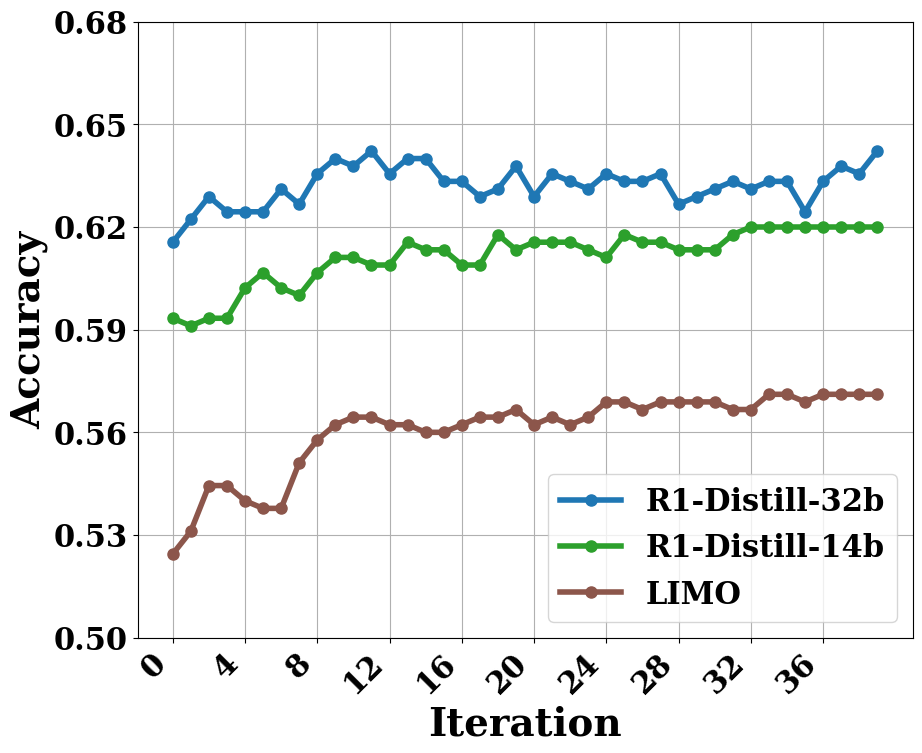

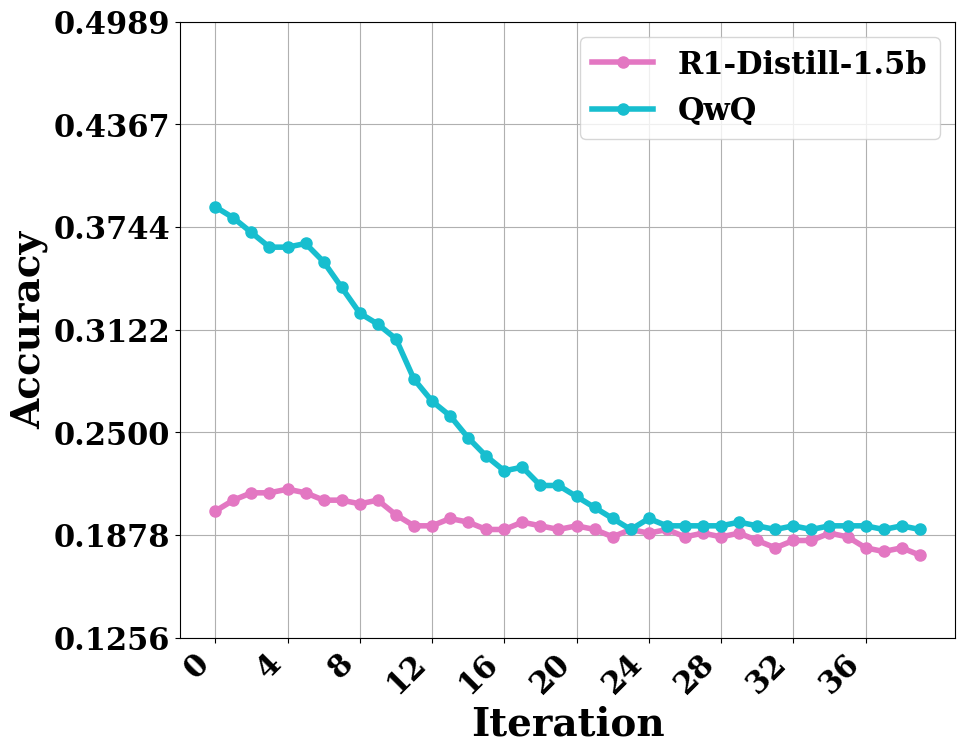

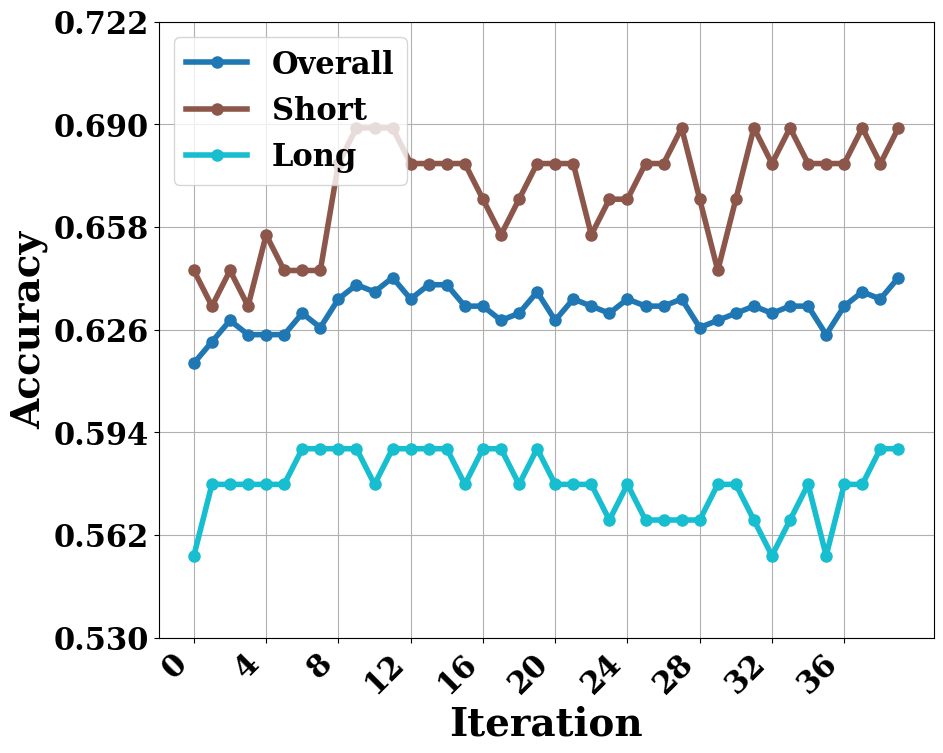

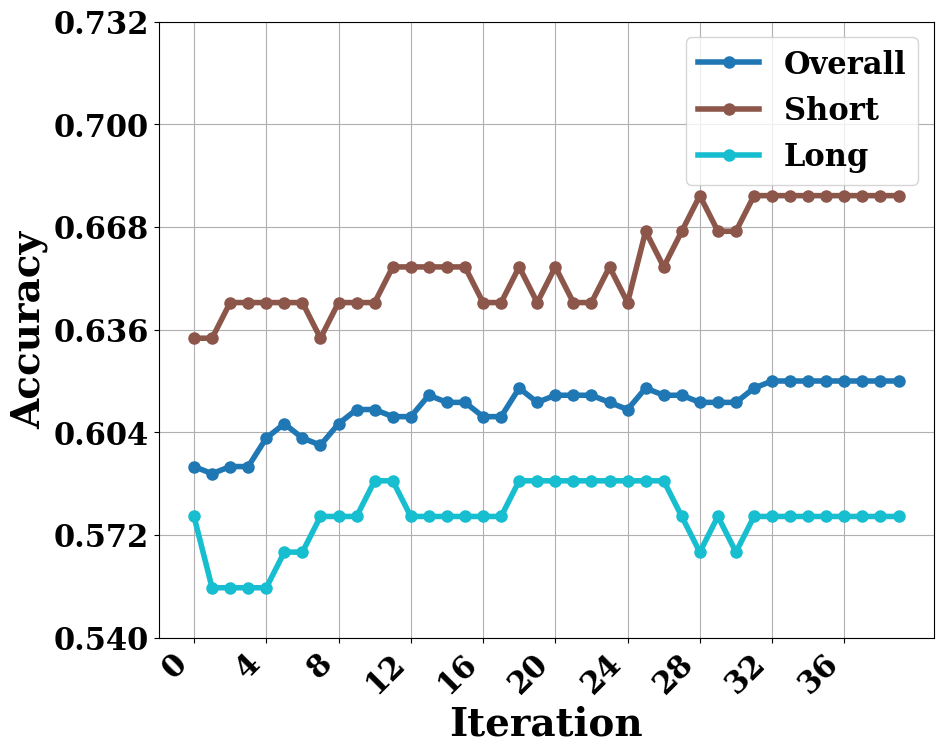

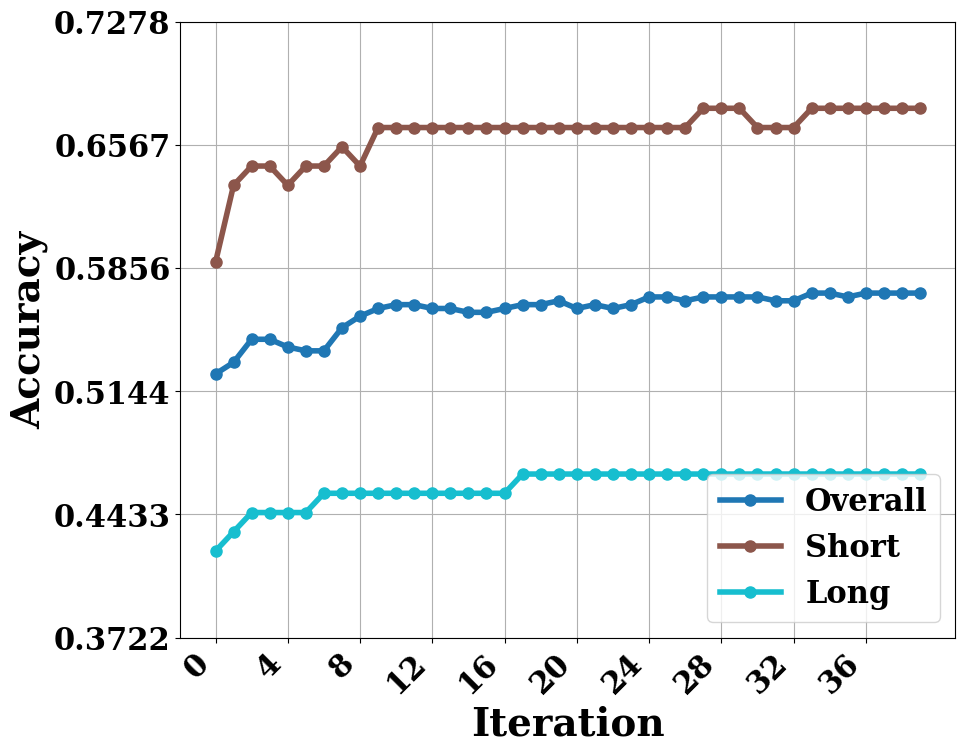

In [277]:
r1_32b_extracted_data = extract_data(r1_32b_data)
r1_14b_extracted_data = extract_data(r1_14b_data)
r1_1_5b_extracted_data = extract_data(r1_1_5b_data)
qwq_extracted_data = extract_data(qwq_data)
s1_extracted_data = extract_data(s1_data)
limo_extracted_data = extract_data(limo_data)
# overall_data_dict = {
#     'R1-Distill-32b': r1_32b_extracted_data['Overall'],
#     'R1-Distill-14b': r1_14b_extracted_data['Overall'],
#     'QwQ': qwq_extracted_data['Overall'],
# }
# plot_acc(overall_data_dict, figure_name="imgs/overall_search_acc.pdf", title=None)
r1_32b_and_14b_acc_data_dict = {
    "R1-Distill-32b": [item['acc'] for item in r1_32b_extracted_data['Overall']],
    "R1-Distill-14b": [item['acc'] for item in r1_14b_extracted_data['Overall']],
    "LIMO": [item['acc'] for item in limo_extracted_data['Overall']],
}

r1_32b_data_dict = {
    "Overall": [item['acc'] for item in r1_32b_extracted_data['Overall']],
    "Short": [item['acc'] for item in r1_32b_extracted_data['Group 1']],
    "Long": [item['acc'] for item in r1_32b_extracted_data['Group 5']],
}

r1_14b_acc_data_dict = {
    "Overall": [item['acc'] for item in r1_14b_extracted_data['Overall']],
    "Short": [item['acc'] for item in r1_14b_extracted_data['Group 1']],
    "Long": [item['acc'] for item in r1_14b_extracted_data['Group 5']],
}

limo_acc_data_dict = {
    "Overall": [item['acc'] for item in limo_extracted_data['Overall']],
    "Short": [item['acc'] for item in limo_extracted_data['Group 1']],
    "Long": [item['acc'] for item in limo_extracted_data['Group 5']],
}

qwq_and_r1_1_5b_acc_data_dict = {
    "R1-Distill-1.5b": [item['acc'] for item in r1_1_5b_extracted_data['Overall']],
    "QwQ": [item['acc'] for item in qwq_extracted_data['Overall']],
    # "s1": [item['acc'] for item in s1_extracted_data['Overall']],
}


plot_multiple_models_v2(r1_32b_and_14b_acc_data_dict, title=None, show_labels=False, color_theme='tab10', output_filename='imgs/r1_32_and_14b_acc_after_seq_scale.pdf', xlabel='Iteration', ylabel='Accuracy', xtick=list(range(40)), rotation=45, y_range=(0.5, 0.65), x_tick_interval=4, color_range=(0, 0.5))
plot_multiple_models_v2(qwq_and_r1_1_5b_acc_data_dict, title=None, show_labels=False, color_theme='tab10', output_filename='imgs/qwq_r1_1_5b_acc_after_seq_scale.pdf', xlabel='Iteration', ylabel='Accuracy', xtick=list(range(40)), rotation=45, x_tick_interval=4, color_range=(0.6, 1.0))
plot_multiple_models_v2(r1_32b_data_dict, title=None, show_labels=False, color_theme='tab10', output_filename='imgs/r1_32b_acc_after_seq_scale.pdf', xlabel='Iteration', ylabel='Accuracy', xtick=list(range(40)), rotation=45, y_range=(0.53, 0.69), x_tick_interval=4)
plot_multiple_models_v2(r1_14b_acc_data_dict, title=None, show_labels=False, color_theme='tab10', output_filename='imgs/r1_14b_acc_after_seq_scale.pdf', xlabel='Iteration', ylabel='Accuracy', xtick=list(range(40)), rotation=45, y_range=(0.54, 0.70), x_tick_interval=4)
plot_multiple_models_v2(limo_acc_data_dict, title=None, show_labels=False, color_theme='tab10', output_filename='imgs/limo_acc_after_seq_scale.pdf', xlabel='Iteration', ylabel='Accuracy', xtick=list(range(40)), rotation=45, x_tick_interval=4)


# plot_metric_comparison(r1_32b_extracted_data, groups_to_plot=['Overall'], figure_name='imgs/r1_32b_revision_overall.pdf', 
#                        title='R1-32b', ylabel='Ratio')
# plot_metric_comparison(r1_14b_extracted_data, groups_to_plot=['Overall'], figure_name='imgs/r1_14b_revision_overall.pdf', 
#                        title='R1-14b', ylabel='Ratio')
# plot_metric_comparison(r1_1_5b_extracted_data, groups_to_plot=['Overall'], figure_name='imgs/r1_1_5b_revision_overall.pdf', 
#                        title='R1-1.5b', ylabel='Ratio')
# plot_metric_comparison(qwq_extracted_data, groups_to_plot=['Overall'], figure_name='imgs/qwq_revision_overall.pdf', 
#                        title='QwQ', ylabel='Ratio')




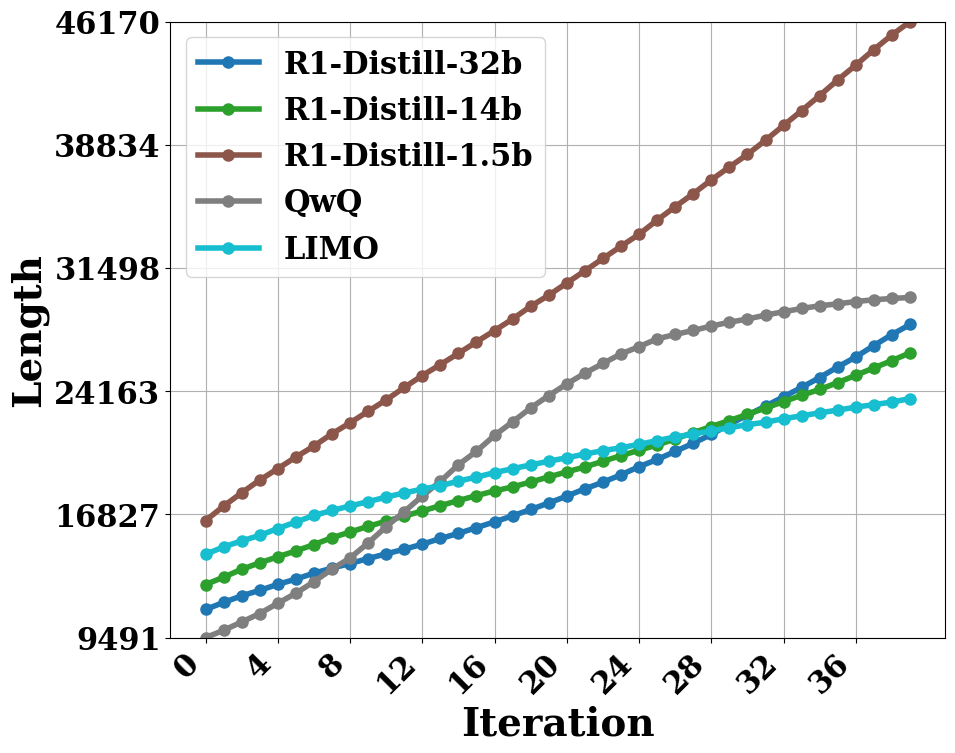

In [278]:
len_data_dict = {
    "R1-Distill-32b": [item['len after search'] for item in r1_32b_extracted_data['Overall']],
    "R1-Distill-14b": [item['len after search'] for item in r1_14b_extracted_data['Overall']],
    "R1-Distill-1.5b": [item['len after search'] for item in r1_1_5b_extracted_data['Overall']],
    # "R1-Distill-1.5b": [109304, 106167, 117807, 68227, 71380],
    "QwQ": [item['len after search'] for item in qwq_extracted_data['Overall']],
    "LIMO": [item['len after search'] for item in limo_extracted_data['Overall']],
    # "S1": [item['len after search'] for item in s1_extracted_data['Overall']]
}

plot_multiple_models_v2(len_data_dict, title="", show_labels=False, color_theme='tab10', output_filename='imgs/len_after_seq_scale.pdf', xlabel='Iteration', ylabel='Length', rotation=45, x_tick_interval=4, xtick=list(range(0,40)))

# plot_multiple_models_v2(gpqa_data_dict, title="GPQA", show_labels=False, color_theme='viridis', output_filename='imgs/gpqa_num_tokens.pdf', ylabel='Number of Tokens')


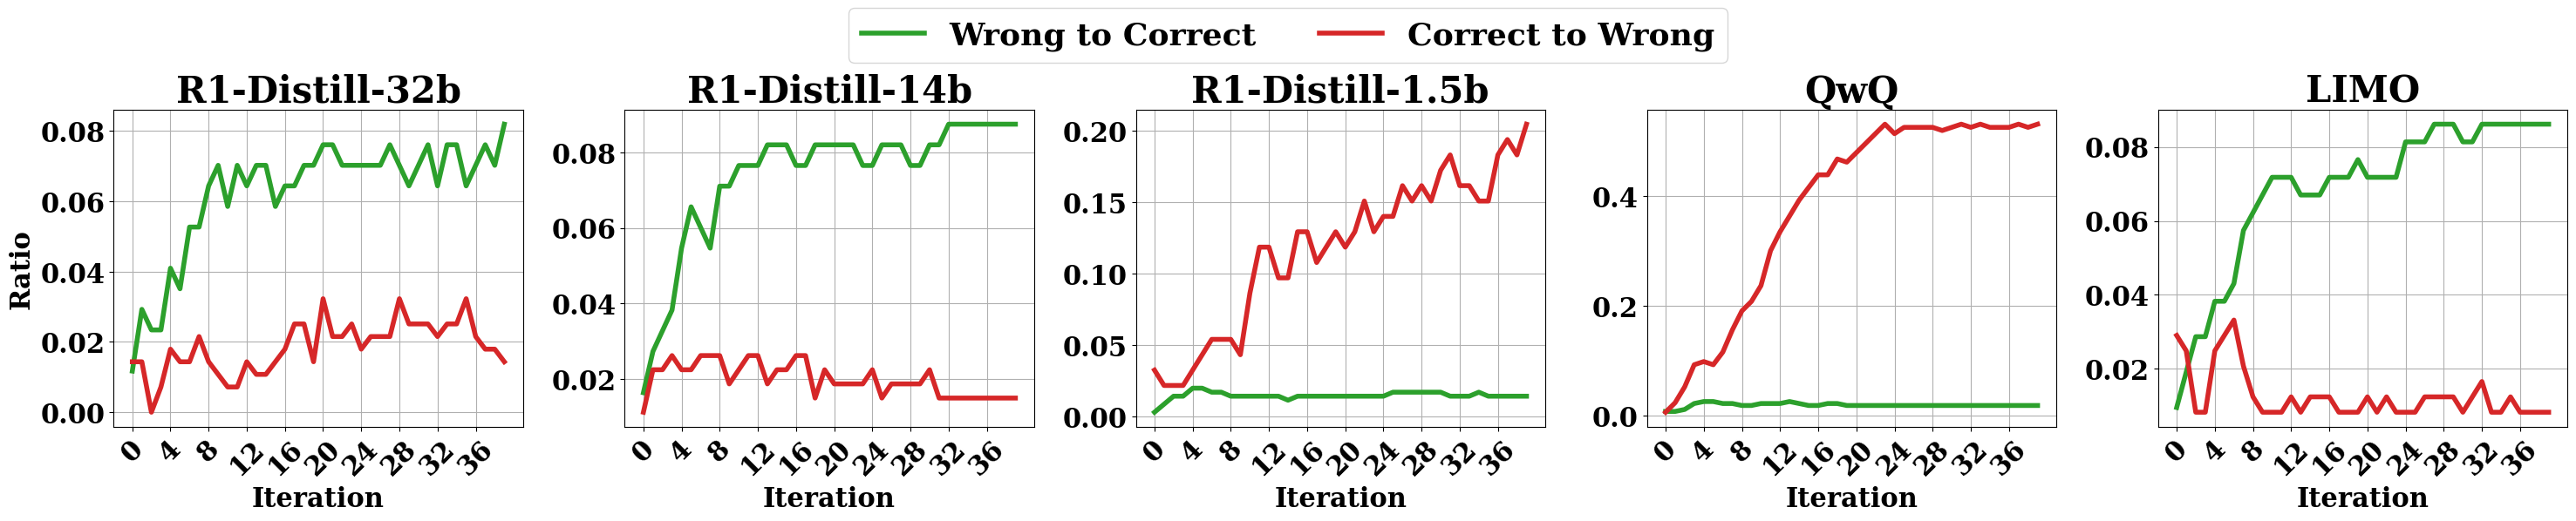

In [267]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metric_comparison(ax, data, groups_to_plot=None, title=None, ylabel=None):
    """
    Compares 'search from wrong to correct ratio' and 'search from init wrong to correct ratio' 
    on the same plot for specified groups.

    Args:
        ax (matplotlib.axes.Axes): The axis to plot on.
        data (dict): The dictionary containing the extracted data.
        groups_to_plot (list, optional): A list of group names to plot. If None, plots all groups.
        title (str, optional): The title of the plot.
        ylabel (str, optional): The label for the y-axis.
    """
    for i, (group_name, group_data) in enumerate(data.items()):
        if groups_to_plot is not None and group_name not in groups_to_plot:
            continue

        epochs = [item['epoch'] for item in group_data]

        # Extract the two metrics
        wrong_to_correct = [item['search from init wrong to correct ratio'] for item in group_data]
        init_wrong_to_correct = [item['search from init correct to wrong ratio'] for item in group_data]

        # Plot both metrics for the current group
        ax.plot(epochs, wrong_to_correct, label="Wrong to Correct", linewidth=4, color=plt.cm.tab10(0.2))
        ax.plot(epochs, init_wrong_to_correct, label=f"Correct to Wrong", linewidth=4, color=plt.cm.tab10(0.3))

    ax.set_xlabel('Iteration')
    ax.tick_params(axis='x', rotation=45)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel("Ratio")
    if title is not None:
        ax.set_title(title, fontsize=30)
    else:
        ax.set_title("Metric Comparison")
    ax.grid(True)
    max_epochs = max([len(group_data) for group_data in data.values()])
    ax.set_xticks(range(0, max_epochs, 4))

def create_revision_plots(data_list, titles, layout='1x4', save_path=None):
    """
    创建多子图布局的修正图
    Args:
        data_list: 包含多个数据集的列表
        titles: 每个子图的标题列表
        layout: '1x4', '1x5' 或 '2x3'
        save_path: 保存文件的路径，如果为None则不保存
    """
    if layout == '1x4':
        fig, axs = plt.subplots(1, 4, figsize=(24, 6))
        axs = axs.flatten()
        num_plots = 4
    elif layout == '1x5':
        fig, axs = plt.subplots(1, 5, figsize=(30, 6))  # 增加宽度以适应5个图
        axs = axs.flatten()
        num_plots = 5
    elif layout == '2x3':
        fig, axs = plt.subplots(2, 3, figsize=(24, 12))
        axs = axs.flatten()
        num_plots = 6
    else:
        raise ValueError("Unsupported layout. Choose '1x4', '1x5' or '2x3'")

    # 确保数据和标题数量匹配布局
    if len(data_list) < num_plots or len(titles) < num_plots:
        raise ValueError(f"Need {num_plots} datasets and titles for {layout} layout")

    # 绘制每个子图
    for i in range(num_plots):
        # 第一列显示y轴标签，其他列不显示
        ylabel = 'Ratio' if i % (3 if layout == '2x3' else (4 if layout == '1x4' else 5)) == 0 else ''
        plot_metric_comparison(axs[i], data_list[i], 
                             groups_to_plot=['Overall'], 
                             title=titles[i], 
                             ylabel=ylabel)

    # 获取图例并在顶部居中显示
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', 
              bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=26)

    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # 保存图形
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')

    return fig

# 使用示例：
data_list = [r1_32b_extracted_data, r1_14b_extracted_data, r1_1_5b_extracted_data, 
             qwq_extracted_data, limo_extracted_data, s1_extracted_data]
titles = ['R1-Distill-32b', 'R1-Distill-14b', 'R1-Distill-1.5b', 
         'QwQ', 'LIMO', 'S1']

# 创建1x5布局
fig_1x5 = create_revision_plots(
    data_list[:5], 
    titles[:5], 
    layout='1x5',
    save_path="imgs/overall_revision_1x5.pdf"
)
plt.show()

# 创建2x3布局
# fig_2x3 = create_revision_plots(
#     data_list, 
#     titles, 
#     layout='2x3',
#     save_path="imgs/overall_revision_2x3.pdf"
# )
# plt.show()

In [23]:
from concurrent.futures import ProcessPoolExecutor
import numpy as np
from collections import Counter
from functools import partial

# 将处理函数移到外部
def process_majority_chunk(i, predictions, reference_answers):
    prefix_predictions = [p[:i+1] for p in predictions]
    return calculate_majority_vote_accuracy(prefix_predictions, reference_answers)

def process_weighted_chunk(i, predictions, lengths, reference_answers):
    prefix_predictions = [p[:i+1] for p in predictions]
    prefix_lengths = [l[:i+1] for l in lengths]
    return calculate_weighted_majority_vote_accuracy(prefix_predictions, prefix_lengths, reference_answers)

def process_len_reward_chunk(i, predictions, lengths, reference_answers):
    prefix_predictions = [p[:i+1] for p in predictions]
    prefix_lengths = [l[:i+1] for l in lengths]
    return calculate_shortest_token_prediction_accuracy(prefix_predictions, prefix_lengths, reference_answers)

def parallel_cumsum_majority_vote(predictions, reference_answers, n_workers=4):
    """并行化计算累积多数投票"""
    worker_func = partial(process_majority_chunk, 
                         predictions=predictions,
                         reference_answers=reference_answers)
    
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        all_acc = list(executor.map(worker_func, range(len(predictions[0]))))
    
    return all_acc

def parallel_cumsum_weighted_majority_vote(predictions, lengths, reference_answers, n_workers=4):
    """并行化计算累积加权多数投票"""
    worker_func = partial(process_weighted_chunk,
                         predictions=predictions,
                         lengths=lengths,
                         reference_answers=reference_answers)
    
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        all_acc = list(executor.map(worker_func, range(len(predictions[0]))))
    
    return all_acc

def parallel_cumsum_len_reward_select(predictions, lengths, reference_answers, n_workers=4):
    """并行化计算累积最短长度选择"""
    worker_func = partial(process_len_reward_chunk,
                         predictions=predictions,
                         lengths=lengths,
                         reference_answers=reference_answers)
    
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        all_acc = list(executor.map(worker_func, range(len(predictions[0]))))
    
    return all_acc

In [306]:
import json
import random
from transformers import AutoTokenizer
from eval import math_postprocess_v2, is_equiv, loose_equal
import numpy as np
from collections import Counter
import math
from tqdm import tqdm
from collections import defaultdict
from collections import Counter

eval_func = None

def matrix_cumsum_mean(matrix):
  """
  对一个 list of list 的矩阵计算按行的 cumsum，然后按列计算平均值。

  Args:
    matrix: 一个 list of list 的矩阵。

  Returns:
    一个 numpy 数组，包含按列计算的平均值。
  """

  # 将 list of list 转换为 numpy 数组
  matrix = np.array(matrix)

  # 按行计算 cumsum
  cumsum_matrix = np.cumsum(matrix, axis=1)

  # 按列计算平均值
  mean_values = np.mean(cumsum_matrix, axis=0)

  return mean_values

def matrix_bool_cumsum_or_mean(matrix):
  """
  对一个 list of list 的 bool 矩阵按行计算 cumsum 的或操作，然后按列计算平均值。

  Args:
    matrix: 一个 list of list 的 bool 矩阵。

  Returns:
    一个 numpy 数组，包含按列计算的平均值。
  """

  # 将 list of list 转换为 numpy 数组
  matrix = np.array(matrix, dtype=bool)

  # 按行计算 cumsum 的或操作
  cumsum_or_matrix = np.cumsum(matrix, axis=1, dtype=bool)

  # 按列计算平均值
  mean_values = np.mean(cumsum_or_matrix, axis=0)

  return mean_values

def calculate_majority_vote_accuracy(predictions, reference_answers):
    correct_count = 0
    for pred, ref in zip(predictions, reference_answers):
        # 过滤掉值为 None 的预测
        filtered_pred = [p for p in pred if p is not None]
        # filtered_pred = pred
        
        # 如果没有有效的预测值，跳过该条数据
        if not filtered_pred:
            continue
        
        # 统计每个选项的出现次数
        counts = Counter(filtered_pred)
        # 获取出现次数最多的选项
        majority_vote = counts.most_common(1)[0][0]
        
        # 如果多数投票结果与参考答案相同，计数加1
        if eval_func(majority_vote, ref):
            correct_count += 1
    
    # 计算准确率
    accuracy = correct_count / len(reference_answers)
    return accuracy

def calculate_weighted_majority_vote_accuracy(predictions, lengths, reference_answers):
    correct_count = 0
    
    for pred, length, ref in zip(predictions, lengths, reference_answers):
        # 同时过滤掉值为 None 的预测及其对应的 length
        filtered = [(p, l) for p, l in zip(pred, length) if p is not None]
        if not filtered:
            continue
        
        # 解包过滤后的预测和长度
        filtered_pred, filtered_length = zip(*filtered)
        
        # 统计每个选项的出现次数和对应的所有length
        option_data = defaultdict(lambda: {'count': 0, 'lengths': []})
        for p, l in zip(filtered_pred, filtered_length):
            option_data[p]['count'] += 1
            option_data[p]['lengths'].append(l)
        
        # 计算每个选项的权重
        option_weights = []
        for option, data in option_data.items():
            count = data['count']
            avg_length = sum(data['lengths']) / len(data['lengths'])  # 计算length均值
            if avg_length > 0:
                weight = count / math.log(avg_length)
                option_weights.append((option, weight))
        
        if option_weights:
            option_weights.sort(key=lambda x: x[1], reverse=True)
            best_option = option_weights[0][0]
            
            if eval_func(best_option, ref):
                correct_count += 1
    
    accuracy = correct_count / len(reference_answers) if reference_answers else 0
    return accuracy


def calculate_shortest_token_prediction_accuracy(predictions, lengths, reference_answers):
    correct_count = 0
    
    for pred, length, ref in zip(predictions, lengths, reference_answers):
        # 对每个选项计算其对应的 token 长度
        filtered_pred = [p for p in pred if p is not None]
        if not filtered_pred:
            continue
        
        option_lengths = list(zip(filtered_pred, length))
        
        # 按照 token 长度升序排列，选择长度最短的选项
        shortest_option = min(option_lengths, key=lambda x: x[1])[0]
        
        # 如果最短长度的选项与参考答案相同，计数加1
        if eval_func(shortest_option, ref):
            correct_count += 1
    
    # 计算准确率
    accuracy = correct_count / len(reference_answers) if reference_answers else 0
    return accuracy


def cumsum_majority_vote(predictions, reference_answers):
    all_acc = []
    for i in range(len(predictions[0])):
        prefix_predictions = [p[:i+1] for p in predictions]
        prefix_sc_acc = calculate_majority_vote_accuracy(prefix_predictions, reference_answers)
        all_acc.append(prefix_sc_acc)
    return all_acc

def cumsum_weighted_majority_vote(predictions, reference_answers, tokenizer):
    all_acc = []
    for i in range(len(predictions[0])):
        prefix_predictions = [p[:i+1] for p in predictions]
        prefix_sc_acc = calculate_weighted_majority_vote_accuracy(prefix_predictions, reference_answers, tokenizer)
        all_acc.append(prefix_sc_acc)
    return all_acc

def cumsum_len_reward_select(predictions, reference_answers, tokenizer):
    all_acc = []
    for i in range(len(predictions[0])):
        prefix_predictions = [p[:i+1] for p in predictions]
        prefix_sc_acc = calculate_shortest_token_prediction_accuracy(prefix_predictions, reference_answers, tokenizer)
        all_acc.append(prefix_sc_acc)
    return all_acc

def mean_of_lists(list_of_lists):
    # 展平 list of list
    flattened = [item for sublist in list_of_lists for item in sublist]
    
    # 计算平均值
    return sum(flattened) / len(flattened) if flattened else 0  # 避免除零错误

def analyze_parallel_sampling_avg(file_path, tokenizer, num_seeds=5, overwrite_cache=False):
    global eval_func
    if 'gpqa' in file_path:
        eval_func = is_equiv
    else:
        eval_func = loose_equal
    
    all_correct_rate_means = []
    all_length_means = []
    all_sc_acc = []
    all_weighted_sc_acc = []
    all_short_first_acc = []
    
    with open(file_path, "r") as f:
        data = [json.loads(l) for l in f]
        print('before filtering: ', len(data))
        data = [d for d in data if all([item is not None and isinstance(item, str) for item in d['model_solution']])]
        print('after filtering: ', len(data))
        model_solutions = [d['model_solution'] for d in data]
        ref_answers = [d['ref_answer'] for d in data]
        
    
    print("tokenizing...")
    tokenized_solutions = [[tokenizer.encode(s) for s in ms] for ms in model_solutions]    
    # Precompute predictions and is_correct for all seeds
    print('Precompute predictions and is_correct for all seeds')
    # all_predictions = [[math_postprocess_v2(s) for s in ms] for ms in model_solutions]
    all_predictions = [[math_postprocess_v2(s) for s in ms if s is not None] for ms in model_solutions]
    # print(all_predictions)
    all_is_correct = [[eval_func(math_postprocess_v2(s), r) for s in ms] for ms, r in zip(model_solutions, ref_answers)]
    all_lens = [[len(ts) for ts in ms] for ms in tokenized_solutions]
    
    for seed in tqdm(range(num_seeds)):
        random.seed(seed)
        
        # Shuffle the indices for the current seed
        shuffled_indices = [list(range(len(ms))) for ms in model_solutions]
        [random.shuffle(idx) for idx in shuffled_indices]
        
        # Shuffle model solutions, tokenized solutions, is_correct, predictions, and lens
        shuffled_solutions = [[ms[i] for i in idx] for ms, idx in zip(model_solutions, shuffled_indices)]
        shuffled_tokenized_solutions = [[ts[i] for i in idx] for ts, idx in zip(tokenized_solutions, shuffled_indices)]
        shuffled_is_correct = [[is_corr[i] for i in idx] for is_corr, idx in zip(all_is_correct, shuffled_indices)]
        shuffled_predictions = [[pred[i] for i in idx] for pred, idx in zip(all_predictions, shuffled_indices)]
        shuffled_lens = [[lens[i] for i in idx] for lens, idx in zip(all_lens, shuffled_indices)]
        
        # Calculate metrics
        sc_acc = parallel_cumsum_majority_vote(shuffled_predictions, ref_answers)
        weighted_sc_acc = parallel_cumsum_weighted_majority_vote(shuffled_predictions, shuffled_lens, ref_answers)
        short_first_acc = parallel_cumsum_len_reward_select(shuffled_predictions, shuffled_lens, ref_answers)
        correct_rate_means = matrix_bool_cumsum_or_mean(shuffled_is_correct)
        length_means = matrix_cumsum_mean(shuffled_lens)
    
        all_correct_rate_means.append(correct_rate_means)
        all_length_means.append(length_means)
        all_sc_acc.append(sc_acc)
        all_weighted_sc_acc.append(weighted_sc_acc)
        all_short_first_acc.append(short_first_acc)
    
    # Average results
    avg_correct_rate_means = np.mean(all_correct_rate_means, axis=0)
    avg_length_means = np.mean(all_length_means, axis=0)
    avg_sc_acc = np.mean(all_sc_acc, axis=0)
    avg_weighted_sc_acc = np.mean(all_weighted_sc_acc, axis=0)
    avg_short_first_acc = np.mean(all_short_first_acc, axis=0)
    
    return avg_correct_rate_means, avg_length_means, avg_sc_acc, avg_weighted_sc_acc, avg_short_first_acc

def plot_scatter(x, y, group, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis", 
                 cmap='viridis', s=50, filename=None):
    """
    绘制散点图，并用不同颜色表示多组数据，支持保存到文件。

    Args:
        x: x坐标数据，array-like。
        y: y坐标数据，array-like。
        group: 分组数据，array-like，与x和y长度相同。
        title: 图形标题，字符串，默认为"Scatter Plot"。
        xlabel: x轴标签，字符串，默认为"X-axis"。
        ylabel: y轴标签，字符串，默认为"Y-axis"。
        cmap: 颜色映射，字符串，默认为'viridis'。
        s: 点的大小，数值，默认为50。
        filename: 保存文件名，字符串，如果为None则不保存，默认为None。
    """

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=group, cmap=cmap, s=s)

    plt.legend(*scatter.legend_elements(), title="Group")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if filename:  # 如果filename不为None，则保存图形
        plt.savefig(filename)  # 使用savefig函数保存图形
    else:
        plt.show()  # 否则显示图形

qwq_tokenizer = AutoTokenizer.from_pretrained("/cpfs01/user/xingshuhao.dispatch/zyzeng/llm_ddd/models/qwq")
qwq_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/qwq/aime_test_rollout32.jsonl"
qwq_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/qwq/gpqa_test_rollout32.jsonl"
qwq_omini_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/qwq/omini_test_rollout32.jsonl"

r1_32b_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-32b/aime_test_rollout32.jsonl"
r1_32b_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-32b/gpqa_test_rollout32.jsonl"
r1_32b_omini_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-32b/omini_test_rollout32.jsonl"

r1_1_5b_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-1.5b/aime_test_rollout32.jsonl"
r1_1_5b_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-1.5b/gpqa_test_rollout32.jsonl"
r1_1_5b_omini_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-1.5b/omini_test_rollout32.jsonl"

r1_14b_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-14b/aime_test_rollout32.jsonl"
r1_14b_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-14b/gpqa_test_rollout32.jsonl"
r1_14b_omini_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/r1-14b/omini_test_rollout32.jsonl"


s1_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/s1/aime_test_rollout32.jsonl"
limo_aime_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/limo/aime_test_rollout32.jsonl"
s1_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/s1/gpqa_test_rollout32.jsonl"
limo_gpqa_path = "/cpfs01/user/xingshuhao.dispatch/zyzeng/adaptive-thinking/infer/outputs/limo/gpqa_test_rollout32.jsonl"

qwq_correct_rate_means, qwq_length_means, qwq_sc_acc, qwq_weighed_sc_acc, qwq_short_first_acc  = analyze_parallel_sampling_avg(qwq_aime_path, qwq_tokenizer, num_seeds=5)
r1_32b_correct_rate_means, r1_32b_length_means, r1_32b_sc_acc, r1_32b_weighted_sc_acc, r1_32b_short_first_acc = analyze_parallel_sampling_avg(r1_32b_aime_path, qwq_tokenizer, num_seeds=5)
aime_r1_14b_correct_rate_means, aime_r1_14b_length_means, aime_r1_14b_sc_acc, aime_r1_14b_weighted_sc_acc, aime_r1_14b_short_first_acc = analyze_parallel_sampling_avg(r1_14b_aime_path, qwq_tokenizer, num_seeds=5)
r1_1_5b_correct_rate_means, r1_1_5b_length_means, r1_1_5b_sc_acc, r1_1_5b_weighted_sc_acc, r1_1_5b_short_first_acc = analyze_parallel_sampling_avg(r1_1_5b_aime_path, qwq_tokenizer, num_seeds=5)
aime_limo_correct_rate_means, aime_limo_length_means, aime_limo_sc_acc, aime_limo_weighted_sc_acc, aime_limo_short_first_acc = analyze_parallel_sampling_avg(limo_aime_path, qwq_tokenizer, num_seeds=5)

gpqa_r1_1_5b_correct_rate_means, gpqa_r1_1_5b_length_means, gpqa_r1_1_5b_sc_acc, gpqa_r1_1_5b_weighted_sc_acc, gpqa_r1_1_5b_short_first_acc = analyze_parallel_sampling_avg(r1_1_5b_gpqa_path, qwq_tokenizer, num_seeds=5)
gpqa_r1_32b_correct_rate_means, gpqa_r1_32b_length_means, gpqa_r1_32b_sc_acc, gpqa_r1_32b_weighted_sc_acc, gpqa_r1_32b_short_first_acc = analyze_parallel_sampling_avg(r1_32b_gpqa_path, qwq_tokenizer, num_seeds=5)
gpqa_r1_14b_correct_rate_means, gpqa_r1_14b_length_means, gpqa_r1_14b_sc_acc, gpqa_r1_14b_weighted_sc_acc, gpqa_r1_14b_short_first_acc = analyze_parallel_sampling_avg(r1_14b_gpqa_path, qwq_tokenizer, num_seeds=5)
gpqa_qwq_correct_rate_means, gpqa_qwq_length_means, gpqa_qwq_sc_acc, gpqa_qwq_weighted_sc_acc, gpqa_qwq_short_first_acc = analyze_parallel_sampling_avg(qwq_gpqa_path, qwq_tokenizer, num_seeds=5)
gpqa_limo_correct_rate_means, gpqa_limo_length_means, gpqa_limo_sc_acc, gpqa_limo_weighted_sc_acc, gpqa_limo_short_first_acc = analyze_parallel_sampling_avg(limo_gpqa_path, qwq_tokenizer, num_seeds=5)
# omini_qwq_correct_rate_means, omini_qwq_length_means, omini_qwq_sc_acc, omini_qwq_weighed_sc_acc, omini_qwq_short_first_acc  = analyze_parallel_sampling_avg(qwq_aime_path, qwq_tokenizer, num_seeds=5)
# omini_r1_32b_correct_rate_means, omini_r1_32b_length_means, omini_r1_32b_sc_acc, omini_r1_32b_weighted_sc_acc, omini_r1_32b_short_first_acc = analyze_parallel_sampling_avg(r1_32b_omini_path, qwq_tokenizer, num_seeds=5)
# omini_r1_14b_correct_rate_means, omini_r1_14b_length_means, omini_r1_14b_sc_acc, omini_r1_14b_weighted_sc_acc, omini_r1_14b_short_first_acc = analyze_parallel_sampling_avg(r1_14b_omini_path, qwq_tokenizer, num_seeds=5)
# omini_r1_1_5b_correct_rate_means, omini_r1_1_5b_length_means, omini_r1_1_5b_sc_acc, omini_r1_1_5b_weighted_sc_acc, omini_r1_1_5b_short_first_acc = analyze_parallel_sampling_avg(r1_1_5b_omini_path, qwq_tokenizer, num_seeds=5)

# aime_s1_correct_rate_means, aime_s1_length_means, aime_s1_sc_acc, aime_s1_weighed_sc_acc, aime_s1_short_first_acc  = analyze_parallel_sampling_avg(s1_aime_path, qwq_tokenizer, num_seeds=5)
# gpqa_s1_correct_rate_means, gpqa_s1_length_means, gpqa_s1_sc_acc, gpqa_s1_weighed_sc_acc, gpqa_s1_short_first_acc  = analyze_parallel_sampling_avg(s1_gpqa_path, qwq_tokenizer, num_seeds=5)


before filtering:  90
after filtering:  90
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:43<00:00,  8.76s/it]


before filtering:  90
after filtering:  90
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:18<00:00,  3.73s/it]


before filtering:  90
after filtering:  90
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:32<00:00,  6.46s/it]


before filtering:  90
after filtering:  90
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [01:57<00:00, 23.42s/it]


before filtering:  90
after filtering:  90
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:30<00:00,  6.11s/it]


before filtering:  198
after filtering:  198
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


before filtering:  198
after filtering:  198
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


before filtering:  198
after filtering:  198
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


before filtering:  198
after filtering:  195
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


before filtering:  198
after filtering:  195
tokenizing...
Precompute predictions and is_correct for all seeds


100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


In [25]:
from copy import deepcopy
def divide_by_1k(data):
    new_data = deepcopy(data)
    for d in new_data:
        d['x'] = [v/1000 for v in d['x']]
    return new_data

In [307]:
print('######################################################################')
print('AIME')
r1_32b_acc_data = [
    {'group': "Majority Vote", 'x': r1_32b_length_means, 'y': r1_32b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': r1_32b_length_means, 'y': r1_32b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': r1_32b_length_means, 'y': r1_32b_weighted_sc_acc, 'marker': 's'},
]



r1_14b_acc_data = [
    {'group': "Majority Vote", 'x': aime_r1_14b_length_means, 'y': aime_r1_14b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': aime_r1_14b_length_means, 'y': aime_r1_14b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': aime_r1_14b_length_means, 'y': aime_r1_14b_weighted_sc_acc, 'marker': 's'},

]


r1_1_5b_acc_data = [
    {'group': "Majority Vote", 'x': r1_1_5b_length_means, 'y': r1_1_5b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': r1_1_5b_length_means, 'y': r1_1_5b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': r1_1_5b_length_means, 'y': r1_1_5b_weighted_sc_acc, 'marker': 's'},
    # {'group': "R1-Distill-32b Sequential Scaling", 'x': r1_32b_seq_length, 'y': r1_32b_seq_acc, 'marker': '*'},
]



qwq_acc_data = [{'group': "Majority Vote", 'x': qwq_length_means, 'y': qwq_sc_acc, 'marker': 'o'},
                {'group': "Shortest", 'x': qwq_length_means, 'y': qwq_short_first_acc, 'marker': '^'},
                {'group': "Shortest Majority Vote", 'x': qwq_length_means, 'y': qwq_weighed_sc_acc, 'marker': 's'},
                # {'group': "QwQ Sequential Scaling", 'x': qwq_seq_length, 'y': qwq_seq_acc, 'marker': '*'}
]
aime_s1_acc_data = [
    {'group': "Majority Vote", 'x': aime_s1_length_means, 'y': aime_s1_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': aime_s1_length_means, 'y': aime_s1_short_first_acc, 'marker': '^'},
    {'group': "Shortest Majority Vote", 'x': aime_s1_length_means, 'y': aime_s1_weighed_sc_acc, 'marker': 's'},
]
aime_limo_acc_data = [
    {'group': "Majority Vote", 'x': aime_limo_length_means, 'y': aime_limo_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': aime_limo_length_means, 'y': aime_limo_short_first_acc, 'marker': '^'},
    {'group': "Shortest Majority Vote", 'x': aime_limo_length_means, 'y': aime_limo_weighted_sc_acc, 'marker': 's'},
]

print('######################################################################')
print('GPQA')
gpqa_r1_32b_acc_data = [
    {'group': "Majority Vote", 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_weighted_sc_acc, 'marker': 's'},
]

gpqa_r1_14b_acc_data = [
    {'group': "Majority Vote", 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_weighted_sc_acc, 'marker': 's'},

]

gpqa_r1_1_5b_acc_data = [
    {'group': "Majority Vote", 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_short_first_acc, 'marker': '^'},
    {'group': 'Shortest Majority Vote', 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_weighted_sc_acc, 'marker': 's'},
    # {'group': "R1-Distill-32b Sequential Scaling", 'x': r1_32b_seq_length, 'y': r1_32b_seq_acc, 'marker': '*'},
]

gpqa_qwq_acc_data = [{'group': "Majority Vote", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_sc_acc, 'marker': 'o'},
                {'group': "Shortest", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_short_first_acc, 'marker': '^'},
                {'group': "Shortest Majority Vote", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_weighted_sc_acc, 'marker': 's'},
                # {'group': "QwQ Sequential Scaling", 'x': qwq_seq_length, 'y': qwq_seq_acc, 'marker': '*'}
]

gpqa_s1_acc_data = [
    {'group': "Majority Vote", 'x': gpqa_s1_length_means, 'y': gpqa_s1_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': gpqa_s1_length_means, 'y': gpqa_s1_short_first_acc, 'marker': '^'},
    {'group': "Shortest Majority Vote", 'x': gpqa_s1_length_means, 'y': gpqa_s1_weighed_sc_acc, 'marker': 's'},
]
gpqa_limo_acc_data = [
    {'group': "Majority Vote", 'x': gpqa_limo_length_means, 'y': gpqa_limo_sc_acc, 'marker': 'o'},
    {'group': "Shortest", 'x': gpqa_limo_length_means, 'y': gpqa_limo_short_first_acc, 'marker': '^'},
    {'group': "Shortest Majority Vote", 'x': gpqa_limo_length_means, 'y': gpqa_limo_weighted_sc_acc, 'marker': 's'},
]



######################################################################
AIME
######################################################################
GPQA


/tmp/ipykernel_656502/1572659332.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))


Majority Vote 0.5977777777777777 0.7288888888888889
Shortest 0.6222222222222223 0.6199999999999999
Shortest Majority Vote 0.6222222222222223 0.7377777777777779
Majority Vote 0.5888888888888888 0.7177777777777777
Shortest 0.6044444444444445 0.62
Shortest Majority Vote 0.6044444444444445 0.7155555555555556
Majority Vote 0.24 0.4
Shortest 0.27555555555555555 0.26222222222222225
Shortest Majority Vote 0.27555555555555555 0.4222222222222222
Majority Vote 0.4177777777777778 0.5133333333333333
Shortest 0.4022222222222222 0.40888888888888886
Shortest Majority Vote 0.4022222222222222 0.5088888888888888
Majority Vote 0.5666666666666667 0.6888888888888889
Shortest 0.6088888888888888 0.6222222222222222
Shortest Majority Vote 0.6088888888888888 0.7


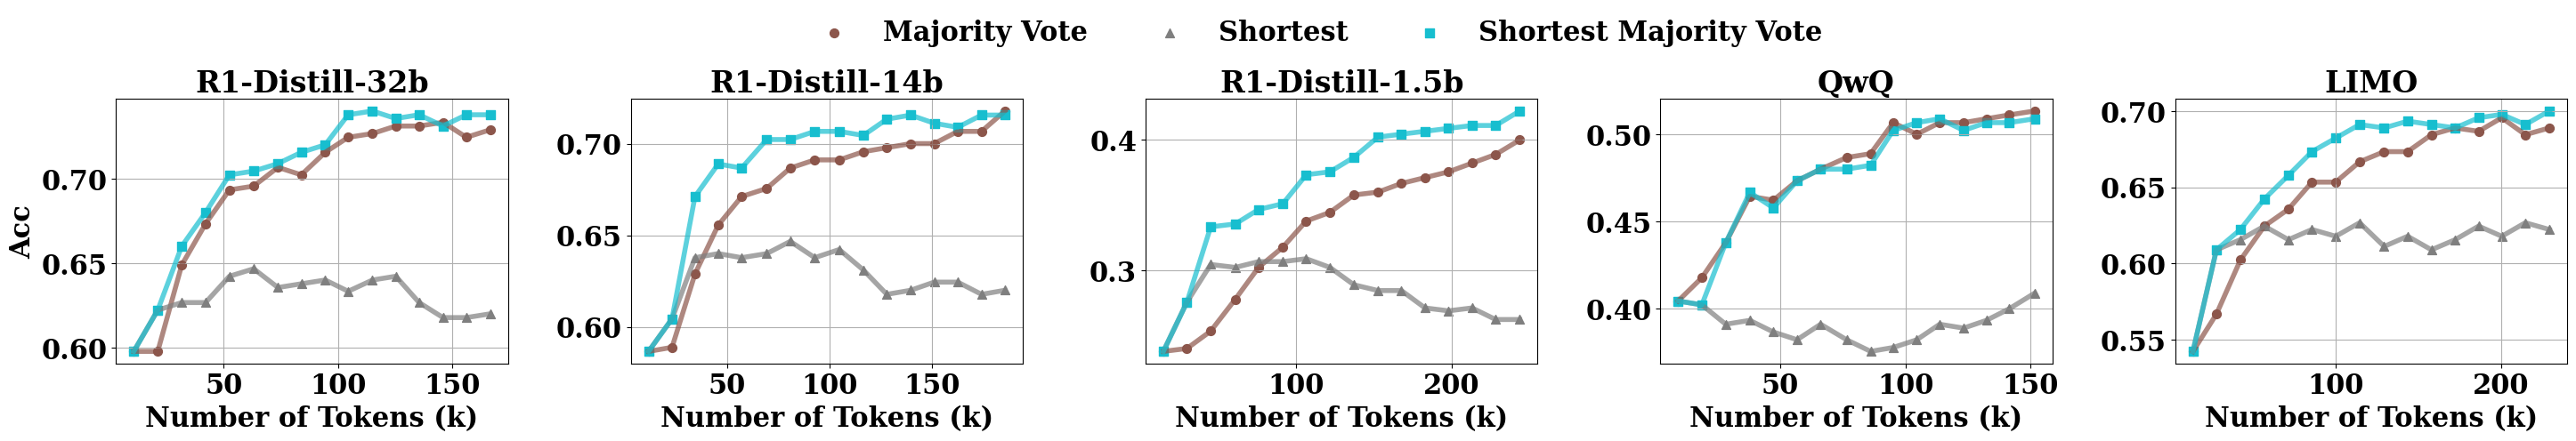

/tmp/ipykernel_656502/1572659332.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))


Majority Vote 0.6141414141414142 0.6333333333333333
Shortest 0.6252525252525253 0.6121212121212121
Shortest Majority Vote 0.6252525252525253 0.6353535353535353
Majority Vote 0.512121212121212 0.5616161616161616
Shortest 0.5232323232323232 0.5666666666666667
Shortest Majority Vote 0.5232323232323232 0.5646464646464647
Majority Vote 0.15252525252525254 0.295959595959596
Shortest 0.15353535353535352 0.2777777777777778
Shortest Majority Vote 0.15353535353535352 0.30202020202020197
Majority Vote 0.5805128205128206 0.6225641025641026
Shortest 0.5702564102564103 0.5682051282051281
Shortest Majority Vote 0.5702564102564103 0.6225641025641026
Majority Vote 0.5046153846153846 0.5558974358974359
Shortest 0.5456410256410257 0.5015384615384615
Shortest Majority Vote 0.5456410256410257 0.558974358974359


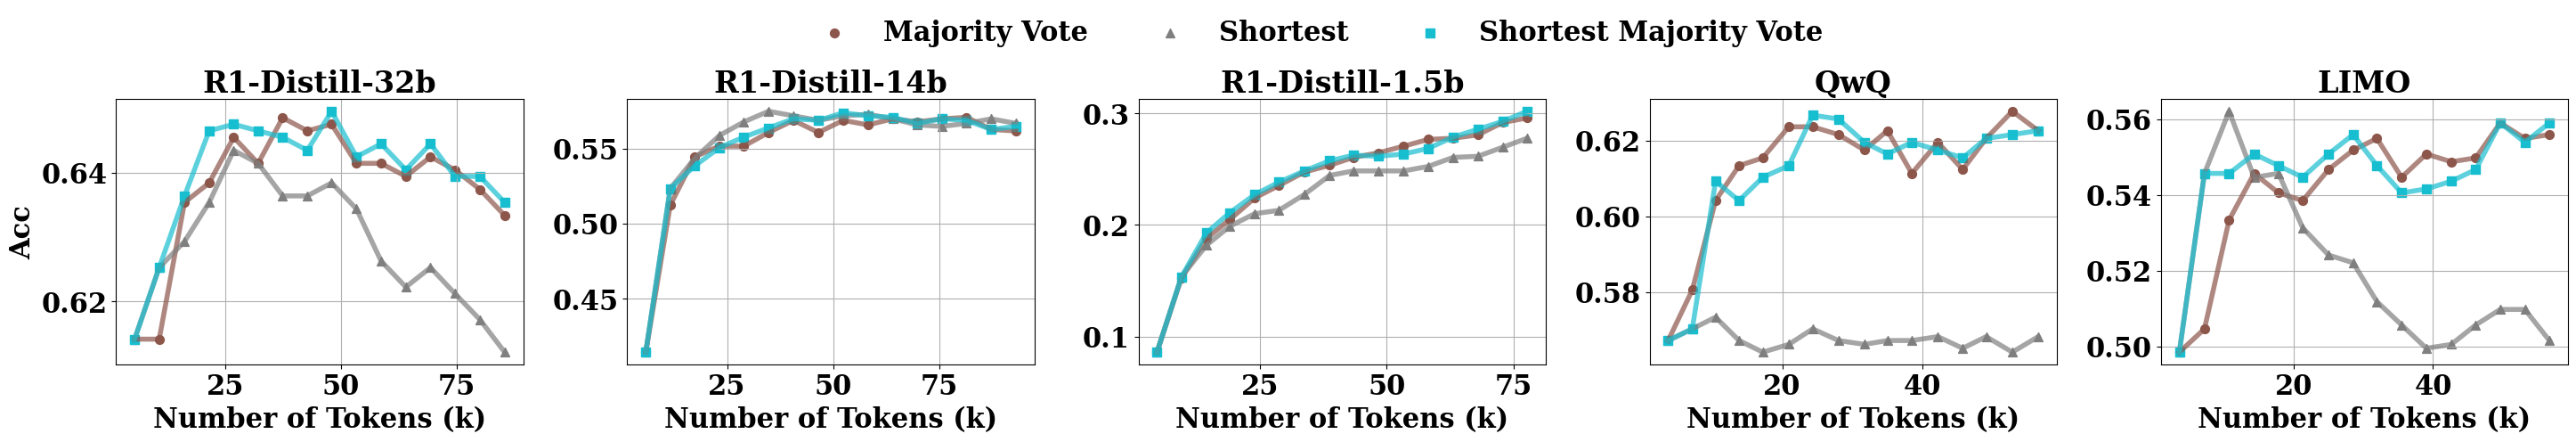

In [308]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_scatter_shared(ax, data, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis",
                       cmap='tab10', s=50, linestyle='--', linewidth=4, xtick_label=None):
    """
    在给定的轴上绘制多组散点图，每组数据用不同颜色和不同形状的点表示，点之间用虚线连接。
    Args:
        ax: matplotlib 的轴对象，用于绘制图形。
        data: 一个列表，其中每个元素是一个字典，包含 'x'、'y'、'group' 和 'marker' 键，
              分别对应一组数据的 x 坐标、y 坐标、分组和点的形状。
        title: 图形标题，字符串，默认为"Scatter Plot"。
        xlabel: x 轴标签，字符串，默认为"X-axis"。
        ylabel: y 轴标签，字符串，默认为"Y-axis"。
        cmap: 颜色映射，字符串，默认为'viridis'。
        s: 点的大小，数值，默认为 50。
        linestyle: 连线的样式，字符串，默认为'--'（虚线）。
        linewidth: 连线的宽度，数值，默认为1。
        xtick_label: x 轴刻度标签，列表，默认为 None。
    """
    # 获取颜色映射
    colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))
    
    # 遍历每组数据
    for i, dataset in enumerate(data):
        x = dataset['x'][:16]
        y = dataset['y'][:16]
        group = dataset['group']
        print(group, y[1], y[-1])
        
        marker = dataset.get('marker', 'o')  # 默认为圆形标记，如果未指定
        if 'color' in dataset:
            color = dataset['color']
        else:
            color = colors[i]
        # 绘制散点
        scatter = ax.scatter(x, y, s=s, label=group, color=color, marker=marker)
        
        # 添加连接线
        ax.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, alpha=0.7)
    
    ax.set_xlabel(xlabel, fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)
    if xtick_label is not None:
        ax.set_xticks(x)
        ax.set_xticklabels([str(i) for i in xtick_label])
    ax.set_title(title, fontsize=24)
    ax.grid()

def create_plots(data_list, titles, layout='1x4'):
    """
    创建多子图布局
    Args:
        data_list: 数据列表，每个元素对应一个子图的数据
        titles: 标题列表，每个元素对应一个子图的标题
        layout: 布局方式，'1x4', '1x5' 或 '2x3'
    """
    if layout == '1x4':
        fig, axs = plt.subplots(1, 4, figsize=(24, 5))
        axs = axs.flatten()
        num_plots = 4
    elif layout == '1x5':
        fig, axs = plt.subplots(1, 5, figsize=(30, 5))  # 增加宽度以适应5个图
        axs = axs.flatten()
        num_plots = 5
    elif layout == '2x3':
        fig, axs = plt.subplots(2, 3, figsize=(18, 10))
        axs = axs.flatten()
        num_plots = 6
    else:
        raise ValueError("Unsupported layout. Choose '1x4', '1x5' or '2x3'")

    # 确保数据和标题数量匹配布局
    if len(data_list) < num_plots or len(titles) < num_plots:
        raise ValueError(f"Need {num_plots} datasets and titles for {layout} layout")

    # 绘制每个子图
    for i in range(num_plots):
        plot_multi_scatter_shared(axs[i], data_list[i], linestyle='-', 
                                xlabel='Number of Tokens (k)', 
                                ylabel='Acc' if i == 0 else '', 
                                title=titles[i])

    # 在最后一个子图中显示共享的图例
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=22, framealpha=0, loc='upper center', 
              bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

    # 调整布局，增加右边距
    plt.tight_layout(rect=[0, 0, 0.98, 0.95])

    return fig

# 使用示例：
data_list = [r1_32b_acc_data, r1_14b_acc_data, r1_1_5b_acc_data, qwq_acc_data, aime_limo_acc_data, aime_s1_acc_data]
data_list = [divide_by_1k(d) for d in data_list]
titles = ['R1-Distill-32b', 'R1-Distill-14b', 'R1-Distill-1.5b', 'QwQ', 'LIMO', 'S1']

# 创建1x5布局
fig_1x5 = create_plots(data_list[:5], titles[:5], layout='1x5')
fig_1x5.savefig('imgs/overall_aime_short_majority_vote_1x5.pdf', bbox_inches='tight')
plt.show()

# 创建2x3布局
# fig_2x3 = create_plots(data_list, titles, layout='2x3')
# fig_2x3.savefig('imgs/overall_aime_short_majority_vote_2x3.pdf', bbox_inches='tight')
# plt.show()

# GPQA数据
data_list = [gpqa_r1_32b_acc_data, gpqa_r1_14b_acc_data, gpqa_r1_1_5b_acc_data, gpqa_qwq_acc_data, gpqa_s1_acc_data, gpqa_limo_acc_data]
data_list = [divide_by_1k(d) for d in data_list]
titles = ['R1-Distill-32b', 'R1-Distill-14b', 'R1-Distill-1.5b', 'QwQ',  'LIMO', 'S1']

# 创建1x5布局
fig_1x5 = create_plots(data_list[:5], titles[:5], layout='1x5')
fig_1x5.savefig('imgs/overall_gpqa_short_majority_vote_1x5.pdf', bbox_inches='tight')
plt.show()

# 创建2x3布局
# fig_2x3 = create_plots(data_list, titles, layout='2x3')
# fig_2x3.savefig('imgs/overall_gpqa_short_majority_vote_2x3.pdf', bbox_inches='tight')
# plt.show()

In [296]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_scatter(data, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis",
                       cmap='tab10', s=50, filename=None, linestyle='--', linewidth=4, xtick_label=None):
    """
    绘制多组散点图，每组数据用不同颜色和不同形状的点表示，点之间用虚线连接，支持保存到文件。
    Args:
        data: 一个列表，其中每个元素是一个字典，包含 'x'、'y'、'group' 和 'marker' 键，
              分别对应一组数据的 x 坐标、y 坐标、分组和点的形状。
        title: 图形标题，字符串，默认为"Scatter Plot"。
        xlabel: x 轴标签，字符串，默认为"X-axis"。
        ylabel: y 轴标签，字符串，默认为"Y-axis"。
        cmap: 颜色映射，字符串，默认为'viridis'。
        s: 点的大小，数值，默认为 50。
        filename: 保存文件名，字符串，如果为 None 则不保存，默认为 None。
        linestyle: 连线的样式，字符串，默认为'--'（虚线）。
        linewidth: 连线的宽度，数值，默认为1。
    """
    plt.figure(figsize=(8, 6))
    
    # 获取颜色映射
    colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))
    
    # 遍历每组数据
    for i, dataset in enumerate(data):
        x = dataset['x']
        y = dataset['y']
        group = dataset['group']
        marker = dataset.get('marker', 'o')  # 默认为圆形标记，如果未指定
        if 'color' in dataset:
            color = dataset['color']
        else:
            color = colors[i]
        # 绘制散点
        scatter = plt.scatter(x, y, s=s, label=group, color=color, marker=marker)
        
        # 添加连接线
        plt.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, alpha=0.7)
    
    plt.xlabel(xlabel, fontsize=22)
    plt.ylabel(ylabel, fontsize=22)
    plt.grid()
    if xtick_label is not None:
        plt.xticks(x, labels=[str(i) for i in xtick_label], fontsize=18)
    plt.title(title, fontsize=24)
    legend = plt.legend(fontsize=14, framealpha=0, loc='lower right')  # 显示图例
    
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    else:
        plt.show()


/tmp/ipykernel_656502/1732155869.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))
/tmp/ipykernel_656502/1732155869.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))


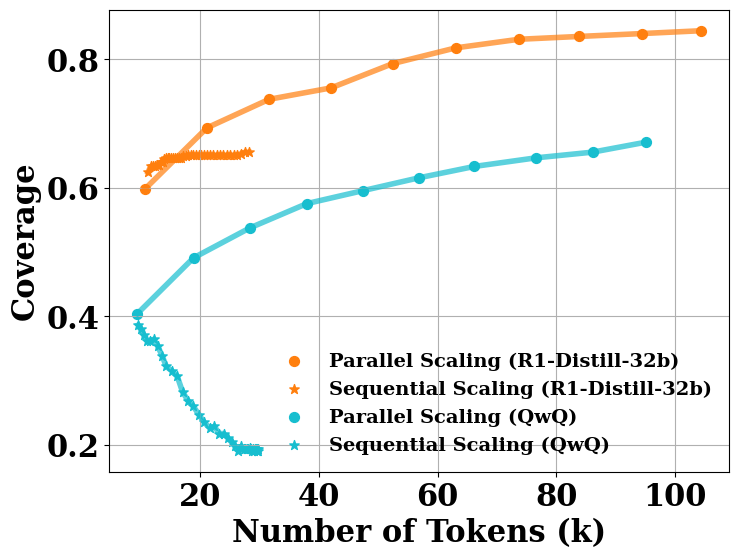

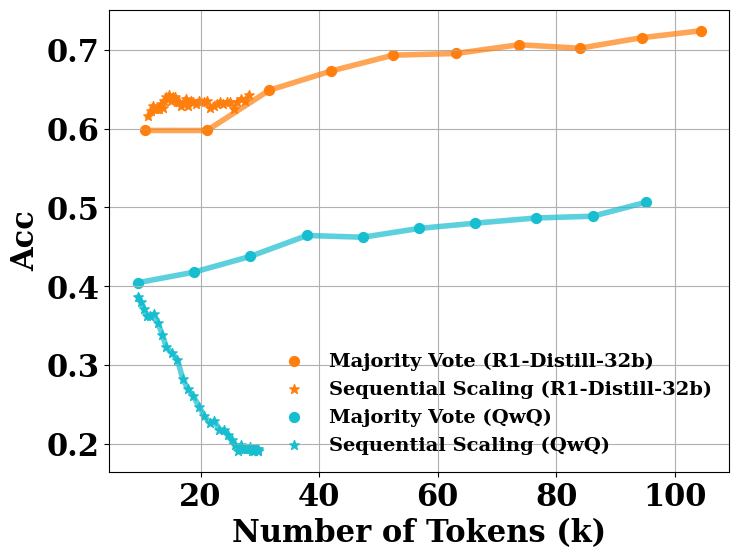

In [281]:
import matplotlib.cm as cm

# 获取viridis色图
tab10 = cm.tab10

r1_32b_seq_length = [item['len after search'] for item in r1_32b_extracted_data['Overall']]
r1_32b_seq_acc = [item['acc'] for item in r1_32b_extracted_data['Overall']]
r1_32b_seq_coverage = [item['coverage'] for item in r1_32b_extracted_data['Overall']]
qwq_seq_length = [item['len after search'] for item in qwq_extracted_data['Overall']]
qwq_seq_acc = [item['acc'] for item in qwq_extracted_data['Overall']]
qwq_seq_coverage = [item['acc'] for item in qwq_extracted_data['Overall']]
limo_seq_length = [item['len after search'] for item in limo_extracted_data['Overall']]
limo_seq_acc = [item['acc'] for item in limo_extracted_data['Overall']]
limo_seq_coverage = [item['coverage'] for item in limo_extracted_data['Overall']]
s1_seq_length = [item['len after search'] for item in s1_extracted_data['Overall']]
s1_seq_acc = [item['acc'] for item in s1_extracted_data['Overall']]
s1_seq_coverage = [item['acc'] for item in s1_extracted_data['Overall']]


coverage_data = [
    {'group': "Parallel Scaling (R1-Distill-32b)", 'x': r1_32b_length_means[:10], 'y': r1_32b_correct_rate_means[:10], 'marker': 'o', 'color': tab10(0.1)},
    {'group': "Sequential Scaling (R1-Distill-32b)", 'x': r1_32b_seq_length, 'y': r1_32b_seq_coverage, 'marker': '*', 'color': tab10(0.1)},
    
    {'group': "Parallel Scaling (QwQ)", 'x': qwq_length_means[:10], 'y': qwq_correct_rate_means[:10], 'marker': 'o', 'color': tab10(0.9)},
    {'group': "Sequential Scaling (QwQ)", 'x': qwq_seq_length, 'y': qwq_seq_coverage, 'marker': '*', 'color': tab10(0.9)},
    
     # {'group': "Parallel Scaling (LIMO)", 'x': aime_limo_length_means[:10], 'y': aime_limo_correct_rate_means[:10], 'marker': 'o', 'color': viridis(0.5)},
     # {'group': "Sequential Scaling (LIMO)", 'x': limo_seq_length, 'y': limo_seq_coverage, 'marker': '*', 'color': viridis(0.5)},
    
    # {'group': "Parallel Scaling (S1)", 'x': aime_s1_length_means[:10], 'y': aime_s1_correct_rate_means[:10], 'marker': 'o', 'color': viridis(0.7)},
    #  {'group': "Sequential Scaling (S1)", 'x': s1_seq_length, 'y': s1_seq_coverage, 'marker': '*', 'color': viridis(0.7)},
]

acc_data = [
    {'group': "Majority Vote (R1-Distill-32b)", 'x': r1_32b_length_means[:10], 'y': r1_32b_sc_acc[:10], 'marker': 'o', 'color': tab10(0.1)},
    {'group': "Sequential Scaling (R1-Distill-32b)", 'x': r1_32b_seq_length, 'y': r1_32b_seq_acc, 'marker': '*', 'color': tab10(0.1)},

    {'group': "Majority Vote (QwQ)", 'x': qwq_length_means[:10], 'y': qwq_sc_acc[:10], 'marker': 'o', 'color': tab10(0.9)},
    {'group': "Sequential Scaling (QwQ)", 'x': qwq_seq_length, 'y': qwq_seq_acc, 'marker': '*', 'color': tab10(0.9)},

#     {'group': "Majority Vote (LIMO)", 'x': aime_limo_length_means[:10], 'y': aime_limo_sc_acc[:10], 'marker': 'o', 'color': viridis(0.5)},
#     {'group': "Sequential Scaling (LIMO)", 'x': limo_seq_length, 'y': limo_seq_acc, 'marker': '*', 'color': viridis(0.5)},

#     {'group': "Majority Vote (S1)", 'x': aime_s1_length_means[:10], 'y': aime_s1_sc_acc[:10], 'marker': 'o', 'color': viridis(0.7)},
#     {'group': "Sequential Scaling (S1)", 'x': s1_seq_length, 'y': s1_seq_acc, 'marker': '*', 'color': viridis(0.8)},
]



plot_multi_scatter(divide_by_1k(coverage_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Coverage', title=None, filename='imgs/coverage-parallel-vs-seq.pdf', ) 
plot_multi_scatter(divide_by_1k(acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/Acc-parallel-vs-seq.pdf') 

# plot_multi_scatter(divide_by_1k(r1_32b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/r1-32b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(r1_14b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/r1-14b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(r1_1_5b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/r1-1.5b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(qwq_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/qwq-parallel-scaling.pdf') 

# gpqa_r1_32b_acc_data = [
#     {'group': "Majority Vote", 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_sc_acc, 'marker': 'o'},
#     {'group': "Shortest", 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_short_first_acc, 'marker': '^'},
#     {'group': 'Shortest Majority Vote', 'x': gpqa_r1_32b_length_means, 'y': gpqa_r1_32b_weighted_sc_acc, 'marker': 's'},
# ]

# gpqa_r1_14b_acc_data = [
#     {'group': "Majority Vote", 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_sc_acc, 'marker': 'o'},
#     {'group': "Shortest", 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_short_first_acc, 'marker': '^'},
#     {'group': 'Shortest Majority Vote', 'x': gpqa_r1_14b_length_means, 'y': gpqa_r1_14b_weighted_sc_acc, 'marker': 's'},

# ]

# gpqa_r1_1_5b_acc_data = [
#     {'group': "Majority Vote", 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_sc_acc, 'marker': 'o'},
#     {'group': "Shortest", 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_short_first_acc, 'marker': '^'},
#     {'group': 'Shortest Majority Vote', 'x': gpqa_r1_1_5b_length_means, 'y': gpqa_r1_1_5b_weighted_sc_acc, 'marker': 's'},
#     # {'group': "R1-Distill-32b Sequential Scaling", 'x': r1_32b_seq_length, 'y': r1_32b_seq_acc, 'marker': '*'},
# ]

# gpqa_qwq_acc_data = [{'group': "Majority Vote", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_sc_acc, 'marker': 'o'},
#                 {'group': "Shortest", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_short_first_acc, 'marker': '^'},
#                 {'group': "Shortest Majority Vote", 'x': gpqa_qwq_length_means, 'y': gpqa_qwq_weighted_sc_acc, 'marker': 's'},
#                 # {'group': "QwQ Sequential Scaling", 'x': qwq_seq_length, 'y': qwq_seq_acc, 'marker': '*'}
# ]

# plot_multi_scatter(divide_by_1k(gpqa_r1_32b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/gpqa-r1-32b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(gpqa_r1_14b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/gpqa-r1-14b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(gpqa_r1_1_5b_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/gpqa-r1-1.5b-parallel-scaling.pdf') 
# plot_multi_scatter(divide_by_1k(gpqa_qwq_acc_data), linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc', title=None, filename='imgs/gpqa-qwq-parallel-scaling.pdf') 


# 使用时
# plot_multi_scatter_shared_legend([divide_by_1k(r1_32b_acc_data), divide_by_1k(r1_14b_acc_data), 
#                                   divide_by_1k(r1_1_5b_acc_data), divide_by_1k(qwq_acc_data)],
#                                  linestyle='-', xlabel='Number of Tokens (k)', ylabel='Acc',
#                                  title=None, filename='imgs/overall_short_majority_vote.pdf')

# plot_multi_scatter(gpqa_r1_32b_acc_data, linestyle='-', xlabel='Number of Tokens', ylabel='Acc', title=None, filename='imgs/r1-32b-gpqa-parallel-scaling.pdf') 
# plot_multi_scatter(gpqa_r1_1_5b_acc_data, linestyle='-', xlabel='Number of Tokens', ylabel='Acc', title=None, filename='imgs/r1-1.5b-gpqa-parallel-scaling.pdf') 

# qwq_seq_length = [item['len after search'] for item in qwq_extracted_data['Overall']]
# qwq_seq_acc = [item['acc'] for item in qwq_extracted_data['Overall']]

# plot_data = [
#     {'group': "Parallel Scaling", 'x': qwq_length_means, 'y': qwq_correct_rate_means},
#     {'group': "Sequential Scaling", 'x': qwq_seq_length, 'y': qwq_seq_acc},
# ]
# plot_multi_scatter(plot_data, linestyle='-.', xlabel='Length', ylabel='Accuracy', title='QwQ', filename='imgs/parallel-vs-seq-qwq.pdf') 

/tmp/ipykernel_656502/1566046240.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))


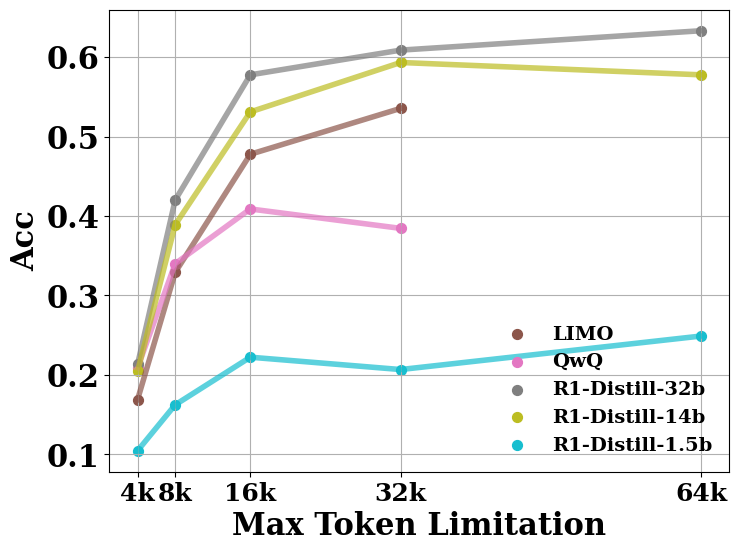

In [297]:
token_limit_data = [
    {'group': "LIMO", 'x': [4096, 8192, 16384, 32768], 'y': [0.16888888888888887, 0.32888888888888884, 0.47777777777777763, 0.53555555555555578]},
    {'group': 'QwQ', 'x': [4096, 8192, 16384, 32768], 'y': [0.2088888888888889, 0.3399999999999999, 0.4088888888888888, 0.3844444444444443], 'marker': 'o'},
    {'group': 'R1-Distill-32b', 'x': [4096, 8192, 16384, 32768, 65536], 'y': [0.2133333333333333, 0.42000000000000004, 0.5777777777777778, 0.6088888888888889, 0.6333333333333334], 'marker': 'o'},
    {'group': "R1-Distill-14b", 'x': [4096, 8192, 16384, 32768, 65536], 'y': [0.20444444444444443, 0.38888888888888895, 0.5311111111111112, 0.5933333333333333, 0.5777777777777776]},
    {'group': "R1-Distill-1.5b", 'x': [4096, 8192, 16384, 32768, 65536], 'y': [0.10444444444444442, 0.1622222222222222, 0.22222222222222215, 0.20666666666666664, 0.24888888888888888]},
]
plot_multi_scatter(token_limit_data, linestyle='-', xlabel='Max Token Limitation', ylabel='Acc', title=None, filename='imgs/aime-token-limit.pdf', xtick_label=['4k', '8k', '16k', '32k', '64k'])

In [265]:
x=[{None: 9123.222222222223, 'overall': 9123.222222222223}, {None: 11162.577777777778, 'overall': 11162.577777777778}, {None: 13541.522222222222, 'overall': 13541.522222222222}, {None: 16119.522222222222, 'overall': 16119.522222222222}, {None: 20293.5, 'overall': 20293.5}]
print([y['overall'] for y in x])

[9123.222222222223, 11162.577777777778, 13541.522222222222, 16119.522222222222, 20293.5]


/tmp/ipykernel_656502/1732155869.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.5, 1, len(data)))


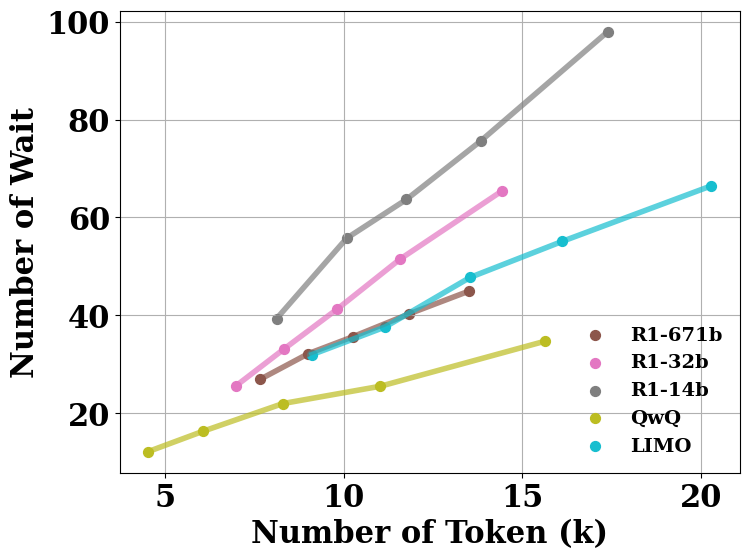

In [286]:
wait_count = [
    {'group':'R1-671b', 'x': [7673.888888888889, 9017.155555555555, 10252.288888888888, 11837.033333333333, 13510.277777777777], 'y': [26.977777777777778, 32.2, 35.62222222222222, 40.32222222222222, 44.96666666666667]},
    {'group':'R1-32b', 'x': [6987.7, 8320.966666666667, 9816.388888888889, 11580.344444444445, 14431.222222222223], 'y': [25.6, 33.06666666666667, 41.25555555555555, 51.48888888888889, 65.41111111111111]},
    {'group':'R1-14b', 'x': [8124.988888888889, 10089.877777777778, 11759.022222222222, 13835.777777777777, 17390.644444444446], 'y': [39.32222222222222, 55.766666666666666, 63.67777777777778, 75.61111111111111, 97.93333333333334]},
    {'group':'QwQ', 'x': [4525.3, 6056.111111111111, 8300.766666666666, 11032.888888888889, 15646.922222222222], 'y': [12.166666666666666, 16.31111111111111, 22.0, 25.544444444444444, 34.75555555555555]},
    {'group': 'LIMO', 'x': [9123.222222222223, 11162.577777777778, 13541.522222222222, 16119.522222222222, 20293.5], 'y': [32.01111111111111, 37.63333333333333, 47.766666666666666, 55.12222222222222, 66.47777777777777]},
]

plot_multi_scatter(divide_by_1k(wait_count), linestyle='-', xlabel='Number of Token (k)', ylabel='Number of Wait', title=None, filename='imgs/wait_count.pdf')

In [564]:
x=[{None: 4525.3, 'overall': 4525.3}, {None: 6056.111111111111, 'overall': 6056.111111111111}, {None: 8300.766666666666, 'overall': 8300.766666666666}, {None: 11032.888888888889, 'overall': 11032.888888888889}, {None: 15646.922222222222, 'overall': 15646.922222222222}]

In [565]:
print([item['overall'] for item in x])

[4525.3, 6056.111111111111, 8300.766666666666, 11032.888888888889, 15646.922222222222]
